<a href="https://www.kaggle.com/code/abhijitbhandari/monkeypox-analysis?scriptVersionId=102216881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Dataset

In [1]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/deepcontractor/monkeypox-dataset-daily-updated",force = True)

In [2]:
import os
# os.chdir('monkeypox-dataset-daily-updated/')

In [3]:
!pip install waterfallcharts

  Preparing metadata (setup.py) ... - done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=24578ff50afc2a8546cf098c7dce578d330eceb5714f41cab62e638cc827765f
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


In [4]:
!pip uninstall statsmodels -y

Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Successfully uninstalled statsmodels-0.13.2


In [5]:
!pip install statsmodels==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 17.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.


In [6]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import waterfall_chart
import datetime
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [8]:
df_daily = pd.read_csv('../input/monkeypox-dataset-daily-updated/Daily_Country_Wise_Confirmed_Cases.csv',skipinitialspace=True)
df_world = pd.read_csv('../input/monkeypox-dataset-daily-updated/Monkey_Pox_Cases_Worldwide.csv',skipinitialspace=True)
df_world_timeline = pd.read_csv('../input/monkeypox-dataset-daily-updated/Worldwide_Case_Detection_Timeline.csv',skipinitialspace=True)

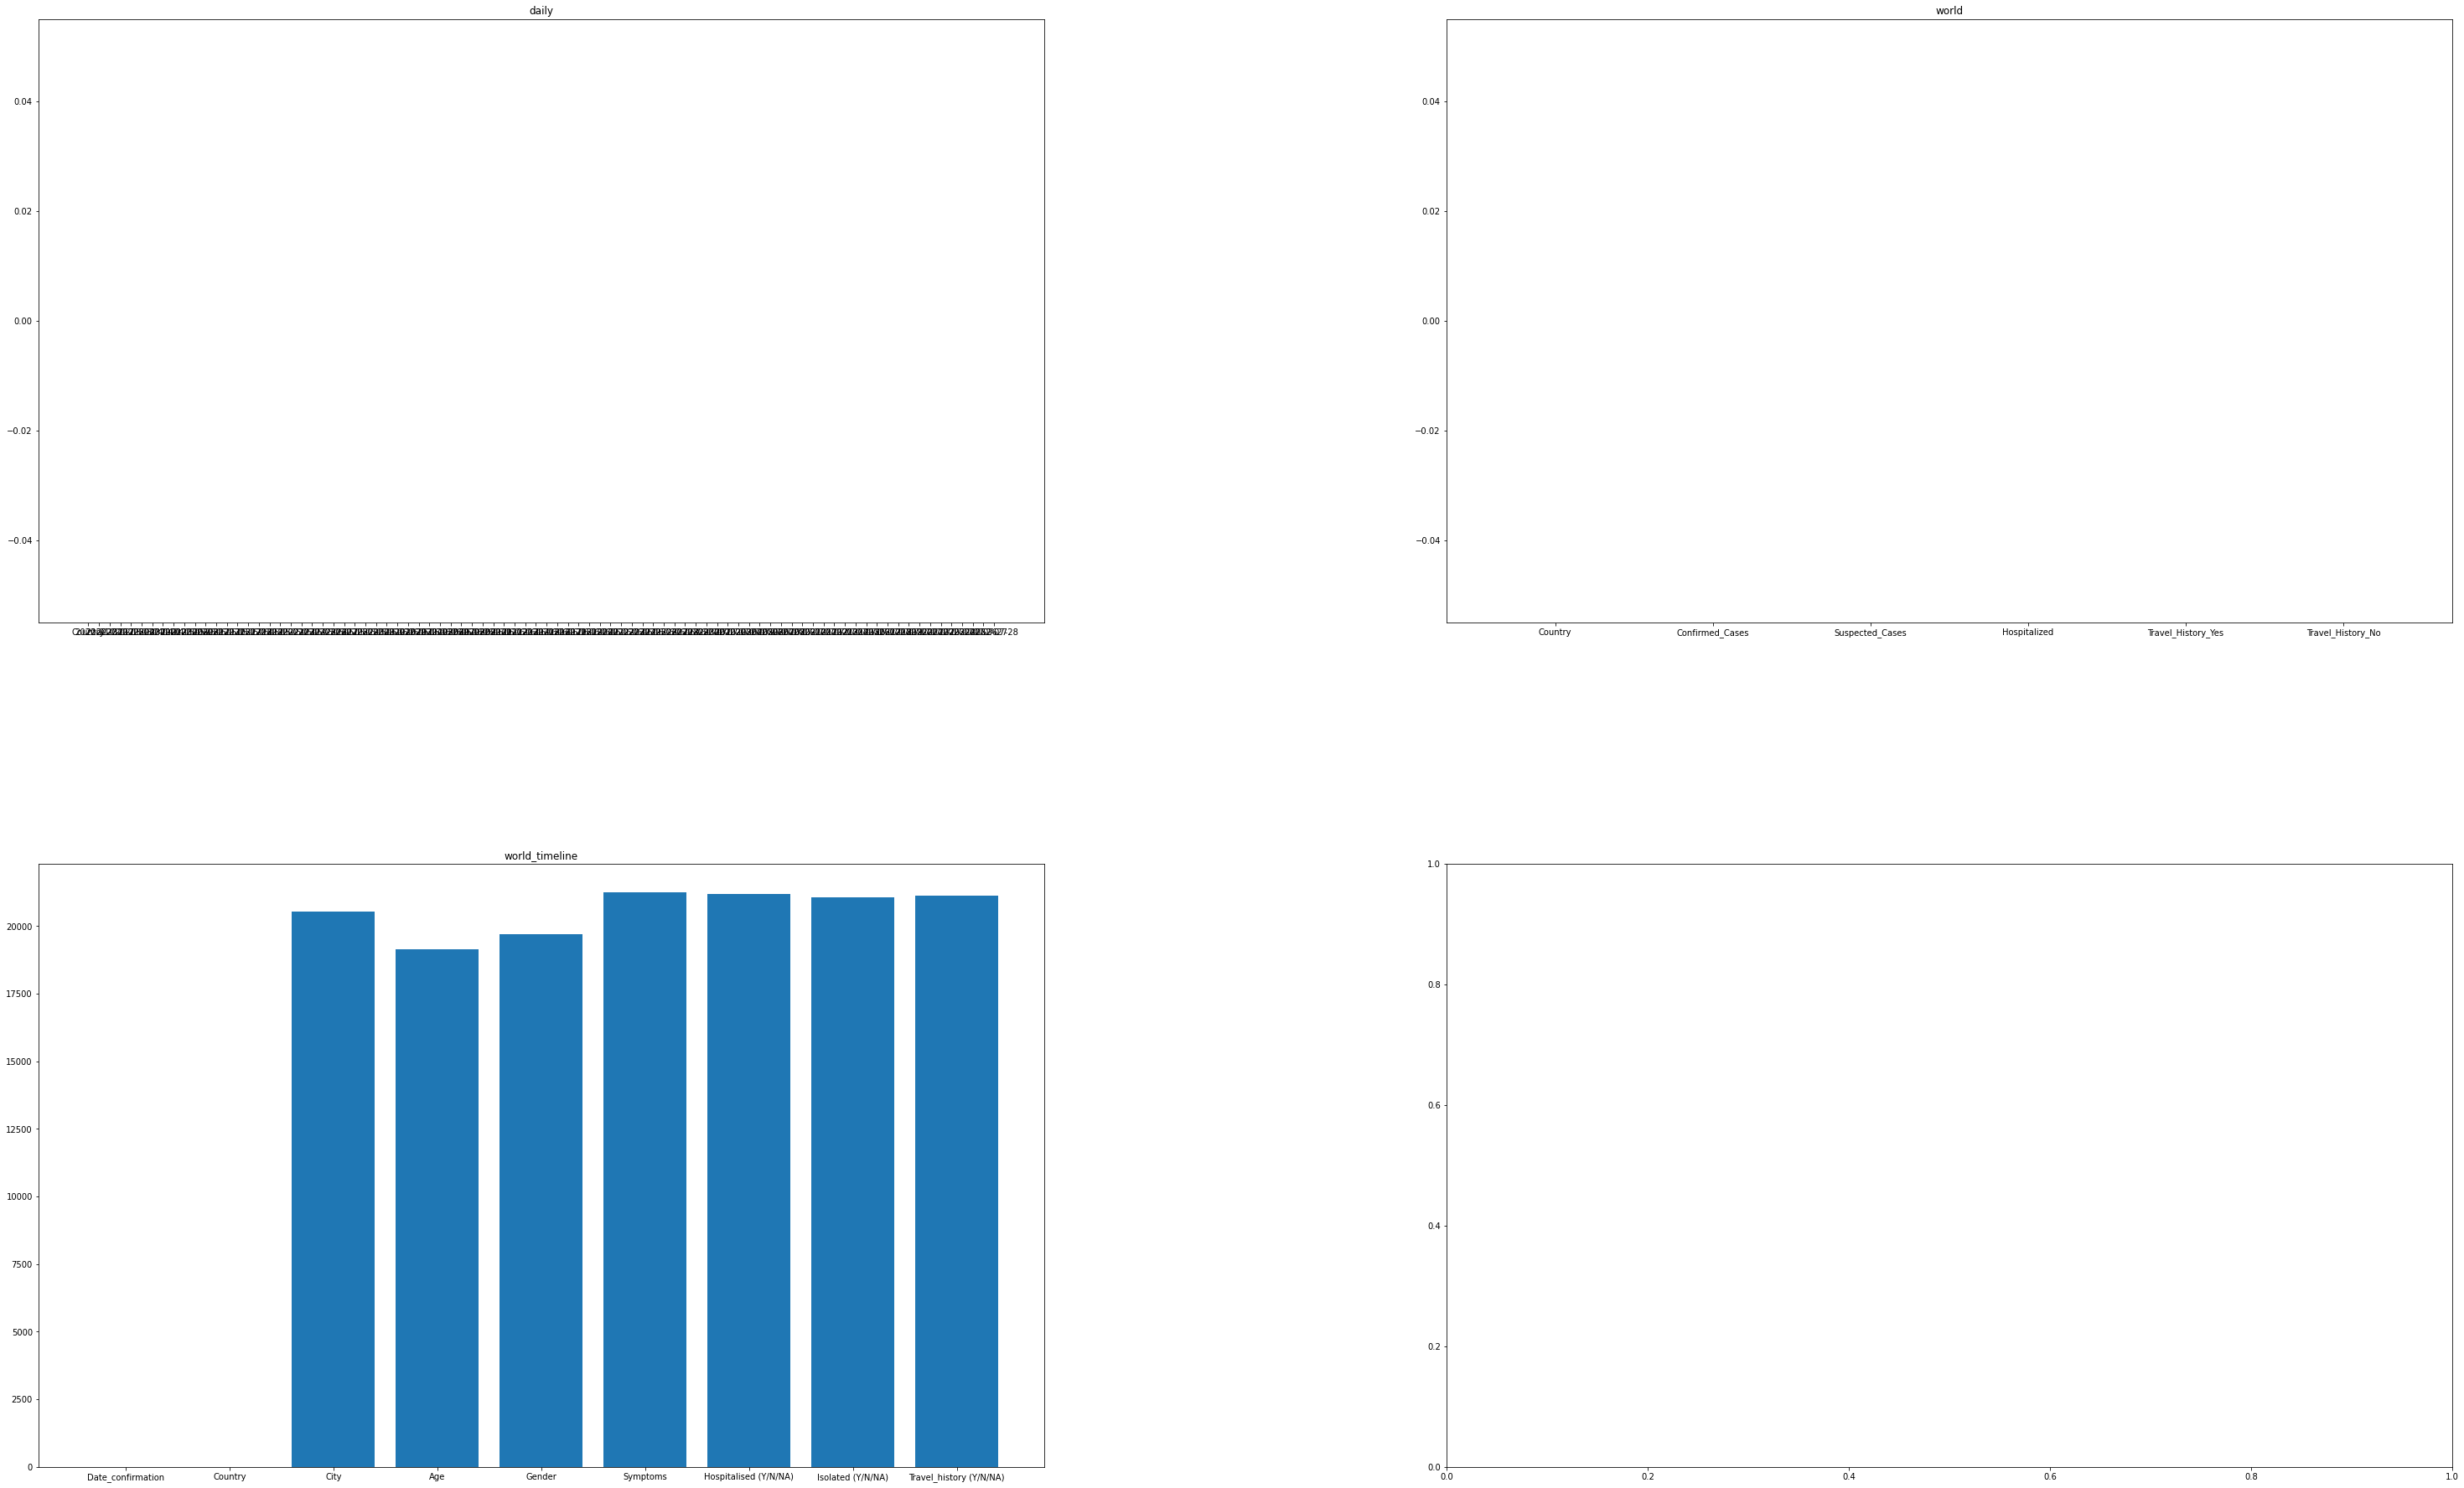

In [9]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (50,30),squeeze=False)
ax = ax.ravel()
frames = [df_daily,df_world,df_world_timeline]
names = ['daily','world','world_timeline']
for i in range(3):
    ax[i].bar(height = frames[i].isnull().sum().values,x = frames[i].isnull().sum().index)
    ax[i].set_title(names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

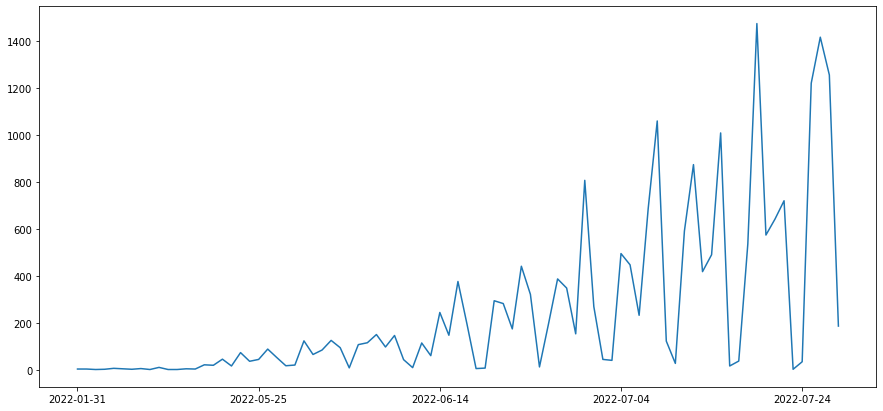

In [10]:
plt.figure(figsize = (15,7))
df_daily.sum().drop('Country').plot(kind = 'line')
plt.show()

In [11]:
daily_sum = df_daily.sum().drop('Country').reset_index()
daily_sum.columns = ['Date','Value']
daily_sum['Value'] = daily_sum['Value'].astype('int')

In [12]:
daily_sum['Date'] = pd.to_datetime(daily_sum['Date'])

In [13]:
daily_sum['Date'] = daily_sum['Date'].dt.strftime("%Y-%m-%d")


In [14]:
daily_sum = daily_sum.groupby('Date')['Value'].sum()

In [15]:
daily_sum = daily_sum.reset_index()

In [16]:
daily_sum.set_index('Date')

,Value
Date,
2022-01-31,3
2022-02-17,3
2022-02-28,1
2022-03-04,2
2022-03-31,6
2022-04-10,4
2022-04-12,2
2022-04-30,5
2022-05-06,1


**ACF is for Moving Average (MA) part of the ARIMA Model
The rule of thumb to decide (p,q) where p is for autoregressive part and q is for moving average part; for an ARIMA model is
How many values are going above or below the upper and low limits of the plot
Here in the acf we see, 5 values are above the upper limit, so for moving average, no of lags (q) = 5**

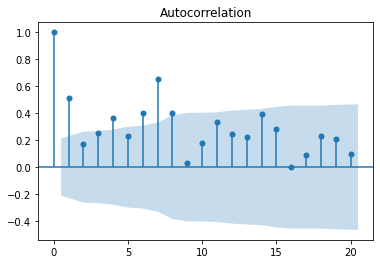

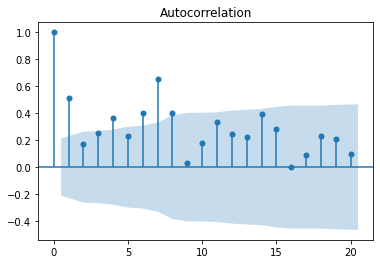

In [17]:
plot_acf(x = daily_sum['Value'],lags= 20)

**Autocorrelation is high. Future data is highly dependent on past data**

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

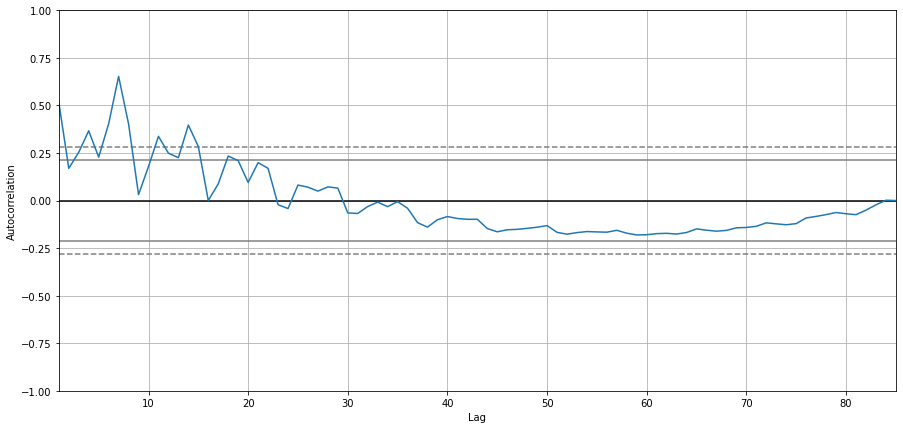

In [18]:
plt.figure(figsize = (15,7))
autocorrelation_plot(daily_sum['Value'])

**Using PACF to compute number of lags for the Autoregressive part**

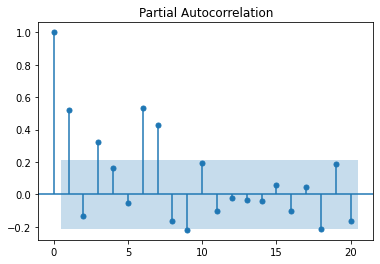

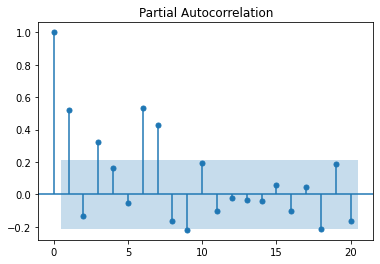

In [19]:
plot_pacf(x = daily_sum['Value'])

**Same as the concept for moving average q value selection, for autoregressive part as well, we can select p as 6**

**However, we are going to use something like gridsearchcv**

**Checking for stationarity**

In [20]:
from statsmodels.tsa.stattools import adfuller
#As per adfuller test
#Null Hypothesis (Ho): Data is not stationary
#Alternate Hypothesis (H1): Data is stationary
def adfuller_test(value):
    output = adfuller(value)
    labels = ["Test-Statistic","p-val","lags used","No of observations used"]
    
    for label,value in zip(labels,output):
        print(label+": "+str(value))
        
    if output[1]<=0.05:
        print("Reject the null hypothesis. Data is stationary")

    else:
        print("Null Hypothesis is true. Data is non-stationary")
    
adfuller_test(daily_sum['Value'])

Test-Statistic: 2.7222635610018386
p-val: 0.9990878690214448
lags used: 12
No of observations used: 72
Null Hypothesis is true. Data is non-stationary


In [21]:
#Shifting the data
daily_sum['Shift_1_diff'] = daily_sum['Value'] - daily_sum['Value'].shift(1)


In [22]:
daily_sum.head()

,Date,Value,Shift_1_diff
0,2022-01-31,3,NaN
1,2022-02-17,3,0.0
2,2022-02-28,1,-2.0
3,2022-03-04,2,1.0
4,2022-03-31,6,4.0


In [23]:
print(daily_sum.shape)

(85, 3)


In [24]:
daily_sum.set_index('Date',inplace = True)
daily_sum

,Value,Shift_1_diff
Date,,
2022-01-31,3,NaN
2022-02-17,3,0.0
2022-02-28,1,-2.0
2022-03-04,2,1.0
2022-03-31,6,4.0
2022-04-10,4,-2.0
2022-04-12,2,-2.0
2022-04-30,5,3.0
2022-05-06,1,-4.0


In [25]:
adfuller_test(daily_sum['Shift_1_diff'].dropna())

Test-Statistic: -4.720757407912233
p-val: 7.69130755399391e-05
lags used: 7
No of observations used: 76
Reject the null hypothesis. Data is stationary


Text(0.5, 1.0, 'Is it stationary?')

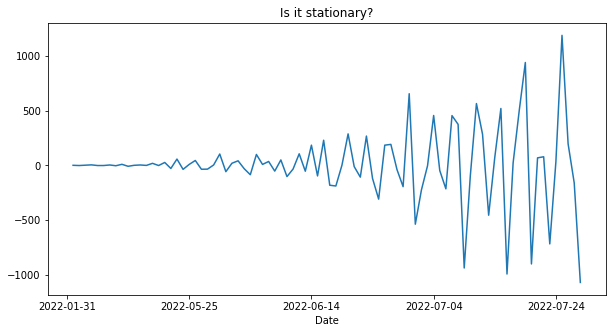

In [26]:
plt.figure(figsize = (10,5))
daily_sum['Shift_1_diff'].plot()
plt.title("Is it stationary?", fontsize = 12)

**Data is stationary**

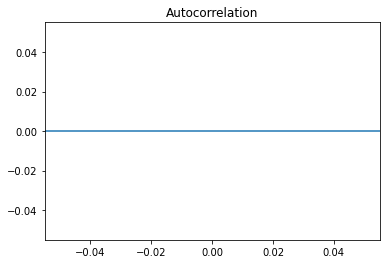

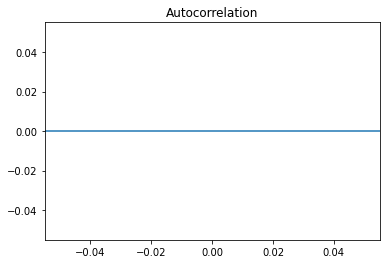

In [27]:
plot_acf(x = daily_sum['Shift_1_diff'],lags= 20)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

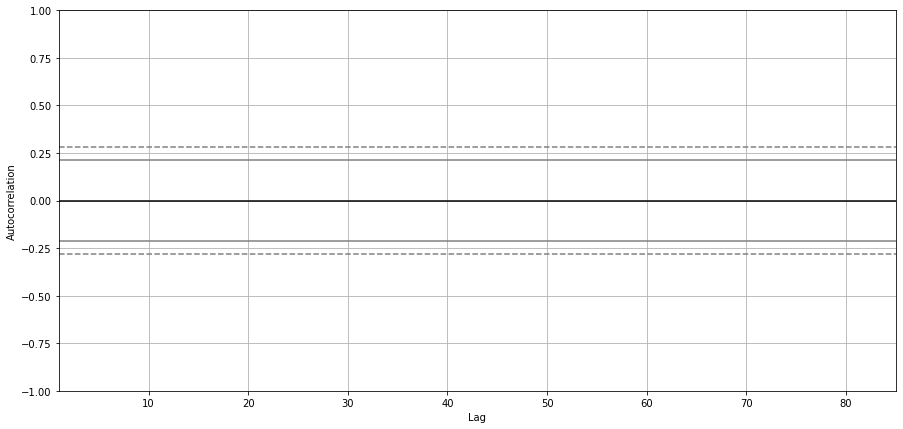

In [28]:
plt.figure(figsize = (15,7))
autocorrelation_plot(daily_sum['Shift_1_diff'])

**No Correlation Among Data**

**Autoregressive Model**

In [29]:
#Here, from the graph, the entire: Autoregressive shut down is at 0 i.e p = 0
#Moving Average Shutdown is 0 i.e q = 0
#Consider d = 1 since lag is 1

#Selecting ARIMA as the data is not seasonal

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [30]:
dataset=daily_sum['Value'].values.astype('float32')
train_size = int(len(dataset)*0.95)
train,test = dataset[0:train_size],dataset[train_size:]
sc = MinMaxScaler(feature_range=(0,1))
train = np.reshape(sc.fit_transform(train.reshape(-1,1)),newshape=(1,-1))[0]
test = np.reshape(sc.fit_transform(test.reshape(-1,1)),newshape=(1,-1))[0]
print(train.shape)
print(test.shape)

(80,)
(5,)


In [31]:
print(len(test))

5


In [32]:
def create_model(train,test,arima_order):

    #dataset = dataset.astype('float32')
    #train_size = int(len(dataset)*0.85)
    #train,test = dataset[0:train_size],dataset[train_size:]
    

    
    

    
    history = [x for x in train]
    
    
    
    predictions = []
    
    
    for t in range(len(test)):
        model = ARIMA(endog = history,order = arima_order)
        model_fit = model.fit()
        
        y_pred = model_fit.forecast()[0]
        

        
        history.append(test[t])
        predictions.append(y_pred)
        

    
    rmse = np.sqrt(mean_squared_error(y_true=test,y_pred=predictions))
    
    return rmse
        

In [33]:
#Using Gridsearch CV
def eval_model(train,test,p_val,d_val,q_val):
    best_score,best_cfg = float("inf"),None
    
    for p in p_val:
        
        for d in d_val:
            
            for q in q_val:
                order = (p,d,q)
                
               
                try:
                    
                    
                
                    rmse = create_model(train = train,test = test,arima_order = order)
                    
                    
                    
                
                    if rmse<best_score:
                        best_score,best_cfg = rmse,order
                        
                except:
                    continue
                
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
                

    
    
    

In [34]:
#Run this cell to calculate best_order: 
p_val = range(0,10)
d_val = range(0,10)
q_val = range(0,10)
best_order = eval_model(train = train,test = test,p_val = p_val,d_val = d_val,q_val = q_val)
#best_order is (0,0,9): computed on a different system code is the same

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.05558D-01    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      5      1     0     0   1.055D-07  -2.056D-01
  F = -0.20555800993136239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.09143D-01    |proj g|=  5.74149D-03

At iterate   10    f= -2.09151D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   3.608D-08  -2.092D-01
  F = -0.20915057444663412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37390D-01    |proj g|=  1.41100D-02

At iterate    5    f= -3.37453D-01    |proj g|=  1.66869D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66133D-01    |proj g|=  4.45024D-02

At iterate    5    f= -2.66449D-01    |proj g|=  1.47735D-02

At iterate   10    f= -2.66727D-01    |proj g|=  9.00835D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   7.216D-08  -2.667D-01
  F = -0.26672696137287211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.16356D-01    |proj g|=  4.20849D-02

At iterate    5    f= -4.16627D-01    |proj g|=  1.40117D-02

At iterate   10    f= -4.16798D-01    |proj g|=  3.84404D-04

At iterate   15    f= -4.16798D-01    |proj g|=  1.06581D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   7.216D-08  -4.168D-01
  F = -0.41679767796990957     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26859D-01    |proj g|=  5.68786D-02

At iterate    5    f= -3.27518D-01    |proj g|=  8.27741D-03

At iterate   10    f= -3.28627D-01    |proj g|=  5.81158D-03

At iterate   15    f= -3.28799D-01    |proj g|=  6.71307D-04

At iterate   20    f= -3.28799D-01    |proj g|=  1.72085D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   9.992D-08  -3.288D-01
  F = -0.32879860307900333     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67261D-01    |proj g|=  5.80976D-02

At iterate    5    f= -2.67734D-01    |proj g|=  7.61989D-03

At iterate   10    f= -2.67936D-01    |proj g|=  1.03046D-03

At iterate   15    f= -2.67947D-01    |proj g|=  3.34666D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.665D-07  -2.679D-01
  F = -0.26794696087511788     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79687D-01    |proj g|=  2.86168D-01

At iterate    5    f= -4.85637D-01    |proj g|=  2.65843D-03

At iterate   10    f= -4.85734D-01    |proj g|=  2.69448D-03

At iterate   15    f= -4.85762D-01    |proj g|=  8.74110D-03

At iterate   20    f= -4.86217D-01    |proj g|=  6.64617D-03

At iterate   25    f= -4.86313D-01    |proj g|=  4.90946D-03

At iterate   30    f= -4.86343D-01    |proj g|=  8.32118D-04

At iterate   35    f= -4.86347D-01    |proj g|=  3.65219D-04

At iterate   40    f= -4.86347D-01    |proj g|=  9.33975D-05

At iterate   45    f= -4.86347D-01    |proj g|=  5.18696D-05

At iterate   50    f= -4.86347D-01    |proj g|=  6.67799D-06

At iterate   55    f= -4.86347D-01    |proj g|=  2.55906D-06

At iterate   60    f= -4.86347D-01    |proj g|=  1.80467D-05

At iterate   65    f= -4.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.67225D-01    |proj g|=  2.76018D-01

At iterate    5    f= -4.74565D-01    |proj g|=  9.29267D-03

At iterate   10    f= -4.75468D-01    |proj g|=  6.84680D-04

At iterate   15    f= -4.75473D-01    |proj g|=  4.07778D-03

At iterate   20    f= -4.75553D-01    |proj g|=  5.15069D-03

At iterate   25    f= -4.75566D-01    |proj g|=  1.20848D-03

At iterate   30    f= -4.75571D-01    |proj g|=  7.44893D-04

At iterate   35    f= -4.75572D-01    |proj g|=  3.93729D-04

At iterate   40    f= -4.75572D-01    |proj g|=  6.73350D-05

At iterate   45    f= -4.75572D-01    |proj g|=  4.09506D-05

At iterate   50    f= -4.75572D-01    |proj g|=  4.56302D-06

At iterate   55    f= -4.75572D-01    |proj g|=  5.15699D-06

At iterate   60    f= -4.75572D-01    |proj g|=  1.19349D-06

           * * *

Tit   = 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.52158D-01    |proj g|=  3.44337D-01

At iterate    5    f= -4.61466D-01    |proj g|=  1.00525D-02

At iterate   10    f= -4.63101D-01    |proj g|=  3.88871D-03

At iterate   15    f= -4.63194D-01    |proj g|=  6.36154D-03

At iterate   20    f= -4.63728D-01    |proj g|=  3.62155D-03

At iterate   25    f= -4.63907D-01    |proj g|=  4.21930D-03

At iterate   30    f= -4.64033D-01    |proj g|=  8.04053D-03

At iterate   35    f= -4.64110D-01    |proj g|=  1.83379D-03

At iterate   40    f= -4.64138D-01    |proj g|=  2.71250D-03

At iterate   45    f= -4.64159D-01    |proj g|=  3.57823D-03

At iterate   50    f= -4.64176D-01    |proj g|=  1.64724D-03

At iterate   55    f= -4.64183D-01    |proj g|=  1.62964D-03

At iterate   60    f= -4.64190D-01    |proj g|=  7.20179D-04

At iterate   65    f= -4.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.17156D-01    |proj g|=  3.55826D-01

At iterate    5    f= -4.35848D-01    |proj g|=  1.00634D-02

At iterate   10    f= -4.36429D-01    |proj g|=  3.04267D-03

At iterate   15    f= -4.36434D-01    |proj g|=  2.77112D-03

At iterate   20    f= -4.36562D-01    |proj g|=  1.28473D-02

At iterate   25    f= -4.36689D-01    |proj g|=  4.20880D-04

At iterate   30    f= -4.36697D-01    |proj g|=  4.90979D-04

At iterate   35    f= -4.36698D-01    |proj g|=  1.54809D-04

At iterate   40    f= -4.36698D-01    |proj g|=  7.70772D-05

At iterate   45    f= -4.36698D-01    |proj g|=  1.00470D-04

At iterate   50    f= -4.36698D-01    |proj g|=  7.21645D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f= -2.76307D-01    |proj g|=  2.31864D-02

At iterate   10    f= -2.76516D-01    |proj g|=  6.71301D-03

At iterate   15    f= -2.76564D-01    |proj g|=  1.18017D-04

At iterate   20    f= -2.76565D-01    |proj g|=  3.38618D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   9.992D-08  -2.766D-01
  F = -0.27656451182058139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f= -4.86204D-01    |proj g|=  8.62180D-03

At iterate   25    f= -4.86340D-01    |proj g|=  2.30930D-03

At iterate   30    f= -4.86359D-01    |proj g|=  1.28906D-03

At iterate   35    f= -4.86364D-01    |proj g|=  2.36822D-04

At iterate   40    f= -4.86365D-01    |proj g|=  4.19786D-04

At iterate   45    f= -4.86365D-01    |proj g|=  9.56346D-05

At iterate   50    f= -4.86365D-01    |proj g|=  4.38760D-05

At iterate   55    f= -4.86365D-01    |proj g|=  1.00792D-04

At iterate   60    f= -4.86365D-01    |proj g|=  3.49221D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     62     86   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.71857D-01    |proj g|=  2.34018D-01

At iterate    5    f= -4.84410D-01    |proj g|=  1.23728D-02

At iterate   10    f= -4.85679D-01    |proj g|=  2.44082D-02

At iterate   15    f= -4.85740D-01    |proj g|=  1.18627D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     24      1     0     0   1.055D-07  -4.857D-01
  F = -0.48573998178963368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.53384D-01    |proj g|=  3.43595D-01

At iterate    5    f= -4.64200D-01    |proj g|=  9.49971D-03

At iterate   10    f= -4.65427D-01    |proj g|=  4.46428D-03

At iterate   15    f= -4.65534D-01    |proj g|=  2.10841D-03


 This problem is unconstrained.



At iterate   20    f= -4.65810D-01    |proj g|=  7.37769D-03

At iterate   25    f= -4.65939D-01    |proj g|=  5.37853D-03

At iterate   30    f= -4.66067D-01    |proj g|=  6.65765D-03

At iterate   35    f= -4.66142D-01    |proj g|=  5.09085D-03

At iterate   40    f= -4.66196D-01    |proj g|=  3.05156D-03

At iterate   45    f= -4.66218D-01    |proj g|=  1.50711D-03

At iterate   50    f= -4.66232D-01    |proj g|=  5.26457D-04

At iterate   55    f= -4.66238D-01    |proj g|=  1.08404D-03

At iterate   60    f= -4.66246D-01    |proj g|=  9.42424D-04

At iterate   65    f= -4.66250D-01    |proj g|=  8.26239D-04

At iterate   70    f= -4.66253D-01    |proj g|=  4.42169D-04

At iterate   75    f= -4.66256D-01    |proj g|=  7.28601D-04

At iterate   80    f= -4.66258D-01    |proj g|=  8.11579D-04

At iterate   85    f= -4.66259D-01    |proj g|=  1.00980D-03

At iterate   90    f= -4.66261D-01    |proj g|=  8.71125D-04

At iterate   95    f= -4.66261D-01    |proj g|=  9.02389D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.40595D-01    |proj g|=  3.73583D-01

At iterate    5    f= -4.56738D-01    |proj g|=  2.37320D-02

At iterate   10    f= -4.58923D-01    |proj g|=  4.05513D-03

At iterate   15    f= -4.58935D-01    |proj g|=  2.06418D-04


 This problem is unconstrained.



At iterate   20    f= -4.58936D-01    |proj g|=  1.95399D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   3.331D-08  -4.589D-01
  F = -0.45893557926230688     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.01469D-01    |proj g|=  2.26026D-01

At iterate    5    f= -3.06858D-01    |proj g|=  1.62791D-02

At iterate   10    f= -3.08051D-01    |proj g|=  8.28669D-03

At iter

 This problem is unconstrained.



At iterate   20    f= -3.08139D-01    |proj g|=  8.26617D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     28      1     0     0   1.332D-07  -3.081D-01
  F = -0.30813869347471451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.78548D-01    |proj g|=  1.53962D-01

At iterate    5    f= -5.89475D-01    |proj g|=  1.20212D-02

At iterate   10    f= -5.91692D-01    |proj g|=  2.42186D-02


 This problem is unconstrained.



At iterate   15    f= -5.91853D-01    |proj g|=  2.88658D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     21      1     0     0   6.661D-08  -5.919D-01
  F = -0.59185260872874323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.93407D-01    |proj g|=  9.60767D-02

At iterate    5    f= -5.96225D-01    |proj g|=  6.77507D-03

At iterate   10    f= -5.96764D-01    |proj g|=  1.91639D-03


 This problem is unconstrained.



At iterate   15    f= -5.96888D-01    |proj g|=  7.46789D-03

At iterate   20    f= -5.96910D-01    |proj g|=  5.82090D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     29      1     0     0   3.331D-08  -5.969D-01
  F = -0.59691014283860877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32094D-01    |proj g|=  3.42190D-01

At iterate    5    f= -5.39574D-01    |proj g|=  5.37701D-03

At iter

 This problem is unconstrained.



At iterate   15    f= -5.40579D-01    |proj g|=  8.65974D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     19      1     0     0   6.661D-08  -5.406D-01
  F = -0.54057874318112475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00806D-01    |proj g|=  3.59218D-01

At iterate    5    f= -5.13323D-01    |proj g|=  5.26575D-03

At iterate   10    f= -5.13588D-01    |proj g|=  2.57770D-02


 This problem is unconstrained.



At iterate   15    f= -5.13793D-01    |proj g|=  4.61298D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     19     22      1     0     0   7.772D-08  -5.138D-01
  F = -0.51379305870601188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.27053D-01    |proj g|=  5.18716D-01

At iterate    5    f= -6.46467D-01    |proj g|=  1.01412D-02


 This problem is unconstrained.



At iterate   10    f= -6.50384D-01    |proj g|=  2.99649D-02

At iterate   15    f= -6.52313D-01    |proj g|=  9.65155D-03

At iterate   20    f= -6.52495D-01    |proj g|=  2.09321D-04

At iterate   25    f= -6.52499D-01    |proj g|=  3.34023D-03

At iterate   30    f= -6.52549D-01    |proj g|=  1.02436D-02

At iterate   35    f= -6.52574D-01    |proj g|=  3.08858D-03

At iterate   40    f= -6.52599D-01    |proj g|=  2.14285D-03

At iterate   45    f= -6.52609D-01    |proj g|=  2.32482D-03

At iterate   50    f= -6.52617D-01    |proj g|=  1.13588D-03

At iterate   55    f= -6.52620D-01    |proj g|=  1.35767D-03

At iterate   60    f= -6.52622D-01    |proj g|=  9.51139D-04

At iterate   65    f= -6.52623D-01    |proj g|=  7.92144D-04

At iterate   70    f= -6.52624D-01    |proj g|=  2.39242D-04

At iterate   75    f= -6.52624D-01    |proj g|=  2.88480D-04

At iterate   80    f= -6.52624D-01    |proj g|=  5.73164D-04

At iterate   85    f= -6.52624D-01    |proj g|=  1.02318D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.46682D-01    |proj g|=  4.38736D-01

At iterate    5    f= -6.57380D-01    |proj g|=  6.12105D-03


 This problem is unconstrained.



At iterate   10    f= -6.57654D-01    |proj g|=  1.90180D-03

At iterate   15    f= -6.57686D-01    |proj g|=  2.63010D-03

At iterate   20    f= -6.58104D-01    |proj g|=  1.31491D-02

At iterate   25    f= -6.58294D-01    |proj g|=  4.85285D-03

At iterate   30    f= -6.58390D-01    |proj g|=  1.79106D-02

At iterate   35    f= -6.58449D-01    |proj g|=  3.95974D-03

At iterate   40    f= -6.58464D-01    |proj g|=  2.75445D-03

At iterate   45    f= -6.58473D-01    |proj g|=  1.31599D-03

At iterate   50    f= -6.58478D-01    |proj g|=  9.54759D-04

At iterate   55    f= -6.58480D-01    |proj g|=  3.96438D-04

At iterate   60    f= -6.58482D-01    |proj g|=  6.81655D-04

At iterate   65    f= -6.58483D-01    |proj g|=  5.59619D-04

At iterate   70    f= -6.58483D-01    |proj g|=  2.03304D-04

At iterate   75    f= -6.58484D-01    |proj g|=  2.30882D-04

At iterate   80    f= -6.58484D-01    |proj g|=  1.93234D-04

At iterate   85    f= -6.58484D-01    |proj g|=  1.82288D-04

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.66711D-01    |proj g|=  2.48874D-01

At iterate    5    f= -5.75610D-01    |proj g|=  2.84637D-03

At iterate   10    f= -5.75649D-01    |proj g|=  8.00349D-04

At iterate   15    f= -5.75652D-01    |proj g|=  2.46236D-04

At iterate   20    f= -5.75652D-01    |proj g|=  7.77156D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21     35      1     0     0   7.772D-08  -5.757D-01
  F = -0.57565162269351078     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.50192D-01    |proj g|=  2.88703D-01

At iterate    5    f= -5.61187D-01    |proj g|=  6.04985D-03


 This problem is unconstrained.



At iterate   10    f= -5.61325D-01    |proj g|=  6.24634D-04

At iterate   15    f= -5.61327D-01    |proj g|=  2.55174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     19     22      1     0     0   9.992D-08  -5.613D-01
  F = -0.56132722599642892     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.17361D-01    |proj g|=  2.52778D-01

At iterate    5    f= -5.35469D-01    |proj g|=  3.37214D-03


 This problem is unconstrained.



At iterate   10    f= -5.35500D-01    |proj g|=  4.57965D-03

At iterate   15    f= -5.35529D-01    |proj g|=  6.94644D-04

At iterate   20    f= -5.35604D-01    |proj g|=  7.21931D-03

At iterate   25    f= -5.35725D-01    |proj g|=  3.42749D-03

At iterate   30    f= -5.35790D-01    |proj g|=  2.67381D-03

At iterate   35    f= -5.35822D-01    |proj g|=  6.64042D-03

At iterate   40    f= -5.35846D-01    |proj g|=  2.60326D-03

At iterate   45    f= -5.35859D-01    |proj g|=  2.38303D-03

At iterate   50    f= -5.35866D-01    |proj g|=  2.24829D-03

At iterate   55    f= -5.35871D-01    |proj g|=  8.97959D-04

At iterate   60    f= -5.35876D-01    |proj g|=  4.79816D-04

At iterate   65    f= -5.35878D-01    |proj g|=  1.08961D-03

At iterate   70    f= -5.35879D-01    |proj g|=  8.33122D-04

At iterate   75    f= -5.35881D-01    |proj g|=  5.70943D-04

At iterate   80    f= -5.35882D-01    |proj g|=  5.97222D-04

At iterate   85    f= -5.35883D-01    |proj g|=  6.41320D-04

At iter

 This problem is unconstrained.



At iterate    5    f= -6.57485D-01    |proj g|=  3.00656D-02

At iterate   10    f= -6.58788D-01    |proj g|=  1.91552D-03

At iterate   15    f= -6.58817D-01    |proj g|=  5.77238D-04

At iterate   20    f= -6.58819D-01    |proj g|=  7.10876D-05

At iterate   25    f= -6.58820D-01    |proj g|=  7.32148D-04

At iterate   30    f= -6.58835D-01    |proj g|=  2.16072D-03

At iterate   35    f= -6.58846D-01    |proj g|=  1.06937D-03

At iterate   40    f= -6.58852D-01    |proj g|=  6.13343D-04

At iterate   45    f= -6.58854D-01    |proj g|=  1.88347D-03

At iterate   50    f= -6.58857D-01    |proj g|=  2.37921D-04

At iterate   55    f= -6.58858D-01    |proj g|=  8.62865D-05

At iterate   60    f= -6.58859D-01    |proj g|=  2.37255D-04

At iterate   65    f= -6.58859D-01    |proj g|=  3.93285D-04

At iterate   70    f= -6.58860D-01    |proj g|=  2.69507D-04

At iterate   75    f= -6.58860D-01    |proj g|=  1.07503D-04

At iterate   80    f= -6.58860D-01    |proj g|=  1.53333D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.51348D-01    |proj g|=  4.41461D-01


 This problem is unconstrained.



At iterate    5    f= -6.64095D-01    |proj g|=  2.58329D-02

At iterate   10    f= -6.65389D-01    |proj g|=  2.24054D-03

At iterate   15    f= -6.65428D-01    |proj g|=  1.04676D-03

At iterate   20    f= -6.65432D-01    |proj g|=  1.10567D-04

At iterate   25    f= -6.65433D-01    |proj g|=  1.35947D-03

At iterate   30    f= -6.65457D-01    |proj g|=  2.21350D-03

At iterate   35    f= -6.65468D-01    |proj g|=  8.05389D-04

At iterate   40    f= -6.65478D-01    |proj g|=  1.35175D-03

At iterate   45    f= -6.65483D-01    |proj g|=  9.65528D-04

At iterate   50    f= -6.65487D-01    |proj g|=  8.17457D-04

At iterate   55    f= -6.65489D-01    |proj g|=  1.53688D-04

At iterate   60    f= -6.65490D-01    |proj g|=  7.48512D-04

At iterate   65    f= -6.65491D-01    |proj g|=  3.33622D-04

At iterate   70    f= -6.65492D-01    |proj g|=  4.39693D-04

At iterate   75    f= -6.65492D-01    |proj g|=  3.19167D-04

At iterate   80    f= -6.65493D-01    |proj g|=  2.61413D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  135    f= -6.65493D-01    |proj g|=  4.10783D-06

At iterate  140    f= -6.65493D-01    |proj g|=  1.58762D-06

At iterate  145    f= -6.65493D-01    |proj g|=  8.43769D-07

At iterate  150    f= -6.65493D-01    |proj g|=  7.77156D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    151    197      2     0     0   6.661D-08  -6.655D-01
  F = -0.66549301016951856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f= -5.75217D-01    |proj g|=  1.92129D-02

At iterate   10    f= -5.75639D-01    |proj g|=  3.18163D-03

At iterate   15    f= -5.75689D-01    |proj g|=  6.49825D-04

At iterate   20    f= -5.75692D-01    |proj g|=  1.43441D-05

At iterate   25    f= -5.75692D-01    |proj g|=  4.21885D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     27     32      1     0     0   1.776D-07  -5.757D-01
  F = -0.57569166997660781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.44750D-01    |proj g|=  3.06370D-01

At iterate    5    f= -5.53920D-01    |proj g|=  7.09334D-03

At iterate   10    f= -5.54383D-01    |proj g|=  3.25048D-03

At iterate   15    f= -5.58674D-01    |proj g|=  6.27386D-02

At iterate   20    f= -5.61522D-01    |proj g|=  8.24364D-03

At iterate   25    f= -5.61587D-01    |proj g|=  2.84631D-03

At iterate   30    f= -5.61590D-01    |proj g|=  3.14193D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -5.38467D-01    |proj g|=  3.94659D-03

At iterate   10    f= -5.38526D-01    |proj g|=  1.08541D-03

At iterate   15    f= -5.38561D-01    |proj g|=  5.99339D-03

At iterate   20    f= -5.38588D-01    |proj g|=  1.11813D-03

At iterate   25    f= -5.38634D-01    |proj g|=  1.18726D-02

At iterate   30    f= -5.38739D-01    |proj g|=  5.62046D-03

At iterate   35    f= -5.38785D-01    |proj g|=  5.05588D-03

At iterate   40    f= -5.38815D-01    |proj g|=  1.06608D-03

At iterate   45    f= -5.38836D-01    |proj g|=  3.28143D-03

At iterate   50    f= -5.38851D-01    |proj g|=  1.31187D-03

At iterate   55    f= -5.38860D-01    |proj g|=  1.52952D-03

At iterate   60    f= -5.38865D-01    |proj g|=  2.24643D-03

At iterate   65    f= -5.38870D-01    |proj g|=  9.69480D-04

At iterate   70    f= -5.38873D-01    |proj g|=  1.04264D-03

At iterate   75    f= -5.38876D-01    |proj g|=  1.00258D-03

At iterate   80    f= -5.38878D-01    |proj g|=  1.62569D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f= -4.10540D-01    |proj g|=  2.01189D-01

At iterate   15    f= -4.10698D-01    |proj g|=  2.11847D+00

At iterate   20    f= -4.12391D-01    |proj g|=  4.08257D-01

At iterate   25    f= -4.12493D-01    |proj g|=  9.94251D-02

At iterate   30    f= -4.12497D-01    |proj g|=  1.02535D-04

At iterate   35    f= -4.12497D-01    |proj g|=  2.55906D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     35     45      1     0     0   2.559D-06  -4.125D-01
  F = -0.41249705813535587     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f= -2.89913D-01    |proj g|=  7.49332D-03

At iterate   35    f= -2.89913D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     36     48      1     0     0   0.000D+00  -2.899D-01
  F = -0.28991288472238058     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.61398D-01    |proj g|=  1.44148D+00

At iterate    5    f= -2.61722D-01    |proj g|=  9.68556D-02

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.30815D-01    |proj g|=  1.50267D+01

At iterate    5    f= -4.39755D-01    |proj g|=  9.47390D-02

At iterate   10    f= -4.39859D-01    |proj g|=  8.29127D-01

At iterate   15    f= -4.39891D-01    |proj g|=  4.57245D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     40      1     0     0   2.276D-06  -4.399D-01
  F = -0.43989065026987967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26146D-01    |proj g|=  1.62415D+01

At iterate    5    f= -3.40264D-01    |proj g|=  1.70225D-01

At iterate   10    f= -3.40488D-01    |proj g|=  6.19478D-01

At iterate   15    f= -3.40508D-01    |proj g|=  3.15858D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     23      1     0     0   3.497D-07  -3.405D-01
  F = -0.34050750877886110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.24926D-01    |proj g|=  1.41169D+00

At iterate    5    f= -5.25313D-01    |proj g|=  3.52263D-02

At iterate   10    f= -5.25328D-01    |proj g|=  1.54901D-01

At iterate   15    f= -5.25331D-01    |proj g|=  6.82165D-04

At iterate   20    f= -5.25332D-01    |proj g|=  1.40623D-02

At iterate   25    f= -5.25333D-01    |proj g|=  4.82828D-03

At iterate   30    f= -5.25342D-01    |proj g|=  7.69672D-02

At iterate   35    f= -5.25342D-01    |proj g|=  1.26121D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.97852D-01    |proj g|=  3.17032D+00

At iterate    5    f= -4.98698D-01    |proj g|=  7.70727D-02

At iterate   10    f= -4.98818D-01    |proj g|=  1.12840D+00

At iterate   15    f= -4.99738D-01    |proj g|=  2.16835D-02

At iterate   20    f= -4.99857D-01    |proj g|=  3.30028D-01

At iterate   25    f= -5.02703D-01    |proj g|=  1.08331D+00

At iterate   30    f= -5.02808D-01    |proj g|=  6.84167D-02

At iterate   35    f= -5.03928D-01    |proj g|=  8.79256D-01

At iterate   40    f= -5.06330D-01    |proj g|=  1.20993D-01

At iterate   45    f= -5.06459D-01    |proj g|=  3.44086D-03

At iterate   50    f= -5.06468D-01    |proj g|=  2.95253D-02

At iterate   55    f= -5.06469D-01    |proj g|=  8.87149D-03

At iterate   60    f= -5.06470D-01    |proj g|=  3.10973D-04

At iterate   65    f= -5.0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f= -4.16107D-01    |proj g|=  1.88950D-01

At iterate   45    f= -4.16190D-01    |proj g|=  6.08058D-04

At iterate   50    f= -4.16194D-01    |proj g|=  9.55942D-03

At iterate   55    f= -4.16195D-01    |proj g|=  6.81021D-03

At iterate   60    f= -4.16195D-01    |proj g|=  1.23343D-03

At iterate   65    f= -4.16195D-01    |proj g|=  2.24987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     67    107      2     0     0   7.883D-07  -4.162D-01
  F = -0.41619457206527904     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.91949D-01    |proj g|=  4.09014D+00

At iterate    5    f= -5.94395D-01    |proj g|=  1.79689D-01

At iterate   10    f= -5.94827D-01    |proj g|=  7.05169D-01

At iterate   15    f= -5.94914D-01    |proj g|=  2.92336D-02

At iterate   20    f= -5.95485D-01    |proj g|=  1.70755D-01

At iterate   25    f= -5.95640D-01    |proj g|=  1.57150D-02

At iterate   30    f= -6.05550D-01    |proj g|=  2.20024D+00

At iterate   35    f= -6.06626D-01    |proj g|=  4.95010D-02

At iterate   40    f= -6.06671D-01    |proj g|=  1.92803D-01

At iterate   45    f= -6.08458D-01    |proj g|=  2.20763D-01

At iterate   50    f= -6.10605D-01    |proj g|=  1.44402D-01

At iterate   55    f= -6.11003D-01    |proj g|=  7.50055D-02

At iterate   60    f= -6.11040D-01    |proj g|=  2.22603D-03

At iterate   65    f= -6.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.91680D-01    |proj g|=  4.05964D+00

At iterate    5    f= -5.94197D-01    |proj g|=  2.04331D-01

At iterate   10    f= -5.94572D-01    |proj g|=  4.12960D-01

At iterate   15    f= -5.94616D-01    |proj g|=  1.33176D-01

At iterate   20    f= -5.94774D-01    |proj g|=  1.39617D-01

At iterate   25    f= -5.94795D-01    |proj g|=  4.24177D-02

At iterate   30    f= -5.94893D-01    |proj g|=  1.68176D-01

At iterate   35    f= -5.94915D-01    |proj g|=  2.28390D-03

At iterate   40    f= -5.94920D-01    |proj g|=  4.81240D-02

At iterate   45    f= -5.95251D-01    |proj g|=  3.66790D-01

At iterate   50    f= -5.95459D-01    |proj g|=  1.08152D-02

At iterate   55    f= -5.95560D-01    |proj g|=  1.17397D-02

At iterate   60    f= -5.95584D-01    |proj g|=  1.32240D-02

At iterate   65    f= -5.9

 This problem is unconstrained.



At iterate   30    f= -5.62099D-01    |proj g|=  1.99051D-02

At iterate   35    f= -5.63537D-01    |proj g|=  9.13159D-02

At iterate   40    f= -5.65076D-01    |proj g|=  1.27158D-01

At iterate   45    f= -5.65200D-01    |proj g|=  6.14726D-03

At iterate   50    f= -5.65231D-01    |proj g|=  4.77380D-03

At iterate   55    f= -5.65236D-01    |proj g|=  6.87173D-04

At iterate   60    f= -5.65237D-01    |proj g|=  9.70506D-03

At iterate   65    f= -5.65238D-01    |proj g|=  1.38095D-03

At iterate   70    f= -5.65238D-01    |proj g|=  1.22680D-04

At iterate   75    f= -5.65238D-01    |proj g|=  6.26610D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   35    f= -5.66831D-01    |proj g|=  3.68521D-01

At iterate   40    f= -5.67440D-01    |proj g|=  3.33679D-01

At iterate   45    f= -5.69002D-01    |proj g|=  1.16782D-02

At iterate   50    f= -5.69225D-01    |proj g|=  4.10868D-02

At iterate   55    f= -5.69360D-01    |proj g|=  4.96083D-03

At iterate   60    f= -5.69393D-01    |proj g|=  1.10816D-02

At iterate   65    f= -5.69405D-01    |proj g|=  8.70224D-03

At iterate   70    f= -5.69409D-01    |proj g|=  7.88599D-03

At iterate   75    f= -5.69411D-01    |proj g|=  1.05528D-03

At iterate   80    f= -5.69411D-01    |proj g|=  6.08752D-03

At iterate   85    f= -5.69411D-01    |proj g|=  2.61798D-03

At iterate   90    f= -5.69411D-01    |proj g|=  1.98459D-03

At iterate   95    f= -5.69411D-01    |proj g|=  2.53020D-04

At iterate  100    f= -5.69411D-01    |proj g|=  3.89311D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5    104    152      1     0     0   1.426D-03  -5.694D-01
  F = -0.56941149288228599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00406D-01    |proj g|=  2.51117D+00

At iterate    5    f= -5.03569D-01    |proj g|=  6.55123D-01

At iterate   10    f= -5.04299D-01    |proj g|=  7.44961D-02

At iterate   15    f= -5.04994D-01    |proj g|=  5.61694D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f= -6.46635D-01    |proj g|=  1.15070D+00

At iterate   10    f= -6.48383D-01    |proj g|=  1.96625D-02

At iterate   15    f= -6.48539D-01    |proj g|=  1.01625D-01

At iterate   20    f= -6.48683D-01    |proj g|=  7.13239D-02

At iterate   25    f= -6.48739D-01    |proj g|=  6.54177D-04

At iterate   30    f= -6.48742D-01    |proj g|=  1.74504D-02

At iterate   35    f= -6.48747D-01    |proj g|=  2.75328D-03

At iterate   40    f= -6.48747D-01    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     58      1     0     0   1.776D-07  -6.487D-01
  F = -0.648747175372

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.18109D-01    |proj g|=  7.89779D-01

At iterate    5    f= -6.19906D-01    |proj g|=  1.46328D+00

At iterate   10    f= -6.21997D-01    |proj g|=  1.41396D-01

At iterate   15    f= -6.22323D-01    |proj g|=  1.55840D-01

At iterate   20    f= -6.22476D-01    |proj g|=  3.95315D-03

At iterate   25    f= -6.22504D-01    |proj g|=  2.03067D-01

At iterate   30    f= -6.22584D-01    |proj g|=  7.15350D-03

At iterate   35    f= -6.22584D-01    |proj g|=  6.06837D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   40    f= -6.19325D-01    |proj g|=  3.06589D-03

At iterate   45    f= -6.19327D-01    |proj g|=  7.40944D-03

At iterate   50    f= -6.19327D-01    |proj g|=  4.55191D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   4.552D-07  -6.193D-01
  F = -0.61932742453774658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.10371D-01    |proj g|=  1.25091D+00

At iterate    5    f= -6.12518D-01    |proj g|=  5.64236D-03

At iterate   10    f= -6.13696D-01    |proj g|=  3.90555D-01

At iterate   15    f= -6.15264D-01    |proj g|=  5.01464D-02

At iterate   20    f= -6.15923D-01    |proj g|=  7.97333D-02

At iterate   25    f= -6.15985D-01    |proj g|=  7.01770D-02

At iterate   30    f= -6.16644D-01    |proj g|=  4.14440D-01

At iterate   35    f= -6.19401D-01    |proj g|=  2.86687D-01

At iterate   40    f= -6.20748D-01    |proj g|=  3.43453D-02

At iterate   45    f= -6.21035D-01    |proj g|=  2.79067D-02

At iterate   50    f= -6.21142D-01    |proj g|=  1.73134D-02

At iterate   55    f= -6.21173D-01    |proj g|=  1.84813D-02

At iterate   60    f= -6.21186D-01    |proj g|=  5.66291D-04

At iterate   65    f= -6.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -5.15841D-01    |proj g|=  1.30432D-01

At iterate   10    f= -5.16067D-01    |proj g|=  8.30519D-01

At iterate   15    f= -5.16727D-01    |proj g|=  3.61799D-01

At iterate   20    f= -5.16747D-01    |proj g|=  9.41872D-02

At iterate   25    f= -5.17241D-01    |proj g|=  7.62150D-01

At iterate   30    f= -5.17975D-01    |proj g|=  3.91987D-02

At iterate   35    f= -5.18027D-01    |proj g|=  3.62228D-01

At iterate   40    f= -5.21171D-01    |proj g|=  2.58631D+00

At iterate   45    f= -5.22960D-01    |proj g|=  3.82243D-01

At iterate   50    f= -5.24179D-01    |proj g|=  1.64407D-01

At iterate   55    f= -5.24728D-01    |proj g|=  4.48945D-02

At iterate   60    f= -5.24761D-01    |proj g|=  2.41430D-03

At iterate   65    f= -5.24982D-01    |proj g|=  1.00637D-02

At iterate   70    f= -5.25006D-01    |proj g|=  5.09115D-03

At iterate   75    f= -5.25021D-01    |proj g|=  4.38038D-02

At iterate   80    f= -5.25026D-01    |proj g|=  2.37926D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.85844D-01    |proj g|=  4.68864D+01

At iterate    5    f= -6.17312D-01    |proj g|=  4.11658D-01

At iterate   10    f= -6.18142D-01    |proj g|=  6.53238D+00


 This problem is unconstrained.



At iterate   15    f= -6.20272D-01    |proj g|=  3.97017D-02

At iterate   20    f= -6.20285D-01    |proj g|=  3.74613D-01

At iterate   25    f= -6.20980D-01    |proj g|=  9.36569D-01

At iterate   30    f= -6.21125D-01    |proj g|=  2.42657D-02

At iterate   35    f= -6.21155D-01    |proj g|=  7.94675D-01

At iterate   40    f= -6.22904D-01    |proj g|=  3.53485D+00

At iterate   45    f= -6.23212D-01    |proj g|=  2.45189D-02

At iterate   50    f= -6.23220D-01    |proj g|=  6.35618D-03

At iterate   55    f= -6.23221D-01    |proj g|=  1.19484D-01

At iterate   60    f= -6.23250D-01    |proj g|=  5.10624D-01

At iterate   65    f= -6.23278D-01    |proj g|=  2.00713D-01

At iterate   70    f= -6.23600D-01    |proj g|=  1.10532D+00

At iterate   75    f= -6.23834D-01    |proj g|=  2.44360D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     78    134      2     0     0   1.005D-04  -6.238D-01
  F = -0.62383443443589537     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.26768D-01    |proj g|=  2.74145D+01

At iterate    5    f= -5.46642D-01    |proj g|=  2.27847D+00

At iterate   10    f= -5.46862D-01    |proj g|=  2.15941D-01


 This problem is unconstrained.



At iterate   15    f= -5.47172D-01    |proj g|=  2.43823D+00

At iterate   20    f= -5.50032D-01    |proj g|=  7.39029D-02

At iterate   25    f= -5.50294D-01    |proj g|=  2.22067D+00

At iterate   30    f= -5.52634D-01    |proj g|=  1.21987D-01

At iterate   35    f= -5.52642D-01    |proj g|=  9.11379D-02

At iterate   40    f= -5.52853D-01    |proj g|=  1.40561D+00

At iterate   45    f= -5.55336D-01    |proj g|=  6.64206D-01

At iterate   50    f= -5.55427D-01    |proj g|=  4.14477D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     54    103      2     0     0   3.697D-06  -5.554D-01
  F = -0.55542715703218593     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.36007D-01    |proj g|=  1.35677D+00

At iterate    5    f= -6.38035D-01    |proj g|=  4.85253D-03


 This problem is unconstrained.



At iterate   10    f= -6.38091D-01    |proj g|=  1.84730D-03

At iterate   15    f= -6.38101D-01    |proj g|=  1.68805D-03

At iterate   20    f= -6.38106D-01    |proj g|=  2.40741D-04

At iterate   25    f= -6.38106D-01    |proj g|=  6.11955D-05

At iterate   30    f= -6.38106D-01    |proj g|=  4.32987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     49      1     0     0   3.832D-05  -6.381D-01
  F = -0.63810628968059890     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

 This problem is unconstrained.



At iterate   10    f= -6.38918D-01    |proj g|=  3.51351D-03

At iterate   15    f= -6.38919D-01    |proj g|=  1.83369D-03

At iterate   20    f= -6.38919D-01    |proj g|=  5.72875D-04

At iterate   25    f= -6.38919D-01    |proj g|=  2.37288D-04

At iterate   30    f= -6.38919D-01    |proj g|=  1.09961D-03

At iterate   35    f= -6.38919D-01    |proj g|=  8.10019D-05

At iterate   40    f= -6.38920D-01    |proj g|=  2.28706D-05

At iterate   45    f= -6.38920D-01    |proj g|=  1.81299D-05

At iterate   50    f= -6.38920D-01    |proj g|=  1.32339D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     53     75   

 This problem is unconstrained.



At iterate   15    f= -5.28711D-01    |proj g|=  1.37221D-02

At iterate   20    f= -5.29518D-01    |proj g|=  1.95898D-02

At iterate   25    f= -5.29619D-01    |proj g|=  5.72856D-01

At iterate   30    f= -5.31190D-01    |proj g|=  1.10591D+00

At iterate   35    f= -5.31643D-01    |proj g|=  4.26991D-02

At iterate   40    f= -5.32118D-01    |proj g|=  7.21427D-01

At iterate   45    f= -5.33883D-01    |proj g|=  1.53283D-01

At iterate   50    f= -5.35232D-01    |proj g|=  4.07822D-01

At iterate   55    f= -5.35298D-01    |proj g|=  2.77111D-01

At iterate   60    f= -5.36313D-01    |proj g|=  1.48818D-01

At iterate   65    f= -5.36607D-01    |proj g|=  6.65525D-02

At iterate   70    f= -5.36720D-01    |proj g|=  1.89654D-02

At iterate   75    f= -5.36724D-01    |proj g|=  4.55158D-04

At iterate   80    f= -5.36727D-01    |proj g|=  5.59384D-03

At iterate   85    f= -5.36729D-01    |proj g|=  3.34643D-03

At iterate   90    f= -5.36730D-01    |proj g|=  1.84508D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -7.36434D-01    |proj g|=  4.37883D+00

At iterate   10    f= -7.45302D-01    |proj g|=  5.30876D-02

At iterate   15    f= -7.49121D-01    |proj g|=  2.38710D-02

At iterate   20    f= -7.52365D-01    |proj g|=  6.12506D-01

At iterate   25    f= -7.53150D-01    |proj g|=  1.23515D-02

At iterate   30    f= -7.53804D-01    |proj g|=  4.57421D-01

At iterate   35    f= -7.56049D-01    |proj g|=  1.11892D-01

At iterate   40    f= -7.56077D-01    |proj g|=  2.74513D-02

At iterate   45    f= -7.56211D-01    |proj g|=  1.20949D-01

At iterate   50    f= -7.56287D-01    |proj g|=  1.09537D-01

At iterate   55    f= -7.56297D-01    |proj g|=  2.39794D-02

At iterate   60    f= -7.56298D-01    |proj g|=  6.20853D-03

At iterate   65    f= -7.56298D-01    |proj g|=  2.01377D-02

At iterate   70    f= -7.56298D-01    |proj g|=  5.59119D-03

At iterate   75    f= -7.56298D-01    |proj g|=  3.85691D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.53403D-01    |proj g|=  3.70317D+00


 This problem is unconstrained.



At iterate    5    f= -7.54234D-01    |proj g|=  6.78591D-01

At iterate   10    f= -7.57086D-01    |proj g|=  4.13629D+00

At iterate   15    f= -7.59184D-01    |proj g|=  3.41641D-02

At iterate   20    f= -7.59263D-01    |proj g|=  3.35641D-02

At iterate   25    f= -7.59943D-01    |proj g|=  7.88010D-01

At iterate   30    f= -7.61601D-01    |proj g|=  3.95176D-01

At iterate   35    f= -7.61779D-01    |proj g|=  3.44560D-02

At iterate   40    f= -7.71143D-01    |proj g|=  1.81960D+00

At iterate   45    f= -7.72272D-01    |proj g|=  5.88282D-02

At iterate   50    f= -7.72280D-01    |proj g|=  5.26702D-02

At iterate   55    f= -7.72421D-01    |proj g|=  6.77448D-01

At iterate   60    f= -7.72594D-01    |proj g|=  5.94083D-01

At iterate   65    f= -7.72609D-01    |proj g|=  1.28737D-01

At iterate   70    f= -7.72643D-01    |proj g|=  1.68721D-01

At iterate   75    f= -7.72663D-01    |proj g|=  3.14942D-02

At iterate   80    f= -7.72665D-01    |proj g|=  1.35320D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -7.15603D-01    |proj g|=  1.90063D+00

At iterate   10    f= -7.19095D-01    |proj g|=  1.79737D-01

At iterate   15    f= -7.19564D-01    |proj g|=  3.12482D-01

At iterate   20    f= -7.20026D-01    |proj g|=  2.16125D-02

At iterate   25    f= -7.20105D-01    |proj g|=  1.25694D-02

At iterate   30    f= -7.20926D-01    |proj g|=  1.02422D-01

At iterate   35    f= -7.21415D-01    |proj g|=  5.23875D-03

At iterate   40    f= -7.21739D-01    |proj g|=  3.05533D-01

At iterate   45    f= -7.21784D-01    |proj g|=  2.96344D-03

At iterate   50    f= -7.21785D-01    |proj g|=  3.88802D-03

At iterate   55    f= -7.21868D-01    |proj g|=  7.84075D-02

At iterate   60    f= -7.22098D-01    |proj g|=  6.51379D-02

At iterate   65    f= -7.22245D-01    |proj g|=  2.34055D-03

At iterate   70    f= -7.22246D-01    |proj g|=  2.02360D-04

At iterate   75    f= -7.22246D-01    |proj g|=  3.45768D-04

At iterate   80    f= -7.22246D-01    |proj g|=  3.77234D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.70206D-01    |proj g|=  2.36379D-01

At iterate    5    f= -6.70214D-01    |proj g|=  1.71384D-01

At iterate   10    f= -6.70344D-01    |proj g|=  3.41199D-01

At iterate   15    f= -6.70500D-01    |proj g|=  6.77575D-01

At iterate   20    f= -6.70589D-01    |proj g|=  1.58388D-01

At iterate   25    f= -6.70840D-01    |proj g|=  6.18506D-01

At iterate   30    f= -6.70905D-01    |proj g|=  4.34277D-03

At iterate   35    f= -6.70907D-01    |proj g|=  5.66637D-02

At iterate   40    f= -6.71078D-01    |proj g|=  4.66032D-01

At iterate   45    f= -6.71378D-01    |proj g|=  5.65988D-02

At iterate   50    f= -6.71398D-01    |proj g|=  5.34304D-03

At iterate   55    f= -6.71488D-01    |proj g|=  8.74215D-02

At iterate   60    f= -6.71503D-01    |proj g|=  1.17573D-05

At iterate   65    f= -6.7

 This problem is unconstrained.



At iterate    5    f= -6.29593D-01    |proj g|=  3.16113D-01

At iterate   10    f= -6.29615D-01    |proj g|=  9.81563D-02

At iterate   15    f= -6.29913D-01    |proj g|=  5.38462D-01

At iterate   20    f= -6.30161D-01    |proj g|=  2.16501D-01

At iterate   25    f= -6.30507D-01    |proj g|=  1.82329D-01

At iterate   30    f= -6.30714D-01    |proj g|=  3.73047D-02

At iterate   35    f= -6.31467D-01    |proj g|=  1.24555D+00

At iterate   40    f= -6.33091D-01    |proj g|=  1.50059D-01

At iterate   45    f= -6.33169D-01    |proj g|=  1.90676D-02

At iterate   50    f= -6.33170D-01    |proj g|=  2.45404D-02

At iterate   55    f= -6.33207D-01    |proj g|=  8.98154D-03

At iterate   60    f= -6.33221D-01    |proj g|=  1.05040D-03

At iterate   65    f= -6.33222D-01    |proj g|=  1.58347D-02

At iterate   70    f= -6.33224D-01    |proj g|=  1.84056D-03

At iterate   75    f= -6.33224D-01    |proj g|=  8.98065D-03

At iterate   80    f= -6.33225D-01    |proj g|=  1.73103D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -7.73866D-01    |proj g|=  2.69355D+00

At iterate   10    f= -7.74711D-01    |proj g|=  1.76010D-02

At iterate   15    f= -7.76228D-01    |proj g|=  2.64352D-01

At iterate   20    f= -7.76257D-01    |proj g|=  5.48540D-01

At iterate   25    f= -7.77022D-01    |proj g|=  1.62512D+00

At iterate   30    f= -7.77417D-01    |proj g|=  1.01178D-03

At iterate   35    f= -7.77417D-01    |proj g|=  1.73387D-03

At iterate   40    f= -7.77417D-01    |proj g|=  6.02629D-05

At iterate   45    f= -7.77417D-01    |proj g|=  1.94053D-03

At iterate   50    f= -7.77418D-01    |proj g|=  3.74600D-04

At iterate   55    f= -7.77418D-01    |proj g|=  2.81664D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.66149D-01    |proj g|=  2.41966D+01

At iterate    5    f= -7.80031D-01    |proj g|=  4.00743D+00

At iterate   10    f= -7.82027D-01    |proj g|=  1.37612D-02

At iterate   15    f= -7.82153D-01    |proj g|=  7.95404D-02

At iterate   20    f= -7.82169D-01    |proj g|=  1.93528D-02

At iterate   25    f= -7.82217D-01    |proj g|=  2.79699D-02

At iterate   30    f= -7.82221D-01    |proj g|=  8.84473D-02

At iterate   35    f= -7.82321D-01    |proj g|=  1.01049D-02

At iterate   40    f= -7.82457D-01    |proj g|=  7.34957D-04

At iterate   45    f= -7.82457D-01    |proj g|=  1.41741D-02

At iterate   50    f= -7.82460D-01    |proj g|=  1.36736D-02

At iterate   55    f= -7.82462D-01    |proj g|=  4.21885D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.



At iterate    5    f= -7.20238D-01    |proj g|=  1.78011D-01

At iterate   10    f= -7.20262D-01    |proj g|=  2.09896D-01

At iterate   15    f= -7.20409D-01    |proj g|=  1.97667D-01

At iterate   20    f= -7.20489D-01    |proj g|=  5.35848D-01

At iterate   25    f= -7.20789D-01    |proj g|=  3.74944D-01

At iterate   30    f= -7.21777D-01    |proj g|=  3.15010D-01

At iterate   35    f= -7.21824D-01    |proj g|=  1.47360D-02

At iterate   40    f= -7.22495D-01    |proj g|=  4.70754D-01

At iterate   45    f= -7.22915D-01    |proj g|=  8.09567D-03

At iterate   50    f= -7.22915D-01    |proj g|=  1.63162D-03

At iterate   55    f= -7.22915D-01    |proj g|=  6.18369D-03

At iterate   60    f= -7.22916D-01    |proj g|=  2.08100D-03

At iterate   65    f= -7.22916D-01    |proj g|=  9.65605D-04

At iterate   70    f= -7.22916D-01    |proj g|=  3.02425D-05

At iterate   75    f= -7.22916D-01    |proj g|=  3.96461D-05

At iterate   80    f= -7.22916D-01    |proj g|=  3.21099D-04

At iter

 This problem is unconstrained.



At iterate    5    f= -6.81066D-01    |proj g|=  3.39717D-01

At iterate   10    f= -6.81079D-01    |proj g|=  4.63295D-02

At iterate   15    f= -6.81178D-01    |proj g|=  5.47923D-01

At iterate   20    f= -6.81623D-01    |proj g|=  3.47398D-01

At iterate   25    f= -6.82225D-01    |proj g|=  3.90118D-02

At iterate   30    f= -6.82232D-01    |proj g|=  1.11968D-01

At iterate   35    f= -6.82593D-01    |proj g|=  7.69332D-01

At iterate   40    f= -6.82746D-01    |proj g|=  3.70186D-03

At iterate   45    f= -6.82772D-01    |proj g|=  1.00200D-02

At iterate   50    f= -6.82834D-01    |proj g|=  1.57839D-01

At iterate   55    f= -6.83024D-01    |proj g|=  1.16168D-02

At iterate   60    f= -6.83037D-01    |proj g|=  1.00212D-02

At iterate   65    f= -6.83038D-01    |proj g|=  1.07081D-01

At iterate   70    f= -6.83086D-01    |proj g|=  2.71791D-01

At iterate   75    f= -6.83221D-01    |proj g|=  3.32054D-02

At iterate   80    f= -6.83235D-01    |proj g|=  3.12183D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -6.15457D-01    |proj g|=  9.22167D-01

At iterate   10    f= -6.16277D-01    |proj g|=  2.51226D-02

At iterate   15    f= -6.16496D-01    |proj g|=  3.27516D-02

At iterate   20    f= -6.16712D-01    |proj g|=  2.42383D-02

At iterate   25    f= -6.16856D-01    |proj g|=  3.72068D-01

At iterate   30    f= -6.19214D-01    |proj g|=  3.52780D-01

At iterate   35    f= -6.19623D-01    |proj g|=  4.57094D-02

At iterate   40    f= -6.21389D-01    |proj g|=  3.98886D-02

At iterate   45    f= -6.21408D-01    |proj g|=  2.27812D-03

At iterate   50    f= -6.21415D-01    |proj g|=  2.49448D-02

At iterate   55    f= -6.21713D-01    |proj g|=  2.11388D-01

At iterate   60    f= -6.22370D-01    |proj g|=  1.60835D-01

At iterate   65    f= -6.22551D-01    |proj g|=  5.51879D-02

At iterate   70    f= -6.22598D-01    |proj g|=  1.47826D-04

At iterate   75    f= -6.22598D-01    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.63521D-02    |proj g|=  2.06373D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     18      1     0     0   1.350D-06  -4.655D-02
  F =  -4.6546531465086714E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.1

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=     

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.5

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.90008D-01    |proj g|=  1.00561D+02

At iterate    5    f= -2.93891D-01    |proj g|=  9.77741D-02

At iterate   10    f= -2.93893D-01    |proj g|=  1.90983D+00

At iterate   15    f= -2.93904D-01    |proj g|=  4.61714D-02

At iterate   20    f= -2.93904D-01    |proj g|=  6.71724D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     67      2     0     0   6.718D-04  -2.939D-01
  F = -0.29390439319465855     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46304D-01    |proj g|=  1.55400D+01

At iterate    5    f= -3.47060D-01    |proj g|=  4.08321D-01

At iterate   10    f= -3.47152D-01    |proj g|=  4.34492D+00


 This problem is unconstrained.



At iterate   15    f= -3.47302D-01    |proj g|=  6.77197D-02

At iterate   20    f= -3.47307D-01    |proj g|=  3.47873D-01

At iterate   25    f= -3.47622D-01    |proj g|=  2.35505D+00

At iterate   30    f= -3.47843D-01    |proj g|=  1.18730D-02

At iterate   35    f= -3.47848D-01    |proj g|=  1.17854D-01

At iterate   40    f= -3.47897D-01    |proj g|=  4.29503D-01

At iterate   45    f= -3.47900D-01    |proj g|=  1.60144D-04

At iterate   50    f= -3.47900D-01    |proj g|=  6.12121D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   6.121D-05  -3.479D-01
  F = -0.347899644585

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.58897D-01    |proj g|=  1.57577D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     22      1     0     0   5.569D-02  -5.593D-01
  F = -0.55930913332342347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=     

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0         NaN         NaN
  F =                       NaN

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.69599D-01    |proj g|=  3.69720D+02

At iterate    5    f= -5.71347D-01    |proj g|=  6.62498D-01

At iterate   10    f= -5.71349D-01    |proj g|=  1.19819D+01

At iterate   15    f= -5.71563D-01    |proj g|=  7.18061D+01

At iterate   20    f= -5.71649D-01    |proj g|=  2.35905D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.740E-17  -gs= 2.102E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     92      3     1     0   1.857D-01  -5.716D-01
  F = -0.57164891034868692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.87718D-01    |proj g|=  1.17023D+03

At iterate    5    f= -4.99817D-01    |proj g|=  1.76692D+00


 This problem is unconstrained.



At iterate   10    f= -5.00722D-01    |proj g|=  6.36296D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -5.03390D-01    |proj g|=  1.83319D+00

At iterate   20    f= -5.03412D-01    |proj g|=  4.66378D+01

At iterate   25    f= -5.04494D-01    |proj g|=  1.25424D+02

At iterate   30    f= -5.04616D-01    |proj g|=  6.88954D-02

At iterate   35    f= -5.04616D-01    |proj g|=  3.86125D-01

At iterate   40    f= -5.04618D-01    |proj g|=  1.36259D+01

At iterate   45    f= -5.04636D-01    |proj g|=  6.56274D+00

At iterate   50    f= -5.04643D-01    |proj g|=  2.30603D+01

At iterate   55    f= -5.04816D-01    |proj g|=  3.97628D+01

At iterate   60    f= -5.05320D-01    |proj g|=  4.31094D+01

At iterate   65    f= -5.05500D-01    |proj g|=  1.08755D+01

At iterate   70    f= -5.05501D-01    |proj g|=  7.78557D-02

At iterate   75    f= -5.05508D-01    |proj g|=  1.16301D+00

At iterate   80    f= -5.05508D-01    |proj g|=  1.02475D+00

At iterate   85    f= -5.05508D-01    |proj g|=  1.30713D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     88    248      3     0     0   5.011D-02  -5.055D-01
  F = -0.50550820878900249     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.42238D-01    |proj g|=  2.18049D+01


 This problem is unconstrained.



At iterate    5    f= -5.42290D-01    |proj g|=  5.15905D+00

At iterate   10    f= -5.42612D-01    |proj g|=  3.06286D+01

At iterate   15    f= -5.42723D-01    |proj g|=  4.94952D-02

At iterate   20    f= -5.42769D-01    |proj g|=  3.41621D+00

At iterate   25    f= -5.42948D-01    |proj g|=  2.57665D+00
  ys=-1.425E-11  -gs= 2.272E-10 BFGS update SKIPPED

At iterate   30    f= -5.42949D-01    |proj g|=  2.23071D-02
  ys=-5.358E-19  -gs= 1.814E-18 BFGS update SKIPPED

At iterate   35    f= -5.42949D-01    |proj g|=  1.21366D-01

At iterate   40    f= -5.42949D-01    |proj g|=  1.41163D-01

At iterate   45    f= -5.42954D-01    |proj g|=  2.66058D+00

At iterate   50    f= -5.43001D-01    |proj g|=  2.72461D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f= -5.43001D-01    |proj g|=  4.29545D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     57    157      3     2     0   3.819D-05  -5.430D-01
  F = -0.54300075550547655     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.27030D-01    |proj g|=  1.13171D+03


 This problem is unconstrained.



At iterate    5    f= -6.40225D-01    |proj g|=  4.21162D+00

At iterate   10    f= -6.40314D-01    |proj g|=  9.09119D+01

At iterate   15    f= -6.45790D-01    |proj g|=  3.95019D+02

At iterate   20    f= -6.48210D-01    |proj g|=  4.18664D+00
  ys=-1.002E-12  -gs= 1.163E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     75      2     1     0   4.427D-02  -6.482D-01
  F = -0.64821079006463322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23603D-01    |proj g|=  4.63766D-02

At iterate    5    f= -3.23718D-01    |proj g|=  7.21645D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08680D+00    |proj g|=  9.60933D-01

At iterate    5    f= -3.03496D-01    |proj g|=  6.09408D-02

At iterate   10    f= -3.16877D-01    |proj g|=  1.69398D-04

At iterate   15    f= -3.17383D-01    |proj g|=  9.74257D-03

At iterate   20    f= -3.27850D-01    |proj g|=  5.73726D-02

At iterate   25    f= -3.72741D-01    |proj g|=  1.77772D-02

At iterate   30    f= -3.95728D-01    |proj g|=  8.90454D-04

At iterate   35    f= -3.95729D-01    |proj g|=  7.21645D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56903D+00    |proj g|=  9.74202D-01

At iterate    5    f= -2.41688D-01    |proj g|=  3.64302D-02

At iterate   10    f= -2.96320D-01    |proj g|=  8.32162D-04

At iterate   15    f= -2.96462D-01    |proj g|=  6.45878D-04

At iterate   20    f= -3.06662D-01    |proj g|=  2.28292D-02

At iterate   25    f= -3.52551D-01    |proj g|=  2.92758D-02

At iterate   30    f= -3.74380D-01    |proj g|=  3.85121D-02

At iterate   35    f= -3.76696D-01    |proj g|=  6.45595D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37786D+00    |proj g|=  9.66909D-01

At iterate    5    f= -2.07650D-01    |proj g|=  9.04890D-02

At iterate   10    f= -2.34175D-01    |proj g|=  2.12921D-04

At iterate   15    f= -2.34190D-01    |proj g|=  2.58707D-04

At iterate   20    f= -2.34973D-01    |proj g|=  2.75188D-03

At iterate   25    f= -2.50638D-01    |proj g|=  1.89842D-02

At iterate   30    f= -2.57235D-01    |proj g|=  1.53505D-02

At iterate   35    f= -2.58826D-01    |proj g|=  3.81146D-03

At iterate   40    f= -2.92212D-01    |proj g|=  1.33897D-02

At iterate   45    f= -3.09574D-01    |proj g|=  2.45960D-02

At iterate   50    f= -3.13507D-01    |proj g|=  2.22877D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.05152D-01    |proj g|=  9.95595D-03

At iterate   25    f= -2.40712D-01    |proj g|=  2.63333D-02

At iterate   30    f= -2.45314D-01    |proj g|=  4.50128D-03

At iterate   35    f= -2.45442D-01    |proj g|=  6.74738D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     93      3     0     0   3.608D-08  -2.454D-01
  F = -0.24544190873092903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83206D+00    |proj g|=  9.37310D-01

At iterate    5    f= -8.56157D-02    |proj g|=  4.45129D-02

At iterate   10    f= -1.49876D-01    |proj g|=  4.08772D-03

At iterate   15    f= -1.50587D-01    |proj g|=  1.28203D-04

At iterate   20    f= -1.50975D-01    |proj g|=  5.58690D-03

At iterate   25    f= -1.61399D-01    |proj g|=  1.34065D-02

At iterate   30    f= -1.83537D-01    |proj g|=  1.62534D-02

At iterate   35    f= -2.17908D-01    |proj g|=  2.72106D-02

At iterate   40    f= -2.22525D-01    |proj g|=  1.67555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.76378D-01    |proj g|=  2.01920D-01

At iterate    5    f= -5.07043D-01    |proj g|=  5.55859D-03

At iterate   10    f= -5.07299D-01    |proj g|=  2.26597D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     21      1     0     0   1.776D-07  -5.073D-01
  F = -0.50729858985294640     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f= -3.38839D-01    |proj g|=  8.16385D-02

At iterate   15    f= -3.74124D-01    |proj g|=  1.47868D-03

At iterate   20    f= -3.74149D-01    |proj g|=  1.70358D-04

At iterate   25    f= -3.90124D-01    |proj g|=  3.00754D-02

At iterate   30    f= -4.14888D-01    |proj g|=  5.81625D-03

At iterate   35    f= -4.32700D-01    |proj g|=  1.28821D-02

At iterate   40    f= -4.41974D-01    |proj g|=  1.57905D-02

At iterate   45    f= -4.45991D-01    |proj g|=  1.85463D-04

At iterate   50    f= -4.45992D-01    |proj g|=  1.66533D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     52     87   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51412D+00    |proj g|=  9.55268D-01

At iterate    5    f= -2.36679D-01    |proj g|=  4.91491D-02

At iterate   10    f= -2.70558D-01    |proj g|=  1.64741D-03

At iterate   15    f= -2.70725D-01    |proj g|=  5.36021D-04

At iterate   20    f= -2.71175D-01    |proj g|=  1.10460D-02

At iterate   25    f= -2.81382D-01    |proj g|=  5.09310D-02

At iterate   30    f= -3.09860D-01    |proj g|=  3.88142D-02

At iterate   35    f= -3.34091D-01    |proj g|=  3.21796D-02

At iterate   40    f= -3.37008D-01    |proj g|=  1.21603D-04

At iterate   45    f= -3.37008D-01    |proj g|=  1.99840D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.82071D-01    |proj g|=  9.11975D-02

At iterate    5    f= -5.87627D-01    |proj g|=  6.59162D-03

At iterate   10    f= -5.88163D-01    |proj g|=  4.73109D-03

At iterate   15    f= -5.88201D-01    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   3.331D-08  -5.882D-01
  F = -0.58820066685186623     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.42378D-01    |proj g|=  1.40410D-01

At iterate    5    f= -4.46961D-01    |proj g|=  6.13576D-02

At iterate   10    f= -4.48222D-01    |proj g|=  2.99503D-03

At iterate   15    f= -4.48336D-01    |proj g|=  2.89452D-04

At iterate   20    f= -4.48336D-01    |proj g|=  8.32667D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   7.216D-08  -4.483D-01
  F = -0.44833581454203275     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28333D-01    |proj g|=  9.20413D-01

At iterate    5    f= -3.44913D-01    |proj g|=  8.48211D-02

At iterate   10    f= -4.57802D-01    |proj g|=  3.15870D-02

At iterate   15    f= -4.62632D-01    |proj g|=  1.08269D-02

At iterate   20    f= -4.63550D-01    |proj g|=  1.49459D-02

At iterate   25    f= -4.64138D-01    |proj g|=  4.04985D-03

At iterate   30    f= -4.64270D-01    |proj g|=  6.22329D-03

At iterate   35    f= -4.64345D-01    |proj g|=  1.30504D-03

At iterate   40    f= -4.64432D-01    |proj g|=  1.01852D-03

At iterate   45    f= -4.64509D-01    |proj g|=  1.03384D-02

At iterate   50    f= -4.64784D-01    |proj g|=  1.45919D-02

At iterate   55    f= -4.83590D-01    |proj g|=  4.62343D-02

At iterate   60    f= -5.12457D-01    |proj g|=  3.90094D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   65    f= -5.22287D-01    |proj g|=  8.94653D-03

At iterate   70    f= -5.31627D-01    |proj g|=  2.16676D-02

At iterate   75    f= -5.33689D-01    |proj g|=  3.52596D-04

At iterate   80    f= -5.33690D-01    |proj g|=  9.99201D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     81    129      2     0     0   6.661D-08  -5.337D-01
  F = -0.53368959196753984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.59819D-01    |proj g|=  1.24010D-01

At iterate    5    f= -4.63008D-01    |proj g|=  5.61143D-02

At iterate   10    f= -4.64789D-01    |proj g|=  2.46939D-03

At iterate   15    f= -4.64808D-01    |proj g|=  8.25618D-03

At iterate   20    f= -4.64819D-01    |proj g|=  2.00395D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49983D-01    |proj g|=  3.12041D-01

At iterate    5    f= -4.56946D-01    |proj g|=  4.62704D-02

At iterate   10    f= -4.57505D-01    |proj g|=  4.01831D-03

At iterate   15    f= -4.57585D-01    |proj g|=  3.39548D-03

At iterate   20    f= -4.57597D-01    |proj g|=  7.12208D-06

At iterate   25    f= -4.57597D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     36      1     0     0   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.04177D-01    |proj g|=  2.21095D-02

At iterate   20    f= -3.29944D-01    |proj g|=  1.85223D-01

At iterate   25    f= -3.45503D-01    |proj g|=  2.28789D-02

At iterate   30    f= -3.62654D-01    |proj g|=  1.53905D-01

At iterate   35    f= -4.67376D-01    |proj g|=  1.02871D-01

At iterate   40    f= -5.08841D-01    |proj g|=  3.07897D-02

At iterate   45    f= -5.09852D-01    |proj g|=  7.62568D-04

At iterate   50    f= -5.09881D-01    |proj g|=  2.24039D-03

At iterate   55    f= -5.20853D-01    |proj g|=  2.80484D-02

At iterate   60    f= -5.46115D-01    |proj g|=  1.70476D-02

At iterate   65    f= -5.67793D-01    |proj g|=  6.46741D-02

At iterate   70    f= -5.79778D-01    |proj g|=  5.88021D-03

At iterate   75    f= -5.80232D-01    |proj g|=  3.23386D-04

At iterate   80    f= -5.80234D-01    |proj g|=  3.10862D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34312D+00    |proj g|=  9.36564D-01

At iterate    5    f= -2.35573D-01    |proj g|=  5.35010D-02

At iterate   10    f= -3.95931D-01    |proj g|=  9.41377D-02

At iterate   15    f= -4.60619D-01    |proj g|=  2.47997D-02

At iterate   20    f= -4.94011D-01    |proj g|=  1.76685D-02

At iterate   25    f= -4.94949D-01    |proj g|=  1.73520D-03

At iterate   30    f= -4.94983D-01    |proj g|=  1.89843D-04

At iterate   35    f= -4.95014D-01    |proj g|=  1.48186D-03

At iterate   40    f= -5.01348D-01    |proj g|=  9.68048D-02

At iterate   45    f= -5.25973D-01    |proj g|=  6.75711D-02

At iterate   50    f= -5.49324D-01    |proj g|=  5.65162D-02

At iterate   55    f= -5.64559D-01    |proj g|=  1.94392D-02

At iterate   60    f= -5.65415D-01    |proj g|=  8.00504D-04

At iterate   65    f= -5.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.23352D-02    |proj g|=  7.86386D-01

At iterate    5    f= -3.05114D-01    |proj g|=  8.15686D-03

At iterate   10    f= -3.06674D-01    |proj g|=  2.57274D-02

At iterate   15    f= -3.06954D-01    |proj g|=  6.52889D-04

At iterate   20    f= -3.07141D-01    |proj g|=  7.06601D-03

At iterate   25    f= -3.07176D-01    |proj g|=  2.46636D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     38      1     0     0   

 This problem is unconstrained.



At iterate   10    f= -5.27232D-01    |proj g|=  6.33388D-03

At iterate   15    f= -5.27520D-01    |proj g|=  3.22622D-03

At iterate   20    f= -5.27545D-01    |proj g|=  3.65930D-05

At iterate   25    f= -5.27545D-01    |proj g|=  9.99201D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     34      1     0     0   9.992D-08  -5.275D-01
  F = -0.52754457365897411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f= -5.81967D-01    |proj g|=  3.13924D-02

At iterate   15    f= -5.82516D-01    |proj g|=  2.61347D-05

At iterate   20    f= -5.82516D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     25      1     0     0   6.661D-08  -5.825D-01
  F = -0.58251600989167240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.11741D-01    |proj g|=  1.12000D-01

At iter

 This problem is unconstrained.



At iterate   10    f= -5.22043D-01    |proj g|=  1.99937D-02

At iterate   15    f= -5.34920D-01    |proj g|=  1.31028D-02

At iterate   20    f= -5.35565D-01    |proj g|=  7.18872D-03

At iterate   25    f= -5.36673D-01    |proj g|=  3.28253D-03

At iterate   30    f= -5.36747D-01    |proj g|=  1.23701D-04

At iterate   35    f= -5.36747D-01    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     51      1     0     0   1.332D-07  -5.367D-01
  F = -0.53674716705549230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f= -4.41115D-01    |proj g|=  9.26312D-01

At iterate   25    f= -4.41785D-01    |proj g|=  1.38303D-02

At iterate   30    f= -4.41813D-01    |proj g|=  5.04430D-05

At iterate   35    f= -4.41814D-01    |proj g|=  1.86973D-04

At iterate   40    f= -4.41814D-01    |proj g|=  6.31588D-03

At iterate   45    f= -4.41814D-01    |proj g|=  1.68904D-03

At iterate   50    f= -4.41814D-01    |proj g|=  8.28171D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     82      1     0     0   8.282D-05  -4.418D-01
  F = -0.44181402664218916     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.10730D-01    |proj g|=  1.75369D+01

At iterate    5    f= -4.20393D-01    |proj g|=  8.42205D-02

At iterate   10    f= -4.20478D-01    |proj g|=  1.47107D+00

At iterate   15    f= -4.20813D-01    |proj g|=  2.18062D-03

At iterate   20    f= -4.20813D-01    |proj g|=  2.62568D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     31      1     0     0   2.626D-06  -4.208D-01
  F = -0.42081277218472868     

CONVERG

 This problem is unconstrained.



At iterate   15    f= -3.58352D-01    |proj g|=  3.04415D-01

At iterate   20    f= -3.59505D-01    |proj g|=  2.10199D+00

At iterate   25    f= -3.60676D-01    |proj g|=  1.86941D-01

At iterate   30    f= -3.60710D-01    |proj g|=  1.57764D-02

At iterate   35    f= -3.60711D-01    |proj g|=  1.70599D-02

At iterate   40    f= -3.60711D-01    |proj g|=  7.31757D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     59      1     0     0   1.965D-06  -3.607D-01
  F = -0.36071085191797481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.99971D-01    |proj g|=  5.05318D-01

At iterate   10    f= -3.00015D-01    |proj g|=  9.32582D-03

At iterate   15    f= -3.00055D-01    |proj g|=  2.39261D-01

At iterate   20    f= -3.01166D-01    |proj g|=  8.10572D-01

At iterate   25    f= -3.02057D-01    |proj g|=  3.89002D-02

At iterate   30    f= -3.02079D-01    |proj g|=  1.95519D-02

At iterate   35    f= -3.02079D-01    |proj g|=  5.02083D-03

At iterate   40    f= -3.02079D-01    |proj g|=  1.04942D-03

At iterate   45    f= -3.02079D-01    |proj g|=  4.23939D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     76   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f= -4.68576D-01    |proj g|=  2.28161D-01

At iterate   30    f= -4.69317D-01    |proj g|=  4.80718D-01

At iterate   35    f= -4.69397D-01    |proj g|=  7.59831D-04

At iterate   40    f= -4.69738D-01    |proj g|=  2.29996D-01

At iterate   45    f= -4.70035D-01    |proj g|=  3.67482D-03

At iterate   50    f= -4.70052D-01    |proj g|=  7.54096D-03

At iterate   55    f= -4.70053D-01    |proj g|=  3.68496D-03

At iterate   60    f= -4.70053D-01    |proj g|=  1.61287D-02

At iterate   65    f= -4.70053D-01    |proj g|=  6.34222D-03

At iterate   70    f= -4.70053D-01    |proj g|=  3.61100D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.43673D-01    |proj g|=  1.83357D+01

At iterate    5    f= -4.54268D-01    |proj g|=  7.72569D-02

At iterate   10    f= -4.54330D-01    |proj g|=  1.13745D+00

At iterate   15    f= -4.54441D-01    |proj g|=  2.37605D-03

At iterate   20    f= -4.54441D-01    |proj g|=  2.57507D-02

At iterate   25    f= -4.54456D-01    |proj g|=  2.51134D-01

At iterate   30    f= -4.54494D-01    |proj g|=  2.21057D-03

At iterate   35    f= -4.54494D-01    |proj g|=  2.45359D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47661D-01    |proj g|=  5.10918D+00

At iterate    5    f= -3.49569D-01    |proj g|=  6.83707D-02

At iterate   10    f= -3.49626D-01    |proj g|=  6.22710D-01

At iterate   15    f= -3.49674D-01    |proj g|=  5.22949D-03

At iterate   20    f= -3.50071D-01    |proj g|=  2.42572D-03

At iterate   25    f= -3.50073D-01    |proj g|=  1.04298D-01

At iterate   30    f= -3.50305D-01    |proj g|=  1.09468D+00

At iterate   35    f= -3.51535D-01    |proj g|=  1.60311D-01

At iterate   40    f= -3.51600D-01    |proj g|=  8.10257D-01

At iterate   45    f= -3.51750D-01    |proj g|=  8.13536D-02

At iterate   50    f= -3.51757D-01    |proj g|=  7.66520D-03

At iterate   55    f= -3.51758D-01    |proj g|=  9.34370D-03

At iterate   60    f= -3.51758D-01    |proj g|=  8.27037D-03

At iterate   65    f= -3.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.01097D-01    |proj g|=  2.68348D+00

At iterate    5    f= -6.01700D-01    |proj g|=  1.29775D-01

At iterate   10    f= -6.01935D-01    |proj g|=  1.45952D+00

At iterate   15    f= -6.02578D-01    |proj g|=  7.63590D-03

At iterate   20    f= -6.02951D-01    |proj g|=  7.06105D-02

At iterate   25    f= -6.03296D-01    |proj g|=  4.21373D-02

At iterate   30    f= -6.03694D-01    |proj g|=  7.72947D-01

At iterate   35    f= -6.05928D-01    |proj g|=  2.47577D-01

At iterate   40    f= -6.06690D-01    |proj g|=  4.56552D-02

At iterate   45    f= -6.06745D-01    |proj g|=  5.15284D-02

At iterate   50    f= -6.06750D-01    |proj g|=  7.32294D-03

At iterate   55    f= -6.06751D-01    |proj g|=  5.34065D-03

At iterate   60    f= -6.06751D-01    |proj g|=  5.46916D-03

At iterate   65    f= -6.0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36995D-01    |proj g|=  5.86918D-01

At iterate    5    f= -5.37204D-01    |proj g|=  1.59389D-01

At iterate   10    f= -5.37409D-01    |proj g|=  9.56439D-03

At iterate   15    f= -5.37430D-01    |proj g|=  2.21782D-02

At iterate   20    f= -5.37504D-01    |proj g|=  7.08635D-03

At iterate   25    f= -5.37514D-01    |proj g|=  9.19120D-04

At iterate   30    f= -5.37514D-01    |proj g|=  1.11022D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.10151D-01    |proj g|=  8.11988D-01

At iterate    5    f= -5.10453D-01    |proj g|=  1.16944D-01

At iterate   10    f= -5.10941D-01    |proj g|=  3.89093D-01

At iterate   15    f= -5.11030D-01    |proj g|=  1.14705D-02

At iterate   20    f= -5.11218D-01    |proj g|=  1.97120D-04

At iterate   25    f= -5.11218D-01    |proj g|=  3.88578D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     39      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.13423D-01    |proj g|=  3.13231D+00

At iterate    5    f= -5.14389D-01    |proj g|=  9.84401D-02

At iterate   10    f= -5.14580D-01    |proj g|=  1.24932D+00

At iterate   15    f= -5.15301D-01    |proj g|=  1.01839D-02

At iterate   20    f= -5.15920D-01    |proj g|=  6.85596D-02

At iterate   25    f= -5.16205D-01    |proj g|=  1.93461D-01

At iterate   30    f= -5.16413D-01    |proj g|=  6.69091D-01

At iterate   35    f= -5.18504D-01    |proj g|=  5.71268D-01

At iterate   40    f= -5.19010D-01    |proj g|=  8.45233D-02

At iterate   45    f= -5.19035D-01    |proj g|=  3.09864D-02

At iterate   50    f= -5.19038D-01    |proj g|=  1.56284D-03

At iterate   55    f= -5.19038D-01    |proj g|=  2.48951D-03

At iterate   60    f= -5.19038D-01    |proj g|=  7.13689D-03

At iterate   65    f= -5.1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   85    f= -5.19038D-01    |proj g|=  1.69531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     85    134      2     0     0   1.695D-05  -5.190D-01
  F = -0.51903826106500983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41269D-01    |proj g|=  3.45414D+00

At iterate    5    f= -4.42658D-01    |proj g|=  2.53748D-01

At iterate   10    f= -4.44011D-01    |proj g|=  2.97394D+00

At iter

 This problem is unconstrained.



At iterate   25    f= -4.50725D-01    |proj g|=  1.12050D-03

At iterate   30    f= -4.50795D-01    |proj g|=  2.71631D-02

At iterate   35    f= -4.51109D-01    |proj g|=  9.15337D-03

At iterate   40    f= -4.51128D-01    |proj g|=  3.43108D-03

At iterate   45    f= -4.51132D-01    |proj g|=  2.57679D-03

At iterate   50    f= -4.51132D-01    |proj g|=  1.35935D-03

At iterate   55    f= -4.51132D-01    |proj g|=  3.00449D-04

At iterate   60    f= -4.51132D-01    |proj g|=  1.61926D-05

At iterate   65    f= -4.51132D-01    |proj g|=  1.12355D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     65     97   

 This problem is unconstrained.



At iterate   10    f= -6.26533D-01    |proj g|=  1.30587D+00

At iterate   15    f= -6.26826D-01    |proj g|=  1.44118D-02

At iterate   20    f= -6.27066D-01    |proj g|=  1.06331D-01

At iterate   25    f= -6.27312D-01    |proj g|=  4.00332D-01

At iterate   30    f= -6.27380D-01    |proj g|=  3.67805D-03

At iterate   35    f= -6.27395D-01    |proj g|=  9.78755D-02

At iterate   40    f= -6.27782D-01    |proj g|=  6.97045D-01

At iterate   45    f= -6.29396D-01    |proj g|=  4.06588D-02

At iterate   50    f= -6.29994D-01    |proj g|=  6.68047D-02

At iterate   55    f= -6.30112D-01    |proj g|=  6.83081D-02

At iterate   60    f= -6.30131D-01    |proj g|=  9.10833D-03

At iterate   65    f= -6.30287D-01    |proj g|=  1.42317D-01

At iterate   70    f= -6.30927D-01    |proj g|=  1.46799D-01

At iterate   75    f= -6.30965D-01    |proj g|=  2.04958D-04

At iterate   80    f= -6.30965D-01    |proj g|=  4.38660D-04

At iterate   85    f= -6.30965D-01    |proj g|=  1.71563D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.02933D-01    |proj g|=  5.08303D-01

At iterate    5    f= -6.03105D-01    |proj g|=  1.31864D-01

At iterate   10    f= -6.03550D-01    |proj g|=  1.54914D-01

At iterate   15    f= -6.03582D-01    |proj g|=  2.90599D-02

At iterate   20    f= -6.03980D-01    |proj g|=  5.19236D-02

At iterate   25    f= -6.04145D-01    |proj g|=  1.12025D-02

At iterate   30    f= -6.04168D-01    |proj g|=  2.30236D-02

At iterate   35    f= -6.04172D-01    |proj g|=  5.00933D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.49913D-01    |proj g|=  6.35374D-01

At iterate    5    f= -6.49961D-01    |proj g|=  2.70410D-01

At iterate   10    f= -6.50718D-01    |proj g|=  1.54031D+00

At iterate   15    f= -6.51011D-01    |proj g|=  3.42472D-02

At iterate   20    f= -6.51604D-01    |proj g|=  2.08636D-01

At iterate   25    f= -6.52111D-01    |proj g|=  4.00663D-02

At iterate   30    f= -6.52140D-01    |proj g|=  3.33145D-03

At iterate   35    f= -6.52166D-01    |proj g|=  3.69497D-03

At iterate   40    f= -6.52242D-01    |proj g|=  8.39976D-03

At iterate   45    f= -6.52294D-01    |proj g|=  6.37400D-02

At iterate   50    f= -6.52339D-01    |proj g|=  8.90787D-04

At iterate   55    f= -6.52340D-01    |proj g|=  5.48572D-04

At iterate   60    f= -6.52340D-01    |proj g|=  3.13083D-06

           * * *

Tit   = 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.49375D-01    |proj g|=  9.02926D-01

At iterate    5    f= -6.49607D-01    |proj g|=  9.26401D-01

At iterate   10    f= -6.50097D-01    |proj g|=  8.56286D-03

At iterate   15    f= -6.50266D-01    |proj g|=  8.56467D-02

At iterate   20    f= -6.50362D-01    |proj g|=  1.28356D-01

At iterate   25    f= -6.50654D-01    |proj g|=  4.90310D-03

At iterate   30    f= -6.50665D-01    |proj g|=  3.13002D-02

At iterate   35    f= -6.50723D-01    |proj g|=  1.17826D-02

At iterate   40    f= -6.50751D-01    |proj g|=  1.67614D-03

At iterate   45    f= -6.50761D-01    |proj g|=  3.40375D-02

At iterate   50    f= -6.50777D-01    |proj g|=  8.48299D-03

At iterate   55    f= -6.50777D-01    |proj g|=  1.14468D-03

At iterate   60    f= -6.50778D-01    |proj g|=  8.97159D-03

At iterate   65    f= -6.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.25839D-01    |proj g|=  6.84132D-01

At iterate    5    f= -6.25911D-01    |proj g|=  4.63293D-01

At iterate   10    f= -6.27216D-01    |proj g|=  1.29179D+00

At iterate   15    f= -6.27463D-01    |proj g|=  1.21158D-02

At iterate   20    f= -6.27493D-01    |proj g|=  3.08184D-01

At iterate   25    f= -6.28012D-01    |proj g|=  8.79300D-01

At iterate   30    f= -6.28114D-01    |proj g|=  8.89143D-03

At iterate   35    f= -6.28119D-01    |proj g|=  1.77572D-01

At iterate   40    f= -6.28136D-01    |proj g|=  2.48669D-03

At iterate   45    f= -6.28137D-01    |proj g|=  5.33209D-03

At iterate   50    f= -6.28139D-01    |proj g|=  5.17160D-03

At iterate   55    f= -6.28140D-01    |proj g|=  2.22844D-04

At iterate   60    f= -6.28140D-01    |proj g|=  8.84849D-03

At iterate   65    f= -6.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.21502D-01    |proj g|=  6.14275D-01

At iterate    5    f= -6.21542D-01    |proj g|=  2.62227D-01

At iterate   10    f= -6.22344D-01    |proj g|=  2.00098D+00

At iterate   15    f= -6.22866D-01    |proj g|=  3.09943D-02

At iterate   20    f= -6.23170D-01    |proj g|=  1.52060D-02

At iterate   25    f= -6.23310D-01    |proj g|=  2.68046D-01

At iterate   30    f= -6.23411D-01    |proj g|=  1.91056D-03

At iterate   35    f= -6.23438D-01    |proj g|=  2.25020D-04

At iterate   40    f= -6.23438D-01    |proj g|=  5.69130D-03

At iterate   45    f= -6.23438D-01    |proj g|=  1.79705D-03

At iterate   50    f= -6.23439D-01    |proj g|=  1.93843D-03

At iterate   55    f= -6.23440D-01    |proj g|=  2.49574D-03

At iterate   60    f= -6.23440D-01    |proj g|=  8.99958D-04

At iterate   65    f= -6.2

 This problem is unconstrained.



At iterate   10    f= -6.45366D-01    |proj g|=  7.42052D-01

At iterate   15    f= -6.45523D-01    |proj g|=  4.53491D-02

At iterate   20    f= -6.45897D-01    |proj g|=  1.36584D-02

At iterate   25    f= -6.46252D-01    |proj g|=  1.57015D-01

At iterate   30    f= -6.47238D-01    |proj g|=  3.02020D-02

At iterate   35    f= -6.47938D-01    |proj g|=  3.71842D-01

At iterate   40    f= -6.49261D-01    |proj g|=  3.98688D-02

At iterate   45    f= -6.49292D-01    |proj g|=  1.76966D-03

At iterate   50    f= -6.49609D-01    |proj g|=  5.43415D-01

At iterate   55    f= -6.49917D-01    |proj g|=  1.24393D-02

At iterate   60    f= -6.49923D-01    |proj g|=  4.22690D-02

At iterate   65    f= -6.49973D-01    |proj g|=  6.68492D-02

At iterate   70    f= -6.50004D-01    |proj g|=  1.99440D-02

At iterate   75    f= -6.50775D-01    |proj g|=  3.01879D-01

At iterate   80    f= -6.50962D-01    |proj g|=  4.76168D-03

At iterate   85    f= -6.50962D-01    |proj g|=  1.81144D-04

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.59951D-01    |proj g|=  1.13743D+00

At iterate    5    f= -6.60422D-01    |proj g|=  8.52811D-01

At iterate   10    f= -6.60549D-01    |proj g|=  3.43702D-02

At iterate   15    f= -6.60683D-01    |proj g|=  5.55867D-01

At iterate   20    f= -6.62106D-01    |proj g|=  2.44549D-01

At iterate   25    f= -6.62311D-01    |proj g|=  2.74935D-01

At iterate   30    f= -6.63238D-01    |proj g|=  1.78818D-02

At iterate   35    f= -6.63381D-01    |proj g|=  4.06204D-02

At iterate   40    f= -6.63954D-01    |proj g|=  5.99023D-03

At iterate   45    f= -6.64072D-01    |proj g|=  9.06542D-02

At iterate   50    f= -6.64185D-01    |proj g|=  3.62732D-04

At iterate   55    f= -6.64187D-01    |proj g|=  2.21174D-03

At iterate   60    f= -6.64189D-01    |proj g|=  2.43183D-04

At iterate   65    f= -6.6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.59823D-01    |proj g|=  3.59070D-01

At iterate   10    f= -1.59911D-01    |proj g|=  9.68170D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     25      1     0     0   5.531D-05  -1.599D-01
  F = -0.15991090013943585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.88324D-01    |proj g|=  6.77620D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     61      2     0     0   2.734D-01  -3.892D-01
  F = -0.38919879818630915     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.90651D-01    |proj g|=  3.58895D+00

At iterate    5    f= -3.90932D-01    |proj g|=  2.68849D-01

At iterate   10    f= -3.91142D-01    |proj g|=  1.80424D+00

At iterate   15    f= -3.91236D-01    |proj g|=  7.49519D-02

At iterate   20    f= -3.91289D-01    |proj g|=  4.92876D-01

At iterate   25    f= -3.91442D-01    |proj g|=  2.68610D-03

At iterate   30    f= -3.91442D-01    |proj g|=  4.31783D-03

At iterate   35    f= -3.91444D-01    |proj g|=  9.09507D-02

At iterate   40    f= -3.91466D-01    |proj g|=  9.08189D-02


 This problem is unconstrained.



At iterate   45    f= -3.91468D-01    |proj g|=  2.33535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     96      2     0     0   2.335D-05  -3.915D-01
  F = -0.39146753991421440     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.96871D-01    |proj g|=  2.60447D+01


 This problem is unconstrained.



At iterate    5    f= -5.96884D-01    |proj g|=  2.75060D+01

At iterate   10    f= -5.97541D-01    |proj g|=  1.83034D+02

At iterate   15    f= -5.97818D-01    |proj g|=  3.26617D-02
  ys=-2.013E-09  -gs= 1.889E-08 BFGS update SKIPPED

At iterate   20    f= -5.97952D-01    |proj g|=  4.40721D+00

At iterate   25    f= -5.97971D-01    |proj g|=  3.64710D+01

At iterate   30    f= -6.01240D-01    |proj g|=  8.28177D+01

At iterate   35    f= -6.01653D-01    |proj g|=  6.00689D-01
  ys=-4.557E-13  -gs= 5.441E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40    183      4     2     0   3.270D-01  -6.017D-01
  F = -0.60165340756216268     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.23916D-01    |proj g|=  6.44906D-02

At iterate    5    f= -3.24118D-01    |proj g|=  1.13243D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   3.331D-08  -1.995D-01
  F = -0.19949615189617176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92190D-01    |proj g|=  4.62346D-02

At iterate    5    f= -1.92376D-01    |proj g|=  1.50907D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32672D+00    |proj g|=  9.70352D-01

At iterate    5    f= -2.07632D-01    |proj g|=  5.87963D-02

At iterate   10    f= -3.18450D-01    |proj g|=  7.33951D-03

At iterate   15    f= -3.20400D-01    |proj g|=  1.95544D-04

At iterate   20    f= -3.44668D-01    |proj g|=  4.24167D-02

At iterate   25    f= -3.62884D-01    |proj g|=  3.08767D-02

At iterate   30    f= -3.97553D-01    |proj g|=  6.39098D-03

At iterate   35    f= -3.97941D-01    |proj g|=  1.34694D-03

At iterate   40    f= -3.97952D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60253D+00    |proj g|=  9.21078D-01

At iterate    5    f= -3.08131D-01    |proj g|=  3.09129D-02


 This problem is unconstrained.



At iterate   10    f= -3.33378D-01    |proj g|=  2.14213D-02

At iterate   15    f= -3.35915D-01    |proj g|=  2.22389D-03

At iterate   20    f= -3.35951D-01    |proj g|=  3.23681D-03

At iterate   25    f= -3.35968D-01    |proj g|=  2.62634D-03

At iterate   30    f= -3.36973D-01    |proj g|=  2.28990D-03

At iterate   35    f= -3.42092D-01    |proj g|=  6.11156D-03
  ys=-1.359E-14  -gs= 7.993E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.42647D-01    |proj g|=  4.66205D-03

At iterate   45    f= -3.62401D-01    |proj g|=  1.25771D-02

At iterate   50    f= -3.64043D-01    |proj g|=  2.80164D-03

At iterate   55    f= -3.87885D-01    |proj g|=  1.87325D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   60    f= -4.09395D-01    |proj g|=  1.23533D-02

At iterate   65    f= -4.13899D-01    |proj g|=  2.88563D-02

At iterate   70    f= -4.14959D-01    |proj g|=  1.24240D-04

At iterate   75    f= -4.15817D-01    |proj g|=  1.36482D-02

At iterate   80    f= -4.20817D-01    |proj g|=  1.83156D-02

At iterate   85    f= -4.25067D-01    |proj g|=  1.36354D-02

At iterate   90    f= -4.25854D-01    |proj g|=  2.23149D-04

At iterate   95    f= -4.25854D-01    |proj g|=  7.21645D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     96    279      4     1     0   3.886D-08  -4.259D-01
  F = -0.425853961625

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.13365D-01    |proj g|=  4.32709D-01

At iterate    5    f= -4.33389D-01    |proj g|=  2.60157D-02

At iterate   10    f= -4.35882D-01    |proj g|=  3.43881D-02

At iterate   15    f= -4.36110D-01    |proj g|=  8.88817D-04

At iterate   20    f= -4.36111D-01    |proj g|=  4.60743D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -4.81932D-01    |proj g|=  8.87802D-02

At iterate   10    f= -4.83742D-01    |proj g|=  9.09008D-03

At iterate   15    f= -4.83994D-01    |proj g|=  5.47840D-05

At iterate   20    f= -4.83994D-01    |proj g|=  1.52656D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     25      1     0     0   3.886D-08  -4.840D-01
  F = -0.48399404721257538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.76311D-01    |proj g|=  1.20004D-01

At iterate    5    f= -4.83036D-01    |proj g|=  8.71429D-02

At iterate   10    f= -4.85397D-01    |proj g|=  4.89983D-03

At iterate   15    f= -4.85589D-01    |proj g|=  1.26259D-03

At iterate   20    f= -4.85590D-01    |proj g|=  4.78950D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   1.055D-07  -4.856D-01
  F = -0.48559021793203572     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.33416D-01    |proj g|=  1.90885D-01

At iterate    5    f= -4.40708D-01    |proj g|=  9.77737D-03

At iterate   10    f= -4.40937D-01    |proj g|=  2.08725D-03

At iterate   15    f= -4.40947D-01    |proj g|=  9.65339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     21      1     0     0   3.886D-08  -4.409D-01
  F = -0.44094679554981103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   30    f= -3.82075D-01    |proj g|=  2.35358D-03

At iterate   35    f= -4.06421D-01    |proj g|=  7.20640D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -4.35943D-01    |proj g|=  1.75502D-02

At iterate   45    f= -4.38813D-01    |proj g|=  5.14382D-03

At iterate   50    f= -4.41254D-01    |proj g|=  7.78095D-03

At iterate   55    f= -4.41383D-01    |proj g|=  4.65067D-04

At iterate   60    f= -4.41385D-01    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     61     96      2     0     0   3.331D-08  -4.414D-01
  F = -0.44138453759193147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.72368D-01    |proj g|=  7.24024D-03

At iterate    5    f= -3.72535D-01    |proj g|=  2.80609D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   3.331D-08  -3.725D-01
  F = -0.37253518535050412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.05091D-01    |proj g|=  2.12486D+00

At iterate    5    f= -5.05350D-01    |proj g|=  5.10281D-02

At iterate   10    f= -5.05377D-01    |proj g|=  6.24274D-01

At iterate   15    f= -5.05520D-01    |proj g|=  4.79301D-02

At iterate   20    f= -5.05537D-01    |proj g|=  2.25503D-01

At iterate   25    f= -5.05567D-01    |proj g|=  1.35533D-02

At iterate   30    f= -5.05579D-01    |proj g|=  2.03040D-01

At iterate   35    f= -5.05728D-01    |proj g|=  5.01229D-02

At iterate   40    f= -5.05733D-01    |proj g|=  2.52021D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -4.80893D-01    |proj g|=  3.11676D-01

At iterate   15    f= -4.80976D-01    |proj g|=  5.29310D-02

At iterate   20    f= -4.81062D-01    |proj g|=  2.09897D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     32      1     0     0   3.164D-07  -4.811D-01
  F = -0.48106232335173144     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.57052D-01    |proj g|=  1.64726D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.94875D-01    |proj g|=  8.39566D-01

At iterate    5    f= -5.95014D-01    |proj g|=  5.47993D-01

At iterate   10    f= -5.95162D-01    |proj g|=  4.64415D-03

At iterate   15    f= -5.95251D-01    |proj g|=  5.99624D-02

At iterate   20    f= -5.95288D-01    |proj g|=  1.50390D-03

At iterate   25    f= -5.95299D-01    |proj g|=  7.84911D-03

At iterate   30    f= -5.95303D-01    |proj g|=  1.53218D-02

At iterate   35    f= -5.95303D-01    |proj g|=  3.88578D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.06559D-01    |proj g|=  2.40239D+00

At iterate    5    f= -5.06878D-01    |proj g|=  3.99199D-02

At iterate   10    f= -5.06897D-01    |proj g|=  5.51318D-01

At iterate   15    f= -5.07109D-01    |proj g|=  8.81419D-02

At iterate   20    f= -5.07140D-01    |proj g|=  5.94160D-02

At iterate   25    f= -5.07203D-01    |proj g|=  7.25862D-03

At iterate   30    f= -5.07205D-01    |proj g|=  6.62633D-02

At iterate   35    f= -5.07325D-01    |proj g|=  2.22334D-01

At iterate   40    f= -5.07349D-01    |proj g|=  1.56316D-03

At iterate   45    f= -5.07441D-01    |proj g|=  2.27485D-01

At iterate   50    f= -5.07469D-01    |proj g|=  2.17282D-04

At iterate   55    f= -5.07469D-01    |proj g|=  1.59728D-04

At iterate   60    f= -5.07469D-01    |proj g|=  1.92069D-06

           * * *

Tit   = 

 This problem is unconstrained.



At iterate   35    f= -4.81442D-01    |proj g|=  1.16743D-03

At iterate   40    f= -4.81444D-01    |proj g|=  6.03713D-03

At iterate   45    f= -4.81446D-01    |proj g|=  2.77556D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     64      1     0     0   2.809D-06  -4.814D-01
  F = -0.48144560840505701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.32255D-01    |proj g|=  9.92469D-01

At iter

 This problem is unconstrained.



At iterate   15    f= -5.32649D-01    |proj g|=  2.54450D-01

At iterate   20    f= -5.32877D-01    |proj g|=  4.63804D-02

At iterate   25    f= -5.32880D-01    |proj g|=  1.51920D-02

At iterate   30    f= -5.32881D-01    |proj g|=  1.00041D-03

At iterate   35    f= -5.32881D-01    |proj g|=  7.40152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     51      1     0     0   5.818D-06  -5.329D-01
  F = -0.53288097530525458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

 This problem is unconstrained.



At iterate    5    f= -4.79960D-01    |proj g|=  1.74660D-01

At iterate   10    f= -4.79964D-01    |proj g|=  6.35306D-02

At iterate   15    f= -4.80070D-01    |proj g|=  4.64659D-01

At iterate   20    f= -4.80148D-01    |proj g|=  1.32280D-02

At iterate   25    f= -4.80175D-01    |proj g|=  2.65913D-01

At iterate   30    f= -4.80246D-01    |proj g|=  5.65226D-03

At iterate   35    f= -4.80892D-01    |proj g|=  1.54471D-01

At iterate   40    f= -4.84889D-01    |proj g|=  3.90760D-01

At iterate   45    f= -4.85462D-01    |proj g|=  4.69747D-02

At iterate   50    f= -4.85506D-01    |proj g|=  2.99393D-03

At iterate   55    f= -4.85506D-01    |proj g|=  9.58743D-03

At iterate   60    f= -4.85507D-01    |proj g|=  1.30089D-03

At iterate   65    f= -4.85507D-01    |proj g|=  2.65130D-03
  ys=-4.362E-11  -gs= 2.272E-09 BFGS update SKIPPED

At iterate   70    f= -4.85507D-01    |proj g|=  6.55870D-03

At iterate   75    f= -4.85507D-01    |proj g|=  2.63209D-03

At iterate   80  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.71848D-01    |proj g|=  1.11843D+00

At iterate    5    f= -6.72223D-01    |proj g|=  7.22027D-01

At iterate   10    f= -6.72311D-01    |proj g|=  9.50917D-02

At iterate   15    f= -6.72506D-01    |proj g|=  7.86502D-01

At iterate   20    f= -6.72742D-01    |proj g|=  2.29979D-02

At iterate   25    f= -6.72870D-01    |proj g|=  7.72150D-01

At iterate   30    f= -6.73314D-01    |proj g|=  4.50749D-02

At iterate   35    f= -6.73525D-01    |proj g|=  3.45760D-01

At iterate   40    f= -6.73595D-01    |proj g|=  9.96058D-03

At iterate   45    f= -6.73606D-01    |proj g


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     84    141      2     0     0   3.020D-06  -6.744D-01
  F = -0.67444574099515331     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.27392D-01    |proj g|=  2.58543D+00

At iterate    5    f= -6.27811D-01    |proj g|=  6.69612D-01

At iterate   10    f= -6.28229D-01    |proj g|=  8.08512D-02

At iterate   15    f= -6.28265D-01    |proj g|=  1.35703D-01

At iterate   20    f= -6.29164D-01    |proj g|=  6.80748D-01

At iterate   25    f= -6.29578D-01    |proj g|=  1.23975D-02

At iterate   30    f= -6.29632D-01    |proj g|=  7.49416D-02

At iterate   35    f= -6.30098D-01    |proj g|=  1.57419D-01

At iterate   40    f= -6.30131D-01    |proj g|=  5.55221D-03

At iterate   45    f= -6.30643D-01    |proj g|=  3.67061D-02

At iterate   50    f= -6.30928D-01    |proj g|=  7.08694D-01

At iterate   55    f= -6.31136D-01    |proj g|=  2.34283D-01

At iterate   60    f= -6.31227D-01    |proj g|=  8.47397D-03

At iterate   65    f= -6.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.51181D-01    |proj g|=  1.19148D+00

At iterate    5    f= -6.51633D-01    |proj g|=  6.13751D-01

At iterate   10    f= -6.51730D-01    |proj g|=  4.67054D-01

At iterate   15    f= -6.52284D-01    |proj g|=  2.53107D-01

At iterate   20    f= -6.52304D-01    |proj g|=  7.60509D-02

At iterate   25    f= -6.52629D-01    |proj g|=  3.15063D-02

At iterate   30    f= -6.52629D-01    |proj g|=  4.26734D-02

At iterate   35    f= -6.52685D-01    |proj g|=  4.07021D-01

At iterate   40    f= -6.52802D-01    |proj g|=  6.20005D-02

At iterate   45    f= -6.52806D-01    |proj g|=  5.09046D-02

At iterate   50    f= -6.52938D-01    |proj g|=  1.71648D-01

At iterate   55    f= -6.52982D-01    |proj g|=  1.53379D-02

At iterate   60    f= -6.52985D-01    |proj g|=  3.99900D-02

At iterate   65    f= -6.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.97931D-02    |proj g|=  4.69013D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   2.665D-07   3.979D-02
  F =   3.9792910230131186E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52191D-02    |proj g|=  7.94145D-03

At iterate    5    f=  3.50155D-02    |proj g|=  1.59943D-02

At iterate   10    f=  3.49793D-02    |proj g|=  3.45626D-06

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.29116D-01    |proj g|=  7.11248D+00

At iterate    5    f= -3.29485D-01    |proj g|=  5.38542D-01

At iterate   10    f= -3.29666D-01    |proj g|=  1.94466D+00

At iterate   15    f= -3.29695D-01    |proj g|=  8.29998D-03

At iterate   20    f= -3.29723D-01    |proj g|=  3.70510D-01

At iterate   25    f= -3.29826D-01    |proj g|=  1.70999D-02

At iterate   30    f= -3.29826D-01    |proj g|=  2.22045D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.24224D-01    |proj g|=  3.05024D+00

At iterate    5    f= -4.26380D-01    |proj g|=  2.30322D+00

At iterate   10    f= -4.26945D-01    |proj g|=  4.96171D-01

At iterate   15    f= -4.27113D-01    |proj g|=  2.60476D-02

At iterate   20    f= -4.27139D-01    |proj g|=  3.19720D-01


 This problem is unconstrained.



At iterate   25    f= -4.27403D-01    |proj g|=  6.69446D-02

At iterate   30    f= -4.27641D-01    |proj g|=  1.06677D-01

At iterate   35    f= -4.28181D-01    |proj g|=  3.34214D-03

At iterate   40    f= -4.28192D-01    |proj g|=  2.66779D-01

At iterate   45    f= -4.28392D-01    |proj g|=  8.51052D-02

At iterate   50    f= -4.28401D-01    |proj g|=  8.77076D-05

At iterate   55    f= -4.28401D-01    |proj g|=  5.56055D-05

At iterate   60    f= -4.28401D-01    |proj g|=  1.97842D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     63     82      1     0     0   3.604D-05  -4.284D-01
  F = -0.428400909282

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15798D-01    |proj g|=  9.32798D-02

At iterate    5    f= -4.16871D-01    |proj g|=  5.84148D-03

At iterate   10    f= -4.16885D-01    |proj g|=  1.23954D-03

At iterate   15    f= -4.16886D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   3.331D-08  -4.169D-01
  F = -0.41688555975671127     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76452D+00    |proj g|=  9.31485D-01

At iterate    5    f= -2.78517D-01    |proj g|=  5.60962D-02

At iterate   10    f= -4.05048D-01    |proj g|=  1.92528D-02

At iterate   15    f= -4.06339D-01    |proj g|=  3.14866D-03

At iterate   20    f= -4.06403D-01    |proj g|=  4.74959D-04

At iterate   25    f= -4.06404D-01    |proj g|=  3.41488D-04

At iterate   30    f= -4.06405D-01    |proj g|=  8.86369D-04

At iterate   35    f= -4.06493D-01    |proj g|=  4.59263D-03

At iterate   40    f= -4.07824D-01    |proj g|=  1.64651D-02

At iterate   45    f= -4.17632D-01    |proj g|=  1.43173D-02

At iterate   50    f= -4.65964D-01    |proj g|=  3.56584D-02

At iterate   55    f= -4.83195D-01    |proj g|=  1.89759D-02

At iterate   60    f= -4.83646D-01    |proj g|=  9.29423D-05

           * * *

Tit   = 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -3.06479D-01    |proj g|=  7.68218D-02

At iterate   15    f= -3.57225D-01    |proj g|=  3.42249D-03
  ys=-3.475E-07  -gs= 2.391E-06 BFGS update SKIPPED

At iterate   20    f= -3.57343D-01    |proj g|=  8.80379D-04

At iterate   25    f= -3.57343D-01    |proj g|=  1.73062D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -3.57344D-01    |proj g|=  5.42161D-04

At iterate   35    f= -3.57362D-01    |proj g|=  1.99978D-03

At iterate   40    f= -3.63679D-01    |proj g|=  2.33705D-02

At iterate   45    f= -3.70194D-01    |proj g|=  2.34219D-02

At iterate   50    f= -3.89004D-01    |proj g|=  3.03331D-02

At iterate   55    f= -3.93550D-01    |proj g|=  3.69233D-02

At iterate   60    f= -4.30226D-01    |proj g|=  1.31155D-02

At iterate   65    f= -4.31739D-01    |proj g|=  2.01172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     69    171      3     1     0   3.886D-08  -4.317D-01
  F = -0.431738904088


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83452D+00    |proj g|=  9.31684D-01

At iterate    5    f= -1.72784D-01    |proj g|=  4.88020D-02

At iterate   10    f= -3.10086D-01    |proj g|=  1.16669D-01

At iterate   15    f= -3.30155D-01    |proj g|=  1.12684D-03

At iterate   20    f= -3.30157D-01    |proj g|=  9.24116D-04

At iterate   25    f= -3.30159D-01    |proj g|=  1.29425D-03

At iterate   30    f= -3.30159D-01    |proj g|=  1.07582D-03
  ys=-3.776E-13  -gs= 1.658E-11 BFGS update SKIPPED

At iterate   35    f= -3.30161D-01    |proj g|=  1.23741D-03

At iterate   40    f= -3.30163D-01    |proj g|=  1.29867D-03

At iterate   45    f= -3.30164D-01    |proj g|=  1.21724D-03

At iterate   50    f= -3.30165D-01    |proj g|=  1.25850D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f= -3.30432D-01    |proj g|=  1.29853D-02

At iterate   60    f= -3.30702D-01    |proj g|=  9.48018D-03

At iterate   65    f= -3.34065D-01    |proj g|=  1.43929D-02

At iterate   70    f= -3.35606D-01    |proj g|=  1.05634D-02

At iterate   75    f= -3.39427D-01    |proj g|=  5.84312D-02

At iterate   80    f= -3.53221D-01    |proj g|=  2.45111D-02

At iterate   85    f= -3.86618D-01    |proj g|=  2.45160D-02

At iterate   90    f= -4.02802D-01    |proj g|=  7.87658D-03

At iterate   95    f= -4.02915D-01    |proj g|=  1.40443D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     98    252   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.65975D-01    |proj g|=  8.42665D-04

At iterate   40    f= -2.66133D-01    |proj g|=  4.96910D-03

At iterate   45    f= -2.66461D-01    |proj g|=  3.34185D-03

At iterate   50    f= -2.66806D-01    |proj g|=  8.29914D-03

At iterate   55    f= -2.67029D-01    |proj g|=  7.76079D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   60    f= -2.67030D-01    |proj g|=  2.49772D-04
  ys=-1.339E-12  -gs= 2.036E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     62    229      5     1     0   7.948D-04  -2.670D-01
  F = -0.26702983141274084     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32883D-01    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34075D+00    |proj g|=  8.31982D-01

At iterate    5    f= -2.44786D-01    |proj g|=  1.27194D-01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f= -4.70629D-01    |proj g|=  4.15462D-02

At iterate   15    f= -4.73848D-01    |proj g|=  6.84421D-02

At iterate   20    f= -4.76671D-01    |proj g|=  6.08400D-02

At iterate   25    f= -4.77938D-01    |proj g|=  4.48755D-02

At iterate   30    f= -4.85630D-01    |proj g|=  4.81653D-02

At iterate   35    f= -5.24912D-01    |proj g|=  1.37552D-01

At iterate   40    f= -5.46241D-01    |proj g|=  1.29195D-02

At iterate   45    f= -5.51184D-01    |proj g|=  2.23855D-02

At iterate   50    f= -5.55953D-01    |proj g|=  4.63910D-03

At iterate   55    f= -5.56402D-01    |proj g|=  1.00396D-03

At iterate   60    f= -5.56450D-01    |proj g|=  1.08656D-03

At iterate   65    f= -5.56452D-01    |proj g|=  5.68789D-04

At iterate   70    f= -5.56452D-01    |proj g|=  6.52955D-04

At iterate   75    f= -5.56452D-01    |proj g|=  9.99123D-04

At iterate   80    f= -5.56455D-01    |proj g|=  1.73844D-03

At iterate   85    f= -5.56466D-01    |proj g|=  2.15372D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  125    f= -6.19501D-01    |proj g|=  5.00057D-02

At iterate  130    f= -6.30568D-01    |proj g|=  7.57033D-03

At iterate  135    f= -6.32261D-01    |proj g|=  5.56213D-03

At iterate  140    f= -6.32561D-01    |proj g|=  5.80336D-04

At iterate  145    f= -6.32562D-01    |proj g|=  1.06581D-06

At iterate  150    f= -6.32562D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8    150    301      3     0     0   6.661D-08  -6.326D-01
  F = -0.63256193083492818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f= -5.54799D-01    |proj g|=  2.52968D-02

At iterate   25    f= -5.60856D-01    |proj g|=  1.09143D-02

At iterate   30    f= -5.61373D-01    |proj g|=  9.11637D-04

At iterate   35    f= -5.61387D-01    |proj g|=  7.47491D-04

At iterate   40    f= -5.61397D-01    |proj g|=  1.03462D-03

At iterate   45    f= -5.61460D-01    |proj g|=  1.66545D-03

At iterate   50    f= -5.67782D-01    |proj g|=  6.58926D-02

At iterate   55    f= -5.88308D-01    |proj g|=  2.55271D-02

At iterate   60    f= -5.99740D-01    |proj g|=  1.50832D-02

At iterate   65    f= -6.14343D-01    |proj g|=  3.47599D-02

At iterate   70    f= -6.29195D-01    |proj g|=  2.36586D-02

At iterate   75    f= -6.31434D-01    |proj g|=  1.02529D-03

At iterate   80    f= -6.31696D-01    |proj g|=  9.54187D-03

At iterate   85    f= -6.33825D-01    |proj g|=  4.60997D-03

At iterate   90    f= -6.34275D-01    |proj g|=  9.89175D-04

At iterate   95    f= -6.34281D-01    |proj g|=  1.33338D-05

At iter

 This problem is unconstrained.



At iterate   20    f= -5.31782D-01    |proj g|=  5.48259D-02

At iterate   25    f= -5.41523D-01    |proj g|=  1.05330D-02

At iterate   30    f= -5.44149D-01    |proj g|=  9.37361D-04

At iterate   35    f= -5.44152D-01    |proj g|=  7.13463D-04

At iterate   40    f= -5.44155D-01    |proj g|=  3.71136D-04

At iterate   45    f= -5.44160D-01    |proj g|=  1.13974D-03

At iterate   50    f= -5.44166D-01    |proj g|=  6.63225D-04

At iterate   55    f= -5.44301D-01    |proj g|=  6.26681D-03

At iterate   60    f= -5.44693D-01    |proj g|=  8.43237D-03

At iterate   65    f= -5.45594D-01    |proj g|=  4.22444D-03

At iterate   70    f= -5.55382D-01    |proj g|=  3.02847D-02

At iterate   75    f= -5.81038D-01    |proj g|=  1.75474D-01

At iterate   80    f= -6.04274D-01    |proj g|=  1.83072D-02

At iterate   85    f= -6.05997D-01    |proj g|=  3.32985D-03

At iterate   90    f= -6.13325D-01    |proj g|=  3.32056D-02

At iterate   95    f= -6.15065D-01    |proj g|=  1.27850D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.54366D+00    |proj g|=  5.91706D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     64      2     0     0   6.177D+04   4.543D+00
  F =   4.5429878517932893     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.07361D-01    |proj g|=  9.39291D-03

At iterate    5    f= -4.07572D-01    |proj g|=  4.20608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     14      1     0     0   3.886D-08  -4.076D-

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     16      1     0     0   1.388D-07  -3.175D-01
  F = -0.31753368124514447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.80880D-01    |proj g|=  1.72789D-02

At iterate    5    f= -2.81039D-01    |proj g|=  3.28404D-05

At iterate   10    f= -2.81039D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -5.31300D-01    |proj g|=  4.54597D-02

At iterate   15    f= -5.31328D-01    |proj g|=  2.36003D-01

At iterate   20    f= -5.31338D-01    |proj g|=  1.75473D-03

At iterate   25    f= -5.31347D-01    |proj g|=  5.76011D-02

At iterate   30    f= -5.31375D-01    |proj g|=  3.05650D-02

At iterate   35    f= -5.31377D-01    |proj g|=  4.96174D-03

At iterate   40    f= -5.31379D-01    |proj g|=  5.85199D-04

At iterate   45    f= -5.31379D-01    |proj g|=  2.55351D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     64      1     0     0   2.554D-07  -5.314D-01
  F = -0.531378857612

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80824D-01    |proj g|=  1.41819D+00

At iterate    5    f= -4.81083D-01    |proj g|=  4.05867D-01

At iterate   10    f= -4.81094D-01    |proj g|=  1.92275D-02

At iterate   15    f= -4.81141D-01    |proj g|=  2.09248D-01

At iterate   20    f= -4.81181D-01    |proj g|=  2.09359D-03

At iterate   25    f= -4.81185D-01    |proj g|=  5.40207D-02

At iterate   30    f= -4.81242D-01    |proj g|=  6.06021D-02

At iterate   35    f= -4.81249D-01    |proj g|=  6.49486D-04

At iterate   40    f= -4.81250D-01    |proj g|=  3.07530D-03

At iterate   45    f= -4.81250D-01    |proj g|=  8.39995D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.57420D-01    |proj g|=  1.22593D+00

At iterate    5    f= -4.57749D-01    |proj g|=  2.80669D-02

At iterate   10    f= -4.57789D-01    |proj g|=  5.96388D-01

At iterate   15    f= -4.57875D-01    |proj g|=  1.91354D-03

At iterate   20    f= -4.57876D-01    |proj g|=  2.49856D-02

At iterate   25    f= -4.57897D-01    |proj g|=  1.31622D-01

At iterate   30    f= -4.57913D-01    |proj g|=  1.65109D-02

At iterate   35    f= -4.57914D-01    |proj g|=  3.60156D-04

At iterate   40    f= -4.57914D-01    |proj g|=  5.73641D-03

At iterate   45    f= -4.57914D-01    |proj g|=  7.26347D-04

At iterate   50    f= -4.57914D-01    |proj g|=  1.68476D-05

At iterate   55    f= -4.57914D-01    |proj g|=  9.46465D-06


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     56     77      1     0     0   9.431D-06  -4.579D-01
  F = -0.45791363212263225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.88654D-01    |proj g|=  8.08457D-01

At iterate    5    f= -3.88787D-01    |proj g|=  4.65880D-01

At iterate   10    f= -3.88887D-01    |proj g|=  1.09175D-02

At iterate   15    f= -3.88903D-01    |proj g|=  1.16154D-01

At iter

 This problem is unconstrained.



At iterate   25    f= -3.88976D-01    |proj g|=  2.33670D-02

At iterate   30    f= -3.88986D-01    |proj g|=  4.47998D-03

At iterate   35    f= -3.88988D-01    |proj g|=  2.33517D-03

At iterate   40    f= -3.88989D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     54      1     0     0   9.992D-08  -3.890D-01
  F = -0.38898861849145938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.07852D-01    |proj g|=  2.94728D+00

At iterate    5    f= -7.08982D-01    |proj g|=  1.10414D+00

At iterate   10    f= -7.09580D-01    |proj g|=  2.43404D-02

At iterate   15    f= -7.09765D-01    |proj g|=  4.21642D-01

At iterate   20    f= -7.10662D-01    |proj g|=  2.28759D-01

At iterate   25    f= -7.12739D-01    |proj g|=  8.95317D-02


 This problem is unconstrained.



At iterate   30    f= -7.12766D-01    |proj g|=  5.60881D-02

At iterate   35    f= -7.12802D-01    |proj g|=  2.87398D-03

At iterate   40    f= -7.12827D-01    |proj g|=  6.74042D-02

At iterate   45    f= -7.12936D-01    |proj g|=  9.64686D-02

At iterate   50    f= -7.12937D-01    |proj g|=  6.62730D-03

At iterate   55    f= -7.12940D-01    |proj g|=  4.58027D-02

At iterate   60    f= -7.12941D-01    |proj g|=  2.05946D-03

At iterate   65    f= -7.12941D-01    |proj g|=  8.28921D-03

At iterate   70    f= -7.12944D-01    |proj g|=  3.84053D-02

At iterate   75    f= -7.12988D-01    |proj g|=  5.08279D-02

At iterate   80    f= -7.12990D-01    |proj g|=  1.89329D-03

At iterate   85    f= -7.12992D-01    |proj g|=  1.84093D-02

At iterate   90    f= -7.13014D-01    |proj g|=  5.15731D-02

At iterate   95    f= -7.13018D-01    |proj g|=  7.02948D-02

At iterate  100    f= -7.13068D-01    |proj g|=  7.78676D-02

At iterate  105    f= -7.13124D-01    |proj g|=  5.77134D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  300    f= -7.13368D-01    |proj g|=  5.02931D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8    300    401      2     0     0   5.029D-06  -7.134D-01
  F = -0.71336826174030743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.89772D-01    |proj g|=  2.50671D+00

At iterate    5    f= -6.91276D-01    |proj g|=  7.93688D-01

At iterate   10    f= -6.91401D-01    |proj g|=  1.57903D-01


 This problem is unconstrained.



At iterate   15    f= -6.92209D-01    |proj g|=  1.28423D+00

At iterate   20    f= -6.93278D-01    |proj g|=  4.63732D-02

At iterate   25    f= -6.93773D-01    |proj g|=  6.37542D-01

At iterate   30    f= -6.94529D-01    |proj g|=  2.76039D-01

At iterate   35    f= -6.94582D-01    |proj g|=  3.58089D-03

At iterate   40    f= -6.94609D-01    |proj g|=  3.15851D-02

At iterate   45    f= -6.94749D-01    |proj g|=  3.18110D-03

At iterate   50    f= -6.94750D-01    |proj g|=  7.40251D-03

At iterate   55    f= -6.94753D-01    |proj g|=  1.08705D-03

At iterate   60    f= -6.94753D-01    |proj g|=  1.97901D-03

At iterate   65    f= -6.94753D-01    |proj g|=  3.40206D-04

At iterate   70    f= -6.94753D-01    |proj g|=  2.48690D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.85681D-01    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.48430D-01    |proj g|=  2.99017D+00


 This problem is unconstrained.



At iterate    5    f= -7.54512D-01    |proj g|=  3.35066D-01

At iterate   10    f= -7.54892D-01    |proj g|=  5.00977D-01

At iterate   15    f= -7.54995D-01    |proj g|=  2.92665D-01

At iterate   20    f= -7.57972D-01    |proj g|=  2.32140D+00

At iterate   25    f= -7.61253D-01    |proj g|=  4.70770D-02

At iterate   30    f= -7.62242D-01    |proj g|=  1.91440D-01

At iterate   35    f= -7.63491D-01    |proj g|=  1.48421D-02

At iterate   40    f= -7.63575D-01    |proj g|=  2.05728D-01

At iterate   45    f= -7.63718D-01    |proj g|=  1.03979D-01

At iterate   50    f= -7.63964D-01    |proj g|=  4.25036D-01

At iterate   55    f= -7.67306D-01    |proj g|=  6.60638D-01

At iterate   60    f= -7.68725D-01    |proj g|=  3.46482D-01

At iterate   65    f= -7.71144D-01    |proj g|=  6.98206D-03

At iterate   70    f= -7.71156D-01    |proj g|=  3.39067D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   75    f= -7.71157D-01    |proj g|=  7.70495D-06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     80    225      5     0     0   3.788D-05  -7.712D-01
  F = -0.77115659589840213     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.65265D-01    |proj g|=  3.17906D+00


 This problem is unconstrained.



At iterate    5    f= -7.70038D-01    |proj g|=  1.43823D+00

At iterate   10    f= -7.70409D-01    |proj g|=  1.05979D-01

At iterate   15    f= -7.70750D-01    |proj g|=  1.53656D-01

At iterate   20    f= -7.73019D-01    |proj g|=  2.45936D+00

At iterate   25    f= -7.74371D-01    |proj g|=  1.66627D-02

At iterate   30    f= -7.74798D-01    |proj g|=  5.30058D-02

At iterate   35    f= -7.74993D-01    |proj g|=  8.87316D-03

At iterate   40    f= -7.76025D-01    |proj g|=  8.58891D-02

At iterate   45    f= -7.76171D-01    |proj g|=  4.82057D-03

At iterate   50    f= -7.76175D-01    |proj g|=  3.72847D-02

At iterate   55    f= -7.76185D-01    |proj g|=  1.45208D-02

At iterate   60    f= -7.76324D-01    |proj g|=  2.36881D-01

At iterate   65    f= -7.77178D-01    |proj g|=  3.67366D-02

At iterate   70    f= -7.78042D-01    |proj g|=  3.46034D-02

At iterate   75    f= -7.78226D-01    |proj g|=  2.82629D-03

At iterate   80    f= -7.78227D-01    |proj g|=  4.68747D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  260    f= -7.78314D-01    |proj g|=  8.17790D-04

At iterate  265    f= -7.78314D-01    |proj g|=  2.79887D-04
  ys=-4.438E-13  -gs= 2.104E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    267    398      2     1     0   2.762D-04  -7.783D-01
  F = -0.77831397591764750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36559D-01    |proj g|=  1.19218D-02

At iterate    5    f= -2.37238D-01    |proj g|=  5.12433D-03

At iterate   10    f= -2.37279D-01    |proj g|=  2.34660D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     26      1     0     0   1.443D-07  -2.373D-01
  F = -0.23727863737042917     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.26012D-01    |proj g|=  1.12669D-02

At iterate    5    f= -1.26560D-01    |proj g|=  1.07289D-01

At iterate   10    f= -1.26980D-01    |proj g|=  6.44936D-03

At iterate   15    f= -1.27034D-01    |proj g|=  8.17802D-02

At iterate   20    f= -1.27127D-01    |proj g|=  8.28029D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   1.249D-07  -1.271D-01
  F = -0.12712709605257899     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24999D-01    |proj g|=  1.01937D-02

At iterate    5    f= -1.25519D-01    |proj g|=  1.92981D-02

At iterate   10    f= -1.25576D-01    |proj g|=  1.07304D-02

At iterate   15    f= -1.25585D-01    |proj g|=  8.04079D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     23      1     0     0   6.939D-08  -1.256D-01
  F = -0.12558515133230994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.00762D-01    |proj g|=  1.72567D+00

At iterate    5    f= -3.00775D-01    |proj g|=  2.55792D-01

At iterate   10    f= -3.00825D-01    |proj g|=  3.13131D+00

At iterate   15    f= -3.01089D-01    |proj g|=  1.15448D-01

At iterate   20    f= -3.01102D-01    |proj g|=  6.53624D-01

At iterate   25    f= -3.01385D-01    |proj g|=  2.09969D+00

At iterate   30    f= -3.01408D-01    |proj g|=  3.36046D-02

At iterate   35    f= -3.01443D-01    |proj g|=  2.33971D-01

At iterate   40    f= -3.01447D-01    |proj g|=  4.76102D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78675D-01    |proj g|=  1.20604D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1      3      1     0     0   1.206D+05  -1.787D-01
  F = -0.17867467040656401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.72411D-01    |proj g|=  1.12806D+01

At iterate    5    f= -3.73048D-01    |proj g|=  5.91118D-01

At iterate   10    f= -3.73228D-01    |proj g|=  3.76502D+00

At iterate   15    f= -3.73330D-01    |proj g|=  1.16857D-02

At iterate   20    f= -3.73337D-01    |proj g|=  2.90896D-01

At iterate   25    f= -3.73498D-01    |proj g|=  2.38709D+00

At iterate   30    f= -3.73553D-01    |proj g|=  1.07314D-02

At iterate   35    f= -3.73554D-01    |proj g|=  4.54487D-02

At iterate   40    f= -3.73562D-01    |proj g|=  3.22945D-01

At iterate   45    f= -3.73570D-01    |proj g|=  1.94639D-04

At iterate   50    f= -3.73570D-01    |proj g|=  1.06590D-02

At iterate   55    f= -3.73570D-01    |proj g|=  9.47166D-02

At iterate   60    f= -3.73571D-01    |proj g|=  2.42891D-03

At iterate   65    f= -3.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.22519D-01    |proj g|=  1.71392D+00

At iterate    5    f= -3.22534D-01    |proj g|=  2.58931D-01

At iterate   10    f= -3.22594D-01    |proj g|=  3.18495D+00

At iterate   15    f= -3.22943D-01    |proj g|=  6.44999D-02

At iterate   20    f= -3.22944D-01    |proj g|=  1.08895D-01

At iterate   25    f= -3.23069D-01    |proj g|=  1.12250D+00

At iterate   30    f= -3.23371D-01    |proj g|=  3.34797D-03

At iterate   35    f= -3.23425D-01    |proj g|=  7.54966D-03

At iterate   40    f= -3.23432D-01    |proj g|=  6.54108D-03

At iterate   45    f= -3.23432D-01    |proj g|=  3.93496D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.31974D-01    |proj g|=  1.11910D-01

At iterate    5    f= -4.34043D-01    |proj g|=  7.54831D-03

At iterate   10    f= -4.34087D-01    |proj g|=  6.95766D-04

At iterate   15    f= -4.34087D-01    |proj g|=  1.59872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -3.67073D-01    |proj g|=  7.40829D-03

At iterate   10    f= -3.67122D-01    |proj g|=  5.63477D-04

At iterate   15    f= -3.67123D-01    |proj g|=  5.16254D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   3.331D-08  -3.671D-01
  F = -0.36712275745506573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24929D-01    |proj g|=  9.05365D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76421D-01    |proj g|=  5.98508D-02

At iterate    5    f= -2.80270D-01    |proj g|=  2.79162D-03

At iterate   10    f= -2.80442D-01    |proj g|=  1.00120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   3.331D-08  -2.804D-01
  F = -0.28044170701625082     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72888D+00    |proj g|=  9.30860D-01

At iterate    5    f= -2.62298D-01    |proj g|=  6.02125D-02

At iterate   10    f= -3.33963D-01    |proj g|=  1.37145D-02

At iterate   15    f= -3.37893D-01    |proj g|=  2.82178D-03

At iterate   20    f= -3.37985D-01    |proj g|=  3.60139D-03

At iterate   25    f= -3.38062D-01    |proj g|=  1.47938D-03

At iterate   30    f= -3.38067D-01    |proj g|=  3.73318D-04

At iterate   35    f= -3.38067D-01    |proj g|=  6.31212D-04

At iterate   40    f= -3.38069D-01    |proj g|=  5.83855D-04

At iterate   45    f= -3.38119D-01    |proj g|=  2.54353D-03

At iterate   50    f= -3.41877D-01    |proj g|=  2.61850D-02

At iterate   55    f= -3.48270D-01    |proj g|=  6.09205D-03

At iterate   60    f= -3.63712D-01    |proj g|=  1.29117D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   65    f= -4.70858D-01    |proj g|=  6.63554D-02

At iterate   70    f= -4.83813D-01    |proj g|=  5.36921D-04

At iterate   75    f= -4.83820D-01    |proj g|=  8.30980D-04

At iterate   80    f= -4.83823D-01    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     83    148      2     0     0   3.886D-08  -4.838D-01
  F = -0.48382273582013402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93895D+00    |proj g|=  9.48946D-01

At iterate    5    f= -3.16670D-01    |proj g|=  2.94052D-02

At iterate   10    f= -3.40715D-01    |proj g|=  3.03646D-03

At iterate   15    f= -3.40762D-01    |proj g|=  4.19607D-03

At iterate   20    f= -3.40900D-01    |proj g|=  3.63103D-03

At iterate   25    f= -3.41021D-01    |proj g|=  1.47070D-03

At iterate   30    f= -3.41043D-01    |proj g|=  1.22887D-03
  ys=-4.256E-11  -gs= 1.774E-11 BFGS update SKIPPED

At iterate   35    f= -3.41044D-01    |proj g|=  1.48751D-03

At iterate   40    f= -3.41046D-01    |proj g|=  9.69497D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -3.41046D-01    |proj g|=  1.23417D-03

At iterate   50    f= -3.41047D-01    |proj g|=  7.22683D-04

At iterate   55    f= -3.41267D-01    |proj g|=  1.30953D-02

At iterate   60    f= -3.71343D-01    |proj g|=  6.08089D-02

At iterate   65    f= -3.90676D-01    |proj g|=  2.86361D-02

At iterate   70    f= -4.14009D-01    |proj g|=  2.73981D-02

At iterate   75    f= -4.46448D-01    |proj g|=  4.48922D-02

At iterate   80    f= -4.50804D-01    |proj g|=  7.13424D-04

At iterate   85    f= -4.50813D-01    |proj g|=  2.82852D-04

At iterate   90    f= -4.50813D-01    |proj g|=  3.19189D-06

At iterate   95    f= -4.50813D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80267D+00    |proj g|=  9.35739D-01

At iterate    5    f= -1.35161D-01    |proj g|=  1.39269D-01

At iterate   10    f= -2.46782D-01    |proj g|=  2.28429D-02

At iterate   15    f= -3.31205D-01    |proj g|=  7.14693D-02

At iterate   20    f= -3.57136D-01    |proj g|=  1.00855D-02

At iterate   25    f= -3.59006D-01    |proj g|=  5.47051D-04

At iterate   30    f= -3.59008D-01    |proj g|=  4.67504D-04

At iterate   35    f= -3.59011D-01    |proj g|=  9.04882D-04

At iterate   40    f= -3.59018D-01    |proj g|=  2.72221D-04

At iterate   45    f= -3.59064D-01    |proj g|=  1.02363D-03

At iterate   50    f= -3.59174D-01    |proj g|=  6.30172D-03

At iterate   55    f= -3.66713D-01    |proj g|=  1.89222D-02

At iterate   60    f= -3.79861D-01    |proj g|=  7.64226D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   65    f= -4.05455D-01    |proj g|=  8.40246D-03

At iterate   70    f= -4.11719D-01    |proj g|=  2.67884D-02

At iterate   75    f= -4.26688D-01    |proj g|=  1.79988D-02

At iterate   80    f= -4.32319D-01    |proj g|=  8.18895D-04

At iterate   85    f= -4.32320D-01    |proj g|=  7.21645D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     86    142      2     0     0   3.886D-08  -4.323D-01
  F = -0.43232030826577778     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86855D+00    |proj g|=  9.31871D-01
  ys=-2.660E+01  -gs= 4.612E+00 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     47      2     1     0   8.317D+00   6.425D-01
  F =  0.64253533541527119     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80445D+00    |proj g|=  9.26368D-01

At iterate    5    f= -1.06258D-01    |proj g|=  6.04148D-02

At iterate   10    f= -1.45547D-01    |proj g|=  8.65358D-02

At iterate   15    f= -2.10602D-01    |proj g|=  3.72116D-02

At iterate   20    f= -2.20200D-01    |proj g|=  8.30506D-03

At iterate   25    f= -2.20301D-01    |proj g|=  1.18096D-03

At iterate   30    f= -2.20309D-01    |proj g|=  1.43861D-03

At iterate   35    f= -2.20310D-01    |proj g|=  2.96993D-03

At iterate   40    f= -2.20316D-01    |proj g|=  1.78959D-03

At iterate   45    f= -2.20316D-01    |proj g|=  8.84015D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f= -2.20317D-01    |proj g|=  8.05078D-04

At iterate   55    f= -2.20317D-01    |proj g|=  6.99818D-04

At iterate   60    f= -2.20317D-01    |proj g|=  1.49417D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     61    213      4     0     0   1.494D-03  -2.203D-01
  F = -0.22031668183731631     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49758D+00    |proj g|=  9.61071D-01

At iterate    5    f= -2.33168D-01    |proj g|=  1.53363D-01

At iterate   10    f= -2.68944D-01    |proj g|=  1.74911D-01

At iterate   15    f= -2.97348D-01    |proj g|=  1.40058D-01

At iterate   20    f= -3.38975D-01    |proj g|=  1.74305D-02

At iterate   25    f= -3.39867D-01    |proj g|=  3.04617D-03

At iterate   30    f= -3.39886D-01    |proj g|=  1.91410D-03

At iterate   35    f= -3.39891D-01    |proj g|=  4.53333D-03

At iterate   40    f= -3.39904D-01    |proj g|=  1.85792D-03

At iterate   45    f= -3.39906D-01    |proj g|=  1.45697D-03

At iterate   50    f= -3.39912D-01    |proj g|=  8.41033D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f= -3.39913D-01    |proj g|=  1.20501D-03

At iterate   60    f= -3.39916D-01    |proj g|=  1.78965D-03

At iterate   65    f= -3.39918D-01    |proj g|=  1.33355D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   70    f= -3.39924D-01    |proj g|=  6.57113D-04

At iterate   75    f= -3.39928D-01    |proj g|=  6.34726D-04

At iterate   80    f= -3.39931D-01    |proj g|=  8.65868D-04

At iterate   85    f= -3.39931D-01    |proj g|=  4.61958D-04

At iterate   90    f= -3.39931D-01    |proj g|=  1.18678D-03

At iterate   95    f= -3.39932D-01    |proj g|=  5.12623D-04

At iterate  100    f= -3.39932D-01    |proj g|=  1.10174D-03
  ys=-1.119E-10  -gs= 9.294E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  105    f= -3.39933D-01    |proj g|=  1.73070D-03

At iterate  110    f= -3.39937D-01    |proj g|=  1.95020D-03

At iterate  115    f= -3.39944D-01    |proj g|=  2.86174D-03

At iterate  120    f= -3.39947D-01    |proj g|=  2.04622D-03

At iterate  125    f= -3.39961D-01    |proj g|=  2.43237D-03

At iterate  130    f= -3.39984D-01    |proj g|=  1.49843D-03

At iterate  135    f= -3.40115D-01    |proj g|=  1.04649D-02

At iterate  140    f= -3.40323D-01    |proj g|=  1.66857D-02

At iterate  145    f= -3.41234D-01    |proj g|=  2.25843D-02

At iterate  150    f= -4.96435D-01    |proj g|=  7.74638D-02

At iterate  155    f= -5.55482D-01    |proj g|=  3.72363D-02

At iterate  160    f= -5.70026D-01    |proj g|=  4.00287D-02

At iterate  165    f= -5.72952D-01    |proj g|=  2.54011D-02

At iterate  170    f= -5.75601D-01    |proj g|=  2.04308D-02

At iterate  175    f= -5.79511D-01    |proj g|=  2.17762D-02

At iterate  180    f= -5.82400D-01    |proj g|=  5.12428D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  200    f= -5.84819D-01    |proj g|=  2.37158D-02

At iterate  205    f= -5.84831D-01    |proj g|=  2.66512D-02
  ys=-4.820E-10  -gs= 8.799E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    207    570      6     3     0   2.492D-02  -5.848D-01
  F = -0.58483102309647350     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.53385D-01    |proj g|=  1.49407D-01

At iterate    5    f= -6.70411D-01    |proj g|=  1.77879D-02

At iterate   10    f= -6.70797D-01    |proj g|=  1.13466D-03

At iterate   15    f= -6.70804D-01    |proj g|=  8.57636D-04

At iterate   20    f= -6.70805D-01    |proj g|=  1.73650D-04

At iterate   25    f= -6.70805D-01    |proj g|=  1.75415D-06

At iterate   30    f= -6.70805D-01    |proj g|=  1.44329D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.16234D-01    |proj g|=  1.07945D-01

At iterate    5    f= -7.25866D-01    |proj g|=  1.81923D-02


 This problem is unconstrained.



At iterate   10    f= -7.27512D-01    |proj g|=  6.28220D-03

At iterate   15    f= -7.27752D-01    |proj g|=  7.37899D-04

At iterate   20    f= -7.27763D-01    |proj g|=  5.81579D-04

At iterate   25    f= -7.27766D-01    |proj g|=  3.29736D-06

At iterate   30    f= -7.27766D-01    |proj g|=  3.55271D-07

At iterate   35    f= -7.27766D-01    |proj g|=  9.99201D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35     42      1     0     0   9.992D-08  -7.278D-01
  F = -0.72776558655568591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f= -7.52190D-01    |proj g|=  3.84524D-02

At iterate   15    f= -7.53237D-01    |proj g|=  1.15812D-02

At iterate   20    f= -7.55170D-01    |proj g|=  1.90032D-02

At iterate   25    f= -7.55487D-01    |proj g|=  3.29162D-03

At iterate   30    f= -7.55629D-01    |proj g|=  1.25872D-02

At iterate   35    f= -7.55669D-01    |proj g|=  4.96081D-04

At iterate   40    f= -7.55670D-01    |proj g|=  4.54747D-05

At iterate   45    f= -7.55670D-01    |proj g|=  1.68421D-05

At iterate   50    f= -7.55670D-01    |proj g|=  3.44169D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     63   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.07372D-01    |proj g|=  1.78044D-02

At iterate    5    f= -4.07588D-01    |proj g|=  5.38236D-05

At iterate   10    f= -4.07588D-01    |proj g|=  3.88578D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     17      1     0     0   3.331D-08  -4.076D-01
  F = -0.40758801211258994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.81270D-01    |proj g|=  3.43389D-02

At iterate    5    f= -2.81442D-01    |proj g|=  2.32853D-04

At iterate   10    f= -2.81442D-01    |proj g|=  1.64868D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     18      1     0     0   9.992D-08  -2.814D-01
  F = -0.28144229829961948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.13193D-01    |proj g|=  1.14014D+00

At iterate    5    f= -5.13405D-01    |proj g|=  2.23319D-02

At iterate   10    f= -5.13405D-01    |proj g|=  3.12945D-02

At iterate   15    f= -5.13425D-01    |proj g|=  1.86168D-01

At iterate   20    f= -5.13434D-01    |proj g|=  4.21486D-03

At iterate   25    f= -5.13441D-01    |proj g|=  7.78741D-02

At iterate   30    f= -5.13494D-01    |proj g|=  1.01163D-02

At iterate   35    f= -5.13507D-01    |proj g|=  5.53137D-02

At iterate   40    f= -5.13507D-01    |proj g|=  9.34008D-04

At iterate   45    f= -5.13507D-01    |proj g|=  2.43006D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.94470D-01    |proj g|=  9.13077D-01

At iterate    5    f= -4.94645D-01    |proj g|=  5.11578D-01

At iterate   10    f= -4.94704D-01    |proj g|=  3.41320D-01

At iterate   15    f= -4.94719D-01    |proj g|=  1.71986D-03

At iterate   20    f= -4.94744D-01    |proj g|=  7.74063D-02

At iterate   25    f= -4.94747D-01    |proj g|=  8.10196D-04

At iterate   30    f= -4.94747D-01    |proj g|=  1.47641D-02

At iterate   35    f= -4.94748D-01    |proj g|=  7.36207D-03

At iterate   40    f= -4.94748D-01    |proj g|=  2.44527D-05

At iterate   45    f= -4.94748D-01    |proj g|=  1.52950D-04

At iterate   50    f= -4.94748D-01    |proj g|=  1.40443D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.74977D-01    |proj g|=  8.60771D-01

At iterate    5    f= -4.75134D-01    |proj g|=  6.75706D-01

At iterate   10    f= -4.75215D-01    |proj g|=  7.46697D-03

At iterate   15    f= -4.75245D-01    |proj g|=  1.07882D-01

At iterate   20    f= -4.75295D-01    |proj g|=  2.31429D-03

At iterate   25    f= -4.75296D-01    |proj g|=  8.59974D-02

At iterate   30    f= -4.75315D-01    |proj g|=  9.93250D-02

At iterate   35    f= -4.75316D-01    |proj g|=  3.57653D-03

At iterate   40    f= -4.75319D-01    |proj g|=  5.23185D-02

At iterate   45    f= -4.75323D-01    |proj g|=  2.73673D-03

At iterate   50    f= -4.75323D-01    |proj g|=  1.80433D-03

At iterate   55    f= -4.75323D-01    |proj g|=  5.74119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.



At iterate   45    f= -4.14856D-01    |proj g|=  2.69276D-02

At iterate   50    f= -4.14856D-01    |proj g|=  3.19754D-03

At iterate   55    f= -4.14856D-01    |proj g|=  8.45668D-04

At iterate   60    f= -4.14856D-01    |proj g|=  1.44829D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     62     73      1     0     0   3.525D-06  -4.149D-01
  F = -0.41485636844870033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   30    f= -5.32170D-01    |proj g|=  1.10520D-02

At iterate   35    f= -5.32175D-01    |proj g|=  1.86559D-02

At iterate   40    f= -5.32178D-01    |proj g|=  1.09316D-03

At iterate   45    f= -5.32178D-01    |proj g|=  1.16565D-03

At iterate   50    f= -5.32179D-01    |proj g|=  4.82061D-03

At iterate   55    f= -5.32179D-01    |proj g|=  5.91349D-04

At iterate   60    f= -5.32179D-01    |proj g|=  1.40221D-05

At iterate   65    f= -5.32179D-01    |proj g|=  2.25628D-03

At iterate   70    f= -5.32179D-01    |proj g|=  8.12583D-04

At iterate   75    f= -5.32179D-01    |proj g|=  1.02920D-03

At iterate   80    f= -5.32179D-01    |proj g|=  8.45435D-05

At iterate   85    f= -5.32179D-01    |proj g|=  2.59348D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.15524D-01    |proj g|=  2.85654D+00

At iterate    5    f= -5.15870D-01    |proj g|=  8.50942D-02

At iterate   10    f= -5.15931D-01    |proj g|=  1.01913D+00

At iterate   15    f= -5.16077D-01    |proj g|=  2.30141D-03

At iterate   20    f= -5.16079D-01    |proj g|=  4.37058D-02

At iterate   25    f= -5.16134D-01    |proj g|=  4.39379D-01

At iterate   30    f= -5.16170D-01    |proj g|=  4.66245D-02

At iterate   35    f= -5.16289D-01    |proj g|=  6.16140D-03

At iterate   40    f= -5.16322D-01    |proj g|=  4.00235D-02

At iterate   45    f= -5.16578D-01    |proj g|=  1.22997D-02

At iterate   50    f= -5.16623D-01    |proj g|=  4.61076D-02

At iterate   55    f= -5.16715D-01    |proj g|=  8.14093D-02

At iterate   60    f= -5.16716D-01    |proj g|=  1.35077D-02

At iterate   65    f= -5.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.10957D-01    |proj g|=  5.05291D-01

At iterate    5    f= -6.10978D-01    |proj g|=  1.41548D-01

At iterate   10    f= -6.11202D-01    |proj g|=  1.20554D+00

At iterate   15    f= -6.11389D-01    |proj g|=  9.39731D-03

At iterate   20    f= -6.11680D-01    |proj g|=  1.02588D-01

At iterate   25    f= -6.11741D-01    |proj g|=  1.64303D-01

At iterate   30    f= -6.11749D-01    |proj g|=  8.79217D-03

At iterate   35    f= -6.11754D-01    |proj g|=  4.10518D-03

At iterate   40    f= -6.11755D-01    |proj g|=  2.13166D-03

At iterate   45    f= -6.11755D-01    |proj g|=  1.04350D-03

At iterate   50    f= -6.11755D-01    |proj g|=  1.14919D-04

At iterate   55    f= -6.11755D-01    |proj g|=  7.71601D-03

At iterate   60    f= -6.11756D-01    |proj g|=  2.29675D-03

At iterate   65    f= -6.1

 This problem is unconstrained.



At iterate   30    f= -5.97403D-01    |proj g|=  9.78837D-02

At iterate   35    f= -5.97424D-01    |proj g|=  8.23053D-04

At iterate   40    f= -5.97425D-01    |proj g|=  3.72523D-02

At iterate   45    f= -5.97430D-01    |proj g|=  8.45890D-04

At iterate   50    f= -5.97430D-01    |proj g|=  1.96807D-03

At iterate   55    f= -5.97430D-01    |proj g|=  1.72970D-02

At iterate   60    f= -5.97431D-01    |proj g|=  1.05889D-03

At iterate   65    f= -5.97431D-01    |proj g|=  8.19786D-03

At iterate   70    f= -5.97433D-01    |proj g|=  3.92847D-03

At iterate   75    f= -5.97433D-01    |proj g|=  2.21478D-04

At iterate   80    f= -5.97433D-01    |proj g|=  4.92939D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.26639D-01    |proj g|=  1.87126D-01

At iterate    5    f= -5.26681D-01    |proj g|=  3.88689D-01

At iterate   10    f= -5.27286D-01    |proj g|=  2.14458D-01

At iterate   15    f= -5.27325D-01    |proj g|=  1.59441D-01

At iterate   20    f= -5.28406D-01    |proj g|=  1.76449D-01

At iterate   25    f= -5.28646D-01    |proj g|=  1.43141D-01

At iterate   30    f= -5.29131D-01    |proj g|=  6.82214D-01

At iterate   35    f= -5.29411D-01    |proj g|=  1.84704D-01

At iterate   40    f= -5.31544D-01    |proj g|=  1.64628D+00

At iterate   45    f= -5.35926D-01    |proj g|=  5.12910D-01

At iterate   50    f= -5.36100D-01    |proj g|=  1.82201D-01

At iterate   55    f= -5.37358D-01    |proj g|=  1.40182D+00

At iterate   60    f= -5.38779D-01    |proj g|=  5.85936D-03

At iterate   65    f= -5.3

 This problem is unconstrained.



At iterate   40    f= -7.57489D-01    |proj g|=  3.73695D-02

At iterate   45    f= -7.57637D-01    |proj g|=  1.44157D-02

At iterate   50    f= -7.57640D-01    |proj g|=  3.08651D-02

At iterate   55    f= -7.57734D-01    |proj g|=  6.17724D-01

At iterate   60    f= -7.57795D-01    |proj g|=  2.45661D-02

At iterate   65    f= -7.57805D-01    |proj g|=  6.31378D-02

At iterate   70    f= -7.57808D-01    |proj g|=  3.25149D-03

At iterate   75    f= -7.57808D-01    |proj g|=  3.34077D-04

At iterate   80    f= -7.57808D-01    |proj g|=  4.35685D-04

At iterate   85    f= -7.57808D-01    |proj g|=  5.70810D-04

At iterate   90    f= -7.57808D-01    |proj g|=  2.01283D-04

At iterate   95    f= -7.57808D-01    |proj g|=  1.62543D-03

At iterate  100    f= -7.57808D-01    |proj g|=  1.75141D-02

At iterate  105    f= -7.57810D-01    |proj g|=  6.50907D-02

At iterate  110    f= -7.57815D-01    |proj g|=  3.75260D-02

At iterate  115    f= -7.57818D-01    |proj g|=  5.00892D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.22393D-01    |proj g|=  2.10731D+01

At iterate    5    f= -6.32799D-01    |proj g|=  5.57711D-01

At iterate   10    f= -6.33450D-01    |proj g|=  2.35246D+00

At iterate   15    f= -6.33591D-01    |proj g|=  4.37365D-02

At iterate   20    f= -6.35312D-01    |proj g|=  8.62152D-01

At iterate   25    f= -6.35778D-01    |proj g|=  1.74698D-01

At iterate   30    f= -6.36201D-01    |proj g|=  6.10608D-03


 This problem is unconstrained.



At iterate   35    f= -6.36859D-01    |proj g|=  3.09676D-01

At iterate   40    f= -6.36920D-01    |proj g|=  4.86246D-02

At iterate   45    f= -6.36976D-01    |proj g|=  5.02960D-01

At iterate   50    f= -6.37150D-01    |proj g|=  1.49629D-02

At iterate   55    f= -6.37177D-01    |proj g|=  8.59174D-02

At iterate   60    f= -6.37254D-01    |proj g|=  4.15987D-03

At iterate   65    f= -6.37256D-01    |proj g|=  7.03277D-03

At iterate   70    f= -6.37256D-01    |proj g|=  5.22772D-03

At iterate   75    f= -6.37257D-01    |proj g|=  2.33784D-02

At iterate   80    f= -6.37263D-01    |proj g|=  1.09028D-03

At iterate   85    f= -6.37263D-01    |proj g|=  1.49467D-02

At iterate   90    f= -6.37263D-01    |proj g|=  8.62888D-04

At iterate   95    f= -6.37263D-01    |proj g|=  4.85723D-05

At iterate  100    f= -6.37263D-01    |proj g|=  1.14253D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08158D-01    |proj g|=  2.18412D+00

At iterate    5    f= -7.09675D-01    |proj g|=  1.53376D-01

At iterate   10    f= -7.09721D-01    |proj g|=  4.95278D-01

At iterate   15    f= -7.11498D-01    |proj g|=  1.49927D+00


 This problem is unconstrained.



At iterate   20    f= -7.11831D-01    |proj g|=  2.47086D-01

At iterate   25    f= -7.13342D-01    |proj g|=  1.21691D+00

At iterate   30    f= -7.14083D-01    |proj g|=  8.77116D-03

At iterate   35    f= -7.14185D-01    |proj g|=  5.83967D-02

At iterate   40    f= -7.14211D-01    |proj g|=  1.37703D-02

At iterate   45    f= -7.14240D-01    |proj g|=  2.15829D-02

At iterate   50    f= -7.14260D-01    |proj g|=  1.45688D-03

At iterate   55    f= -7.14273D-01    |proj g|=  1.86363D-03

At iterate   60    f= -7.14275D-01    |proj g|=  9.13596D-03

At iterate   65    f= -7.14278D-01    |proj g|=  1.19671D-02

At iterate   70    f= -7.14279D-01    |proj g|=  2.32625D-04

At iterate   75    f= -7.14279D-01    |proj g|=  2.03126D-04

At iterate   80    f= -7.14279D-01    |proj g|=  4.53626D-04

At iterate   85    f= -7.14279D-01    |proj g|=  4.75768D-03

At iterate   90    f= -7.14280D-01    |proj g|=  2.45088D-03

At iterate   95    f= -7.14298D-01    |proj g|=  4.86796D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.42080D-01    |proj g|=  2.18708D-02

At iterate    5    f= -2.43184D-01    |proj g|=  2.48719D-03

At iterate   10    f= -2.43235D-01    |proj g|=  5.12312D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.23213D-01    |proj g|=  1.11775D-02

At iterate    5    f= -2.23732D-01    |proj g|=  1.29139D-03

At iterate   10    f= -2.23741D-01    |proj g|=  4.17444D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     20      1     0     0   3.608D-08  -2.237D-01
  F = -0.22374108757169500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     21      1     0     0   1.735D-06  -1.342D-01
  F = -0.13415465705775162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.60933D-01    |proj g|=  9.80686D+00

At iterate    5    f= -3.61344D-01    |proj g|=  4.36364D-01

At iterate   10    f= -3.61507D-01    |proj g|=  4.84834D+00

At iterate   15    f= -3.61775D-01    |proj g|=  1.09090D-01

At iter

 This problem is unconstrained.



At iterate   30    f= -3.62031D-01    |proj g|=  2.51022D-02

At iterate   35    f= -3.62033D-01    |proj g|=  3.44980D-01

At iterate   40    f= -3.62039D-01    |proj g|=  1.71760D-02

At iterate   45    f= -3.62039D-01    |proj g|=  1.16746D-04

At iterate   50    f= -3.62039D-01    |proj g|=  4.25484D-03

At iterate   55    f= -3.62039D-01    |proj g|=  2.00883D-03

At iterate   60    f= -3.62039D-01    |proj g|=  6.22835D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     62     77      1     0     0   7.544D-06  -3.620D-01
  F = -0.36203871911724350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.72273D-01    |proj g|=  2.46657D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1      3      1     0     0   2.467D+06  -3.723D-01
  F = -0.37227329823804611     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.38832D-01    |proj g|=  1.12167D-01

At iterate    5    f= -4.40447D-01    |proj g|=  8.45126D-03

At iterate   10    f= -4.40479D-01    |proj g|=  1.18483D-04

At iterate   15    f= -4.40479D-01    |proj g|=  2.19824D-06

At iterate   20    f= -4.40479D-01    |proj g|=  6.71685D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     27      1     0     0   7.216D-08  -4.405D-01
  F = -0.44047936721139641     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.44885D-01    |proj g|=  1.09283D-01

At iterate    5    f= -4.46334D-01    |proj g|=  8.57869D-03

At iterate   10    f= -4.46371D-01    |proj g|=  9.85600D-05

At iterate   15    f= -4.46371D-01    |proj g|=  1.39333D-05

At iterate   20    f= -4.46371D-01    |proj g|=  1.08802D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   7.216D-08  -4.464D-01
  F = -0.44637129630110117     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26763D-01    |proj g|=  9.43618D-02

At iterate    5    f= -3.29578D-01    |proj g|=  1.88039D-03

At iterate   10    f= -3.29599D-01    |proj g|=  1.98286D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     19      1     0     0   3.331D-08  -3.296D-01
  F = -0.32959864720152721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79036D-01    |proj g|=  6.13697D-02

At iterate    5    f= -2.82194D-01    |proj g|=  1.86501D-03

At iterate   10    f= -2.82294D-01    |proj g|=  4.31433D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   3.331D-08  -2.823D-01
  F = -0.28229438978914378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   25    f= -3.34023D-01    |proj g|=  1.64640D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     88      2     0     0   1.646D-03  -3.340D-01
  F = -0.33402307836317213     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81411D+00    |proj g|=  9.34505D-01

At iterate    5    f= -2.75413D-01    |proj g|=  1.52958D-01

At iterate   10    f= -3.38680D-01    |proj g|=  6.98331D-02

At iterate   15    f= -3.43578D-01    |proj g|=  2.97116D-03

At iterate   20    f= -3.43819D-01    |proj g|=  3.38871D-03

At iterate   25    f= -3.43863D-01    |proj g|=  7.72998D-04

At iterate   30    f= -3.43866D-01    |proj g|=  8.24474D-04

At iterate   35    f= -3.43867D-01    |proj g|=  4.45449D-04

At iterate   40    f= -3.43867D-01    |proj g|=  9.97918D-04

At iterate   45    f= -3.43957D-01    |proj g|=  2.17265D-03

At iterate   50    f= -3.45736D-01    |proj g|=  1.12955D-02

At iterate   55    f= -3.54990D-01    |proj g|=  6.17390D-03

At iterate   60    f= -3.65324D-01    |proj g|=  6.58671D-02

At iterate   65    f= -4.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78206D+00    |proj g|=  9.23516D-01

At iterate    5    f= -1.61085D-01    |proj g|=  3.02582D-01

At iterate   10    f= -2.66423D-01    |proj g|=  4.35549D-02

At iterate   15    f= -2.90073D-01    |proj g|=  1.76763D-02

At iterate   20    f= -2.92167D-01    |proj g|=  4.23036D-03

At iterate   25    f= -2.92307D-01    |proj g|=  5.41839D-03

At iterate   30    f= -2.92406D-01    |proj g|=  3.25560D-03

At iterate   35    f= -2.92426D-01    |proj g|=  1.52420D-03

At iterate   40    f= -2.92435D-01    |proj g|=  1.57470D-03

At iterate   45    f= -2.92440D-01    |proj g|=  1.64510D-03

At iterate   50    f= -2.92442D-01    |proj g|=  1.96627D-03

At iterate   55    f= -2.92453D-01    |proj g|=  1.35263D-03

At iterate   60    f= -2.92455D-01    |proj g|=  1.64943D-03

At iterate   65    f= -2.9

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91004D+00    |proj g|=  9.20641D-01

At iterate    5    f= -1.57141D-01    |proj g|=  8.12028D-02

At iterate   10    f= -2.28885D-01    |proj g|=  3.26451D-02

At iterate   15    f= -2.47991D-01    |proj g|=  2.62095D-02

At iterate   20    f= -2.54493D-01    |proj g|=  1.72706D-02

At iterate   25    f= -2.55358D-01    |proj g|=  1.40815D-02

At iterate   30    f= -2.56519D-01    |proj g|=  2.36760D-03

At iterate   35    f= -2.56587D-01    |proj g|=  2.26535D-03

At iterate   40    f= -2.56595D-01    |proj g|=  1.54583D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -2.56597D-01    |proj g|=  7.54030D-04

At iterate   50    f= -2.56597D-01    |proj g|=  8.07071D-04
  ys=-1.036E-10  -gs= 1.367E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.010E-13  -gs= 3.139E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     55    214      5     2     0   2.142D-03  -2.566D-01
  F = -0.25659736685333240     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92840D+00    |proj g|=  9.14772D-01

At iterate    5    f= -7.57721D-02    |proj g|=  4.26135D-02

At iterate   10    f= -2.05587D-01    |proj g|=  4.50434D-02

At iterate   15    f= -2.48487D-01    |proj g|=  5.79824D-02

At iterate   20    f= -2.82066D-01    |proj g|=  6.70705D-03

At iterate   25    f= -2.82825D-01    |proj g|=  2.28751D-03

At iterate   30    f= -2.82837D-01    |proj g|=  2.81219D-03

At iterate   35    f= -2.82837D-01    |proj g|=  3.71498D-03
  ys=-1.053E-06  -gs= 6.555E-07 BFGS update SKIPPED

At iterate   40    f= -2.82839D-01    |proj g|=  1.42447D-03

At iterate   45    f= -2.82840D-01    |proj g|=  1.80177D-03

At iterate   50    f= -2.82840D-01    |proj g|=  1.94242D-03
  ys=-2.807E-06  -gs= 2.095E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f= -2.82850D-01    |proj g|=  2.38857D-03

At iterate   60    f= -2.82864D-01    |proj g|=  1.67370D-03
  ys=-7.035E-06  -gs= 4.044E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   65    f= -2.82876D-01    |proj g|=  2.43073D-03

At iterate   70    f= -2.82904D-01    |proj g|=  3.24241D-03

At iterate   75    f= -2.82907D-01    |proj g|=  1.99690D-03

At iterate   80    f= -2.82913D-01    |proj g|=  1.28798D-03

At iterate   85    f= -2.82917D-01    |proj g|=  2.46058D-03

At iterate   90    f= -2.82930D-01    |proj g|=  1.58556D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   95    f= -2.82936D-01    |proj g|=  2.85364D-03

At iterate  100    f= -2.82949D-01    |proj g|=  1.31819D-03

At iterate  105    f= -2.82952D-01    |proj g|=  1.11416D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  110    f= -2.82954D-01    |proj g|=  1.76289D-03

At iterate  115    f= -2.82962D-01    |proj g|=  1.07769D-03

At iterate  120    f= -2.82965D-01    |proj g|=  2.15751D-03

At iterate  125    f= -2.82978D-01    |proj g|=  1.05262D-03

At iterate  130    f= -2.82987D-01    |proj g|=  1.43858D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  135    f= -2.83000D-01    |proj g|=  2.59893D-03

At iterate  140    f= -2.83028D-01    |proj g|=  1.20379D-03

At iterate  145    f= -2.83030D-01    |proj g|=  6.60366D-04

At iterate  150    f= -2.83031D-01    |proj g|=  1.73457D-03

At iterate  155    f= -2.83031D-01    |proj g|=  8.59146D-04

At iterate  160    f= -2.83032D-01    |proj g|=  1.97406D-03

At iterate  165    f= -2.83036D-01    |proj g|=  1.44585D-03

At iterate  170    f= -2.83036D-01    |proj g|=  7.44782D-04

At iterate  175    f= -2.83036D-01    |proj g|=  1.33054D-03

At iterate  180    f= -2.83036D-01    |proj g|=  4.58200D-04
  ys=-4.581E-08  -gs= 2.169E-08 BFGS update SKIPPED

At iterate  185    f= -2.83036D-01    |proj g|=  7.84339D-04
  ys=-1.307E-13  -gs= 3.512E-14 BFGS update SKIPPED

At iterate  190    f= -2.83038D-01    |proj g|=  1.01628D-03

At iterate  195    f= -2.83044D-01    |proj g|=  1.49650D-03

At iterate  200    f= -2.83445D-01    |proj g|=  5.26038D-03

At iterate  205    f= -2.90

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.25193D-01    |proj g|=  9.37194D-01

At iterate    5    f= -5.81233D-01    |proj g|=  2.10518D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     13      1     0     0   2.105D-01  -5.812D-01
  F = -0.58123295760484517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.74586D-01    |proj g|=  2.42365D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.80356D-01    |proj g|=  1.69853D-02

At iterate   10    f= -5.82506D-01    |proj g|=  3.15920D-02

At iterate   15    f= -5.83025D-01    |proj g|=  6.93379D-04

At iterate   20    f= -5.83031D-01    |proj g|=  8.21565D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     37      1     0     0   1.443D-07  -5.830D-01
  F = -0.58303126742026468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.88769D-01    |proj g|=  2.87186D-02

At iterate    5    f= -5.92141D-01    |proj g|=  1.42226D-02

At iterate   10    f= -5.93058D-01    |proj g|=  3.02095D-02

At iterate   15    f= -5.93441D-01    |proj g|=  5.54238D-03

At iterate   20    f= -5.93443D-01    |proj g|=  1.30628D-02

At iterate   25    f= -5.93444D-01    |proj g|=  6.32827D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     40      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.79051D-01    |proj g|=  2.55919D-02

At iterate    5    f= -5.82769D-01    |proj g|=  5.75286D-03

At iterate   10    f= -5.83364D-01    |proj g|=  1.32460D-03

At iterate   15    f= -5.83382D-01    |proj g|=  3.97904D-04

At iterate   20    f= -5.83382D-01    |proj g|=  9.99201D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     32      1     0     0   2.331D-07  -5.834D-01
  F = -0.58338190056843198     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.13458D-01    |proj g|=  2.29523D-02

At iterate    5    f= -5.17155D-01    |proj g|=  1.53767D-02

At iterate   10    f= -5.17621D-01    |proj g|=  2.00960D-02

At iterate   15    f= -5.17664D-01    |proj g|=  2.57439D-04

At iterate   20    f= -5.17664D-01    |proj g|=  1.98730D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     34      1     0     0   6.661D-08  -5.177D-01
  F = -0.51766378839409444     

CONVERG

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     78      2     2     0   4.976D+03  -6.425D-01
  F = -0.64251377599122039     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.75987D-01    |proj g|=  5.14120D-01

At iterate    5    f= -7.76008D-01    |proj g|=  3.03439D-01

At iterate   10    f= -7.76704D-01    |proj g|=  2.60285D+00

At iterate   15    f= -7.77317D-01    |proj g|=  7.65058D-02

At iterate   20    f= -7.78325D-01    |proj g|=  1.15878D+00

At iterate   25    f= -7.81313D-01    |proj g|=  4.11046D-02

At iterate   30    f= -7.82876D-01    |proj g|=  3.71961D-01

At iterate   35    f= -7.83174D-01    |proj g|=  9.56758D-01

At iterate   40    f= -7.84665D-01    |proj g|=  3.03554D-01

At iterate   45    f= -7.84688D-01    |proj g|=  7.11120D-02

At iterate   50    f= -7.84696D-01    |proj g|=  3.13795D-02

At iterate   55    f= -7.84786D-01    |proj g|=  2.12513D-01

At iterate   60    f= -7.84960D-01    |proj g|=  1.31173D-02

At iterate   65    f= -7.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.74276D-01    |proj g|=  4.84799D-01

At iterate    5    f= -7.74292D-01    |proj g|=  2.04034D-01

At iterate   10    f= -7.74705D-01    |proj g|=  2.34945D+00

At iterate   15    f= -7.75796D-01    |proj g|=  9.19873D-01

At iterate   20    f= -7.79156D-01    |proj g|=  3.50623D+00

At iterate   25    f= -7.80716D-01    |proj g|=  4.79385D-01

At iterate   30    f= -7.82657D-01    |proj g|=  2.53055D-01

At iterate   35    f= -7.84528D-01    |proj g|=  6.23253D-03

At iterate   40    f= -7.84577D-01    |proj g|=  3.89529D-01

At iterate   45    f= -7.84942D-01    |proj g|=  2.37835D-01

At iterate   50    f= -7.84956D-01    |proj g|=  2.41606D-03

At iterate   55    f= -7.84956D-01    |proj g|=  5.95097D-03

At iterate   60    f= -7.84957D-01    |proj g|=  4.22697D-03

At iterate   65    f= -7.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.67612D-01    |proj g|=  4.95421D-01

At iterate    5    f= -7.67628D-01    |proj g|=  2.19787D-01

At iterate   10    f= -7.68116D-01    |proj g|=  2.54053D+00

At iterate   15    f= -7.69920D-01    |proj g|=  1.98093D+00

At iterate   20    f= -7.75433D-01    |proj g|=  1.67234D+00

At iterate   25    f= -7.75682D-01    |proj g|=  1.21703D-01

At iterate   30    f= -7.78108D-01    |proj g|=  5.03247D-01

At iterate   35    f= -7.78661D-01    |proj g|=  6.21799D-01

At iterate   40    f= -7.82160D-01    |proj g|=  4.89609D-02

At iterate   45    f= -7.82309D-01    |proj g|=  1.31684D+00

At iterate   50    f= -7.83610D-01    |proj g|=  1.83613D-01

At iterate   55    f= -7.83616D-01    |proj g|=  5.54512D-02

At iterate   60    f= -7.83626D-01    |proj g|=  9.77884D-02

At iterate   65    f= -7.8


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  100    f= -7.83795D-01    |proj g|=  4.55191D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7    100    139      2     0     0   4.552D-07  -7.838D-01
  F = -0.78379469775446120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36213D-01    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49192D-01    |proj g|=  2.60823D-02

At iterate    5    f= -2.50444D-01    |proj g|=  2.27920D-03

At iterate   10    f= -2.50463D-01    |proj g|=  3.35682D-03

At iterate   15    f= -2.50467D-01    |proj g|=  3.42175D-02

At iterate   20    f= -2.50471D-01    |proj g|=  2.84944D-04

At iterate   25    f= -2.50471D-01    |proj g|=  1.47604D-05

At iterate   30    f= -2.50471D-01    |proj g|=  3.86968D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34959D-01    |proj g|=  1.21245D-02

At iterate    5    f= -2.35705D-01    |proj g|=  1.52089D-03

At iterate   10    f= -2.35724D-01    |proj g|=  2.65871D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     21      1     0     0   6.467D-07  -2.357D-01
  F = -0.23572365479231064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.94945D-01    |proj g|=  1.34351D-02

At iterate    5    f= -1.96278D-01    |proj g|=  3.81443D-01

At iterate   10    f= -1.96642D-01    |proj g|=  1.15115D-01

At iterate   15    f= -1.96721D-01    |proj g|=  6.97246D-02

At iterate   20    f= -1.96968D-01    |proj g|=  2.32373D-02

At iterate   25    f= -1.97005D-01    |proj g|=  3.39705D-02

At iterate   30    f= -1.97129D-01    |proj g|=  2.87340D-03

At iterate   35    f= -1.97140D-01    |proj g|=  4.58880D-02

At iterate   40    f= -1.97204D-01    |proj g|=  1.95179D-03

At iterate   45    f= -1.97205D-01    |proj g|=  1.14742D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f= -1.80455D-01    |proj g|=  2.27556D-03

At iterate   10    f= -1.80534D-01    |proj g|=  3.91603D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     21      1     0     0   4.913D-07  -1.805D-01
  F = -0.18053385379860953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.77404D-01    |proj g|=  1.80910D-02

At iterate    5    f= -1.78293D-01    |proj g|=  1.85212D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.54051D-01    |proj g|=  1.79425D-01

At iterate    5    f= -5.76652D-01    |proj g|=  2.51969D-02

At iterate   10    f= -5.79330D-01    |proj g|=  5.80382D-03

At iterate   15    f= -5.79427D-01    |proj g|=  1.62522D-03

At iterate   20    f= -5.79431D-01    |proj g|=  1.44451D-04

At iterate   25    f= -5.79431D-01    |proj g|=  1.44329D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active boun

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.49873D-01    |proj g|=  1.72794D-01

At iterate    5    f= -5.79953D-01    |proj g|=  1.33651D-02

At iterate   10    f= -5.81551D-01    |proj g|=  1.55355D-03

At iterate   15    f= -5.81573D-01    |proj g|=  3.18490D-04

At iterate   20    f= -5.81574D-01    |proj g|=  7.22755D-06

At iterate   25    f= -5.81574D-01    |proj g|=  9.99201D-08


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     35      1     0     0   1.332D-07  -5.816D-01
  F = -0.58157441198090820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.48683D-01    |proj g|=  1.70826D-01

At iterate    5    f= -5.81598D-01    |proj g|=  6.76139D-03

At iterate   10    f= -5.82419D-01    |proj g|=  7.40108D-04

At iterate   15    f= -5.82430D-01    |proj g|=  8.43992D-05

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.80054D-01    |proj g|=  1.36598D-01

At iterate    5    f= -5.58864D-01    |proj g|=  5.03340D-02

At iterate   10    f= -5.64620D-01    |proj g|=  6.31167D-03

At iterate   15    f= -5.66597D-01    |proj g|=  1.90367D-02

At iterate   20    f= -5.66808D-01    |proj g|=  1.29541D-03

At iterate   25    f= -5.66811D-01    |proj g|=  5.44009D-07


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   6.661D-08  -5.668D-01
  F = -0.56681110152815684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10674D-01    |proj g|=  4.27363D-01

At iterate    5    f= -3.27465D-01    |proj g|=  3.71575D-02

At iterate   10    f= -3.48484D-01    |proj g|=  1.42737D-01

At iterate   15    f= -3.50621D-01    |proj g|=  1.33409D-01

At iterate   20    f= -3.52810D-01    |proj g|=  9.31384D-02

At iterate   25    f= -3.59099D-01    |proj g|=  1.07131D-01

At iterate   30    f= -3.66426D-01    |proj g|=  1.14919D-01

At iterate   35    f= -3.69628D-01    |proj g|=  3.02709D-02

At iterate   40    f= -3.84670D-01    |proj g|=  3.34634D-02

At iterate   45    f= -3.94581D-01    |proj g|=  3.92367D-02

At iterate   50    f= -4.16154D-01    |proj g|=  3.78264D-02

At iterate   55    f= -4.28605D-01    |proj g|=  9.46748D-03

At iterate   60    f= -4.31365D-01    |proj g|=  1.26592D-03
  ys=-7.936E-06  -gs= 2.946


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   75    f= -4.31393D-01    |proj g|=  1.36949D-03

At iterate   80    f= -4.31393D-01    |proj g|=  4.14346D-04

At iterate   85    f= -4.31393D-01    |proj g|=  2.46734D-03
  ys=-3.779E-08  -gs= 6.585E-08 BFGS update SKIPPED

At iterate   90    f= -4.31394D-01    |proj g|=  1.09769D-03

At iterate   95    f= -4.31408D-01    |proj g|=  3.94547D-03

At iterate  100    f= -4.32195D-01    |proj g|=  8.15981D-03

At iterate  105    f= -4.42561D-01    |proj g|=  3.71387D-02

At iterate  110    f= -4.45346D-01    |proj g|=  1.16779D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  115    f= -4.60464D-01    |proj g|=  3.29911D-02

At iterate  120    f= -4.68904D-01    |proj g|=  9.91579D-03

At iterate  125    f= -4.75586D-01    |proj g|=  1.98430D-02

At iterate  130    f= -4.90669D-01    |proj g|=  4.25979D-02

At iterate  135    f= -4.95041D-01    |proj g|=  5.05714D-03

At iterate  140    f= -4.95162D-01    |proj g|=  1.09490D-04

At iterate  145    f= -4.95162D-01    |proj g|=  7.82707D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7    149    334      3     4     0   3.331D-08  -4.952D-01
  F = -0.49516247630252747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
Best ARIMA(0, 1, 5) RMSE=0.325


 This problem is unconstrained.


In [35]:
train_size = int(len(daily_sum['Value'])*0.95)
train_data = pd.Series(train)
test_data = pd.Series(test)
train_data.head()

0    0.001357
1    0.001357
2    0.000000
3    0.000678
4    0.003392
dtype: float32

In [36]:
test_data.index+=train_data.shape[0]
test_data.head()

80    0.000000
81    0.858279
82    1.000000
83    0.883586
84    0.109906
dtype: float32

In [37]:
model = ARIMA(endog = train_data,order = best_order)
model_fit = model.fit()
model_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.46229D-01    |proj g|=  1.02389D+00

At iterate    5    f= -6.46635D-01    |proj g|=  1.15070D+00

At iterate   10    f= -6.48383D-01    |proj g|=  1.96625D-02

At iterate   15    f= -6.48539D-01    |proj g|=  1.01625D-01

At iterate   20    f= -6.48683D-01    |proj g|=  7.13239D-02

At iterate   25    f= -6.48739D-01    |proj g|=  6.54177D-04

At iterate   30    f= -6.48742D-01    |proj g|=  1.74504D-02

At iterate   35    f= -6.48747D-01    |proj g|=  2.75328D-03


 This problem is unconstrained.



At iterate   40    f= -6.48747D-01    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     58      1     0     0   1.776D-07  -6.487D-01
  F = -0.64874717537248072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   79
Model:                 ARIMA(0, 1, 5)   Log Likelihood                  51.251
Method:                       css-mle   S.D. of innovations              0.122
Date:                Mon, 01 Aug 2022   AIC                            -88.502
Time:                        01:35:22   BIC                            -71.916
Sample:                             1   HQIC                           -81.857
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.002      3.375      0.001       0.002       0.008
ma.L1.D.y     -1.0182      0.111     -9.174      0.000      -1.236      -0.801
ma.L2.D.y     -0.4481      0.120     -3.723      0.000      -0.684      -0.212
ma.L3.D.y      0.1053      0.131      0.806      0.420      -0.151       0.361
ma.L4.D.y      0.9164      0.128      7.161      0.000       0.666       1.167
ma.L5.D.y     -0.4456      0.119     -3.752      0.000      -0.678      -0.213
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.8065           -0.7323j            1.0894           -0.3827
MA.2           -0.8065           +0.7323j            1.0894            0.3827
MA.3            1.0395           -0.3292j            1.0904           -0.0488
MA.4            1.0395           +0.3292j            1.0904            0.0488
MA.5            1.5905           -0.0000j            1.5905           -0.0000
-----------------------------------------------------------------------------
"""

**A good model always has P>|z| below 0.05. Any value greater than 0.05 signifies that the model performance is low**

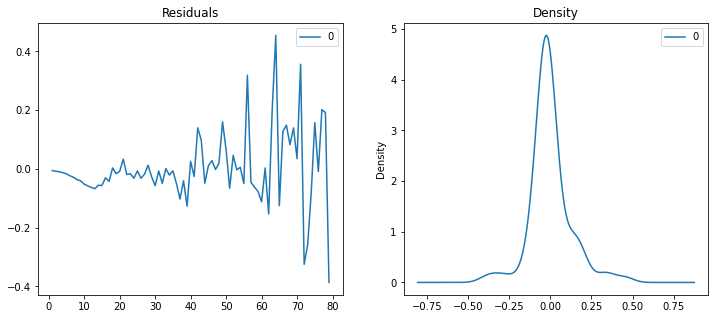

In [38]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize = (12,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

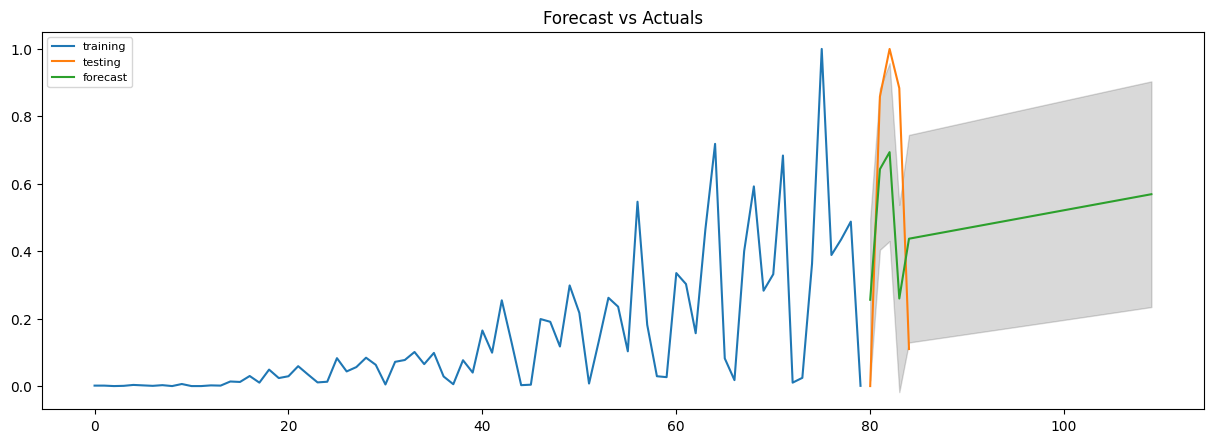

In [39]:
fc, se, conf = model_fit.forecast(30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series([i for i in fc])
fc_series.index+=train_data.shape[0]
lower_series = pd.Series([i for i in conf[:, 0]])
lower_series.index+=train_data.shape[0]
upper_series = pd.Series([i for i in conf[:, 1]])
upper_series.index+=train_data.shape[0]





# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data,label = 'testing')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [40]:
test_d = np.reshape(sc.inverse_transform(test_data.values.reshape(-1,1)),newshape=(1,-1))[0]
test_d = [int(i) for i in test_d]
forecast_d = np.reshape(sc.inverse_transform(fc_series.values.reshape(-1,1)),newshape=(1,-1))[0]
forecast_d = [int(i) for i in forecast_d]

In [41]:
data_output = pd.concat([pd.Series(test_d),pd.Series(forecast_d)],axis = 1)
data_output.columns = ['test_data','forecasted']
data_output.index+= train_data.shape[0]

In [42]:
data_output

,test_data,forecasted
80,34.0,388
81,1221.0,923
82,1417.0,993
83,1256.0,393
84,186.0,638
85,NaN,645
86,NaN,653
87,NaN,660
88,NaN,667
89,NaN,675


In [43]:
rmse = np.sqrt(mean_squared_error(data_output['test_data'].iloc[:test_data.shape[0]],data_output['forecasted'].iloc[:test_data.shape[0]]))
print(rmse)

518.2603592790018


**The low accuracy maybe related due to scaling of the data so using fbprophet in unscaled data**

## Using FbProphet fpr Prediction

https://facebook.github.io/prophet/docs/quick_start.html

https://facebook.github.io/prophet/docs/installation.html

In [44]:
from prophet import Prophet

In [45]:
train_size = int(0.95*daily_sum.shape[0])

In [46]:
daily_sum

,Value,Shift_1_diff
Date,,
2022-01-31,3,NaN
2022-02-17,3,0.0
2022-02-28,1,-2.0
2022-03-04,2,1.0
2022-03-31,6,4.0
2022-04-10,4,-2.0
2022-04-12,2,-2.0
2022-04-30,5,3.0
2022-05-06,1,-4.0


In [47]:
train = daily_sum.iloc[0:train_size,:]
test = daily_sum.iloc[train_size:,:]
train = train.reset_index()[['Date','Value']]
test = test.reset_index()[['Date','Value']]
train.columns = ['ds','y']
test.columns = ['ds','y']
print(train.tail())
print('\n',test.tail())


            ds     y
75  2022-07-19  1475
76  2022-07-20   574
77  2022-07-21   642
78  2022-07-22   720
79  2022-07-23     2

            ds     y
0  2022-07-24    34
1  2022-07-25  1221
2  2022-07-26  1417
3  2022-07-27  1256
4  2022-07-28   186


In [48]:
model_pr = Prophet()
model_pr.fit(train)

01:35:28 - cmdstanpy - INFO - Chain [1] start processing
01:35:28 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = model_pr.make_future_dataframe(periods=25)
future

,ds
0,2022-01-31
1,2022-02-17
2,2022-02-28
3,2022-03-04
4,2022-03-31
...,...
100,2022-08-13
101,2022-08-14
102,2022-08-15
103,2022-08-16


In [50]:
forecast = model_pr.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
100,2022-08-13,303.844968,31.978717,578.884457
101,2022-08-14,378.608439,130.624511,627.685826
102,2022-08-15,629.100911,364.072937,901.330911
103,2022-08-16,677.926579,425.679529,955.161089
104,2022-08-17,486.031547,226.918970,730.942975


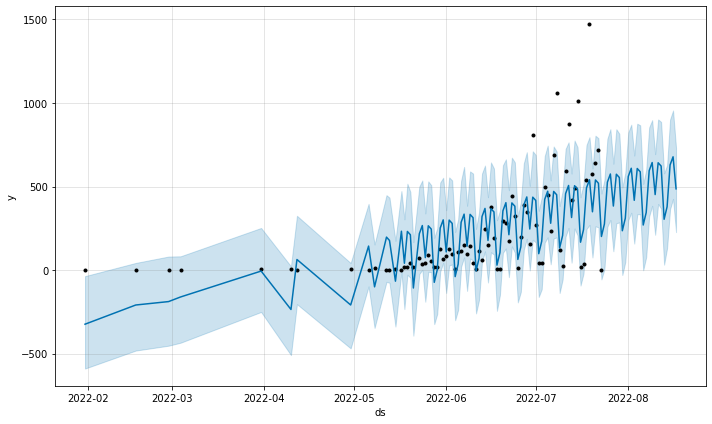

In [51]:
fig1 = model_pr.plot(forecast)

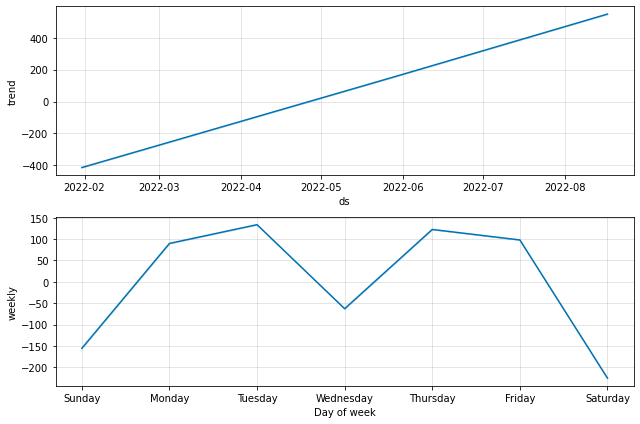

In [52]:
fig2 = model_pr.plot_components(forecast)


In [53]:
forecasts = forecast.iloc[test.index.start:,:][['ds','yhat','yhat_lower','yhat_upper']]
forecasts

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-31,-324.328952,-589.831494,-36.610375
1,2022-02-17,-209.380297,-482.153949,42.524925
2,2022-02-28,-188.875456,-453.060231,80.748253
3,2022-03-04,-161.395391,-435.288831,82.167758
4,2022-03-31,-6.200053,-251.068966,251.851504
...,...,...,...,...
100,2022-08-13,303.844968,31.978717,578.884457
101,2022-08-14,378.608439,130.624511,627.685826
102,2022-08-15,629.100911,364.072937,901.330911
103,2022-08-16,677.926579,425.679529,955.161089


In [54]:
test = test.reset_index(drop = True)
test

,ds,y
0,2022-07-24,34
1,2022-07-25,1221
2,2022-07-26,1417
3,2022-07-27,1256
4,2022-07-28,186


In [55]:
test.index+=train.shape[0]
test.head()

,ds,y
80,2022-07-24,34
81,2022-07-25,1221
82,2022-07-26,1417
83,2022-07-27,1256
84,2022-07-28,186


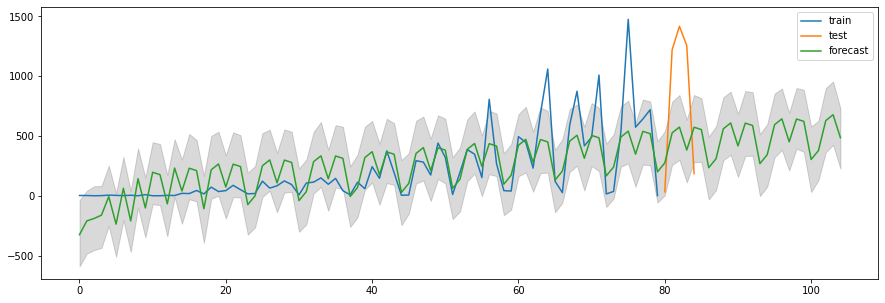

In [56]:
plt.figure(figsize = (15,5))
plt.plot(train['y'],label = 'train')
plt.plot(test['y'],label = 'test')
plt.plot(forecasts['yhat'],label = 'forecast')
plt.fill_between(forecasts.index,forecasts['yhat_lower'],forecasts['yhat_upper'],color = 'k',alpha = 0.15)
plt.legend(loc = 'best')
plt.show()

In [57]:
forecasts['yhat'].iloc[:test.shape[0]]

0   -324.328952
1   -209.380297
2   -188.875456
3   -161.395391
4     -6.200053
Name: yhat, dtype: float64

In [58]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['y'],forecasts['yhat'].iloc[:test.shape[0]]))
print(rmse)

1166.1195449112631


## Using RNNs

In [59]:
rnn_feed = daily_sum.drop(columns=['Shift_1_diff'],axis = 1).reset_index()
rnn_feed.head()

,Date,Value
0,2022-01-31,3
1,2022-02-17,3
2,2022-02-28,1
3,2022-03-04,2
4,2022-03-31,6


In [60]:
features = []
labels = []
train_length = 10
sequences = np.array(rnn_feed['Value'])

for i in range(train_length,len(sequences)):
    extract = sequences[i-train_length:i+1]
    feature = extract[:-1]
    label = extract[-1]
    features.append(np.array(feature))
    labels.append(np.array(label))
    
    
features = np.array(features)
labels = np.array(labels)
    
    

In [61]:
features.shape

(75, 10)

In [62]:
print("Past Data: ",features[20],"Prediction Based on Past: ",labels[20])

Past Data:  [ 44  88  52  17  20 123  65  84 125  94] Prediction Based on Past:  8


In [63]:
#Splitting into train and test
print(features[0], labels[0])
print(features[1],labels[1])

[ 3  3  1  2  6  4  2  5  1 10] 1
[ 3  1  2  6  4  2  5  1 10  1] 1


In [64]:
train_size = int(features.shape[0]*0.90)
X_train = features[0:train_size]
y_train = labels[0:train_size]
X_test = features[train_size:]
y_test = labels[train_size:]

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [66]:
X_train = np.reshape(a = X_train,newshape=(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(a = X_test,newshape=(X_test.shape[0], X_test.shape[1], 1))

In [67]:
print(X_train.shape)
print(X_test.shape)

(67, 10, 1)
(8, 10, 1)


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,Bidirectional, BatchNormalization, Input
from tensorflow.keras import callbacks

In [69]:
model = Sequential()

model.add(Bidirectional(LSTM(units = 30,return_sequences=True,return_state=False),input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = 30,return_sequences=True,recurrent_dropout=0.1,return_state=False))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))

model.add(LSTM(units=30,return_sequences=True,return_state=False))
model.add(LSTM(units = 30,return_sequences=True,recurrent_dropout=0.1,return_state=False))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))


model.add(LSTM(units = 30,recurrent_dropout=0.1))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))

model.add(Dense(1,activation = 'linear'))
model.compile(optimizer='adam',loss = 'mean_squared_error',metrics = ['mean_absolute_error'])
model.summary()

2022-08-01 01:35:43.689438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 01:35:43.694343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 01:35:43.695169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 01:35:43.696262: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 10, 60)            7680      
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 30)            10920     
_________________________________________________________________
dropout (Dropout)            (None, 10, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 30)                7

In [70]:
callbacks = [callbacks.ReduceLROnPlateau(verbose=1,factor=1e-04),callbacks.EarlyStopping(verbose=1,patience=15)]

In [71]:
history = model.fit(X_train,y_train,batch_size=8,epochs = 10000,validation_split=0.1,callbacks=callbacks)

2022-08-01 01:35:48.069875: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10000


2022-08-01 01:35:58.277348: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 [==============================] - 14s 333ms/step - loss: 89656.1172 - mean_absolute_error: 191.1766 - val_loss: 578699.4375 - val_mean_absolute_error: 590.8382
Epoch 2/10000
8/8 [==============================] - 1s 156ms/step - loss: 89582.6094 - mean_absolute_error: 191.0322 - val_loss: 578148.4375 - val_mean_absolute_error: 590.3575
Epoch 3/10000
8/8 [==============================] - 1s 119ms/step - loss: 89382.8750 - mean_absolute_error: 190.6386 - val_loss: 576382.6250 - val_mean_absolute_error: 588.8375
Epoch 4/10000
8/8 [==============================] - 1s 122ms/step - loss: 88768.2422 - mean_absolute_error: 189.4244 - val_loss: 574198.8125 - val_mean_absolute_error: 587.0096
Epoch 5/10000
8/8 [==============================] - 1s 125ms/step - loss: 88108.7734 - mean_absolute_error: 187.6320 - val_loss: 572886.7500 - val_mean_absolute_error: 585.9003
Epoch 6/10000
8/8 [==============================] - 1s 119ms/step - loss: 87662.9297 - mean_absolute_error: 186.4988 - val

In [72]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error', 'lr'])

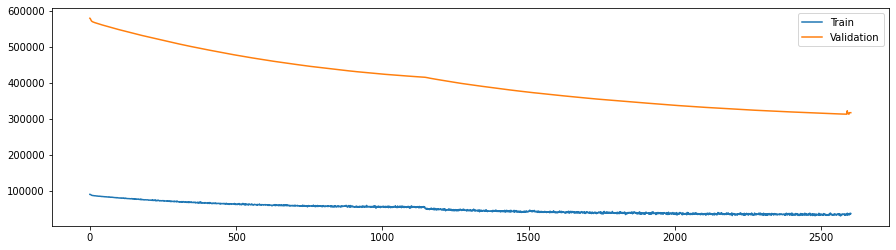

In [73]:
plt.figure(figsize=(15,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Validation'])

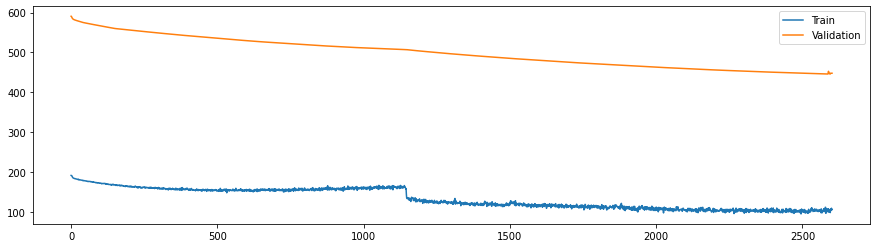

In [74]:
plt.figure(figsize=(15,4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['Train','Validation'])

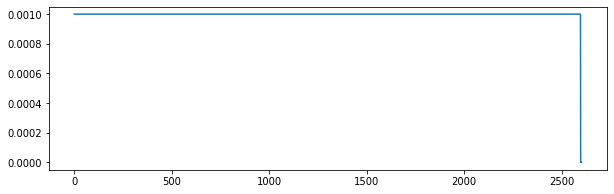

In [75]:
plt.figure(figsize = (10,3))
plt.plot(history.history['lr'])

In [76]:
pred = model.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

660.650614213143

In [78]:
pd_test = pd.Series(y_test)
pd_test.index+=y_train.shape[0]


In [79]:
pred.reshape(1,-1)

array([[303.67923, 303.682  , 303.6683 , 303.67548, 303.68243, 288.7279 ,
        301.09363, 303.67758]], dtype=float32)

In [80]:
pd_pred = pd.Series(pred.reshape(1,-1)[0])
pd_pred.index+=y_train.shape[0]

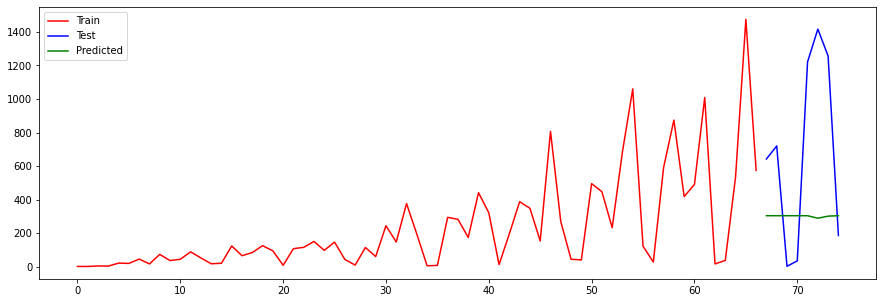

In [81]:
plt.figure(figsize = (15,5))
plt.plot(y_train,'-r',label = 'Train')
plt.plot(pd_test,'-b',label ='Test')
plt.plot(pd_pred,'-g',label = 'Predicted')
plt.legend()

## Other Analysis

In [82]:
data_to_pred = df_daily.sum().drop('Country')
data_to_pred = data_to_pred.to_frame()
data_to_pred.reset_index(inplace=True)
data_to_pred.columns = ['Date','Confirmed_Cases']


In [83]:
data_to_pred['Date'] = pd.to_datetime(data_to_pred['Date'])

In [84]:
data_to_pred_month = data_to_pred.copy(deep=True)
data_to_pred_month['Month'] = data_to_pred['Date'].dt.strftime("%b")
data_to_pred_month.head()

,Date,Confirmed_Cases,Month
0,2022-01-31,3,Jan
1,2022-02-17,3,Feb
2,2022-02-28,1,Feb
3,2022-03-04,2,Mar
4,2022-03-31,6,Mar


<AxesSubplot:xlabel='Month'>

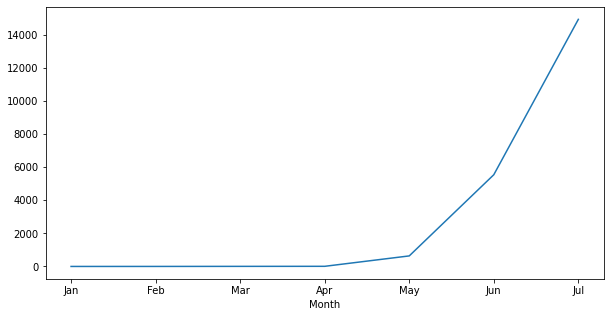

In [85]:
pred_month = data_to_pred_month.groupby('Month')['Confirmed_Cases'].sum()
pred_month.index = pd.CategoricalIndex(data = pred_month.index,categories=data_to_pred_month['Month'].unique(),
                                      ordered = True)
pred_month = pred_month.sort_index()
pred_month.plot(kind = 'line',figsize = (10,5))

**Almost Linear Growth After May**

In [86]:
df_daily_new = df_daily.transpose()
header = df_daily_new.iloc[0]
df_daily_new = df_daily_new[1:]
df_daily_new.columns = header
df_daily_new.head()

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,France,Italy,Sweden,Belgium,Canada,Germany,Australia,Netherlands,Israel,Switzerland,Scotland,Austria,Denmark,United Arab Emirates,Slovenia,Czech Republic,...,Peru,Estonia,Puerto Rico,Turkey,Panama,Jamaica,Ecuador,Dominican Republic,Slovakia,New Zealand,China,New Caledonia,Russia,Bosnia And Herzegovina,Saudi Arabia,India,Martinique,Barbados,Qatar,Costa Rica,Thailand,Bermuda,Andorra,Guadeloupe,Japan
2022-01-31,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
df_world.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2325.0,0.0,5.0,2.0,7.0
1,Portugal,633.0,0.0,0.0,0.0,34.0
2,Spain,3738.0,0.0,11.0,2.0,0.0
3,United States,4630.0,0.0,4.0,39.0,6.0
4,Canada,744.0,9.0,1.0,2.0,0.0


In [88]:
df_world.nlargest(n= 15,columns= 'Confirmed_Cases')

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
3,United States,4630.0,0.0,4.0,39.0,6.0
2,Spain,3738.0,0.0,11.0,2.0,0.0
10,Germany,2540.0,0.0,18.0,19.0,16.0
0,England,2325.0,0.0,5.0,2.0,7.0
7,France,1829.0,0.0,1.0,2.0,1.0
37,Brazil,978.0,7.0,2.0,20.0,4.0
11,Netherlands,878.0,0.0,0.0,1.0,0.0
4,Canada,744.0,9.0,1.0,2.0,0.0
1,Portugal,633.0,0.0,0.0,0.0,34.0
6,Italy,426.0,1.0,18.0,19.0,4.0


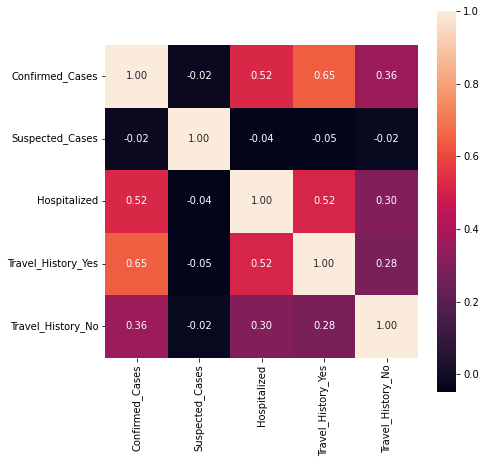

In [89]:
plt.figure(figsize = (7,7))
sns.heatmap(data = df_world.corr(),fmt = '.2f',linecolor='white',square=True,annot=True)
plt.show()

**Confirmed Cases increases with increase in travel history**

**More Confirmed Cases more hospitalization**

**People are getting affected even without travel history so the disease has entered the society as well**



Text(0.5, 1.0, 'Most Confirmed Cases')

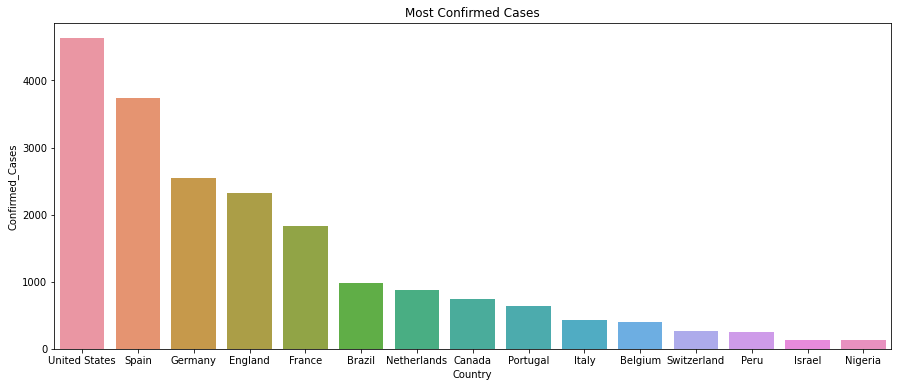

In [90]:
most_affected_15 = df_world.nlargest(n= 15,columns= 'Confirmed_Cases')[['Country','Confirmed_Cases']]
plt.figure(figsize = (15,6))
sns.barplot(x = 'Country',y = 'Confirmed_Cases',data = most_affected_15)
plt.title('Most Confirmed Cases')

Text(0.5, 1.0, 'Most Hospitalized Countries')

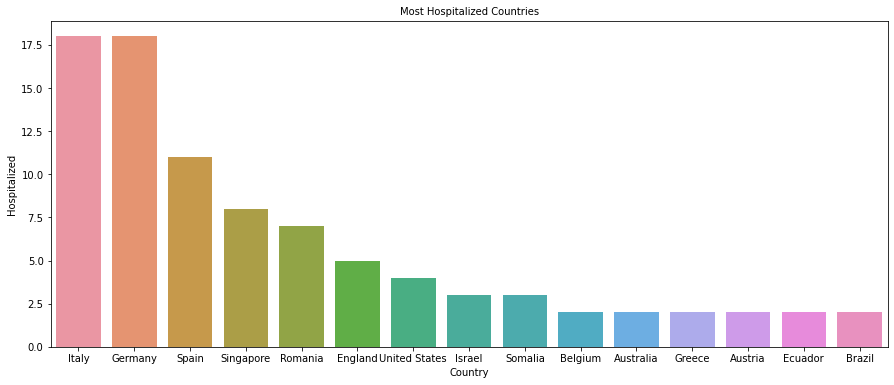

In [91]:
most_hospitalized= df_world.nlargest(n = 15,columns='Hospitalized')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Country',y = 'Hospitalized',data = most_hospitalized)
plt.title('Most Hospitalized Countries',fontsize = 10)

In [92]:
#Travel Based Analysis
travel = df_world.copy()
travel['frequency_of_travel'] = pd.cut(x = travel['Travel_History_Yes'],bins=[-1,0,5,12,18,25,100], 
                                       labels = ['zero','1-5','6-12','13-18','19-25','25+'])
travel.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,frequency_of_travel
0,England,2325.0,0.0,5.0,2.0,7.0,1-5
1,Portugal,633.0,0.0,0.0,0.0,34.0,zero
2,Spain,3738.0,0.0,11.0,2.0,0.0,1-5
3,United States,4630.0,0.0,4.0,39.0,6.0,25+
4,Canada,744.0,9.0,1.0,2.0,0.0,1-5


<AxesSubplot:xlabel='frequency_of_travel', ylabel='Confirmed_Cases'>

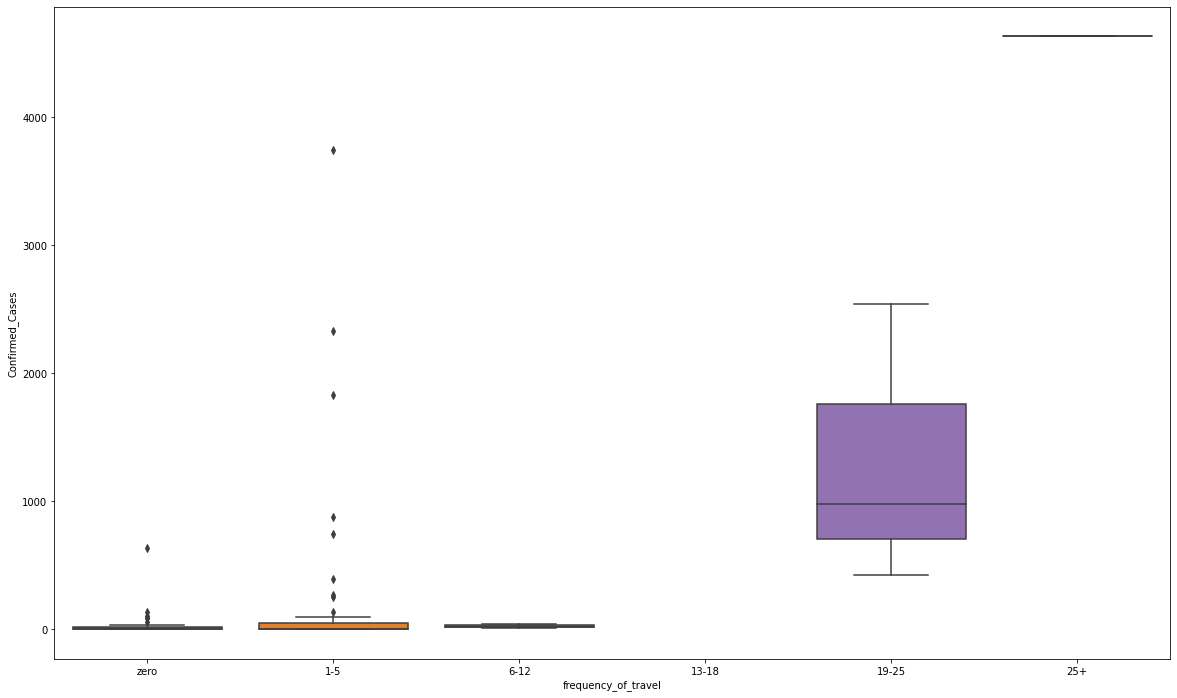

In [93]:
plt.figure(figsize= (20,12))
sns.boxplot(x = travel['frequency_of_travel'],y = travel['Confirmed_Cases'])

**Disease spread the most when people travel more**

In [94]:
#Travel Based Analysis
travel['frequency_of_no_travel'] = pd.cut(x = travel['Travel_History_No'],bins=[-1,0,5,12,18,25,100], 
                                       labels = ['zero','1-5','6-12','13-18','19-25','25+'])
travel.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,frequency_of_travel,frequency_of_no_travel
0,England,2325.0,0.0,5.0,2.0,7.0,1-5,6-12
1,Portugal,633.0,0.0,0.0,0.0,34.0,zero,25+
2,Spain,3738.0,0.0,11.0,2.0,0.0,1-5,zero
3,United States,4630.0,0.0,4.0,39.0,6.0,25+,6-12
4,Canada,744.0,9.0,1.0,2.0,0.0,1-5,zero


<AxesSubplot:xlabel='frequency_of_no_travel', ylabel='Confirmed_Cases'>

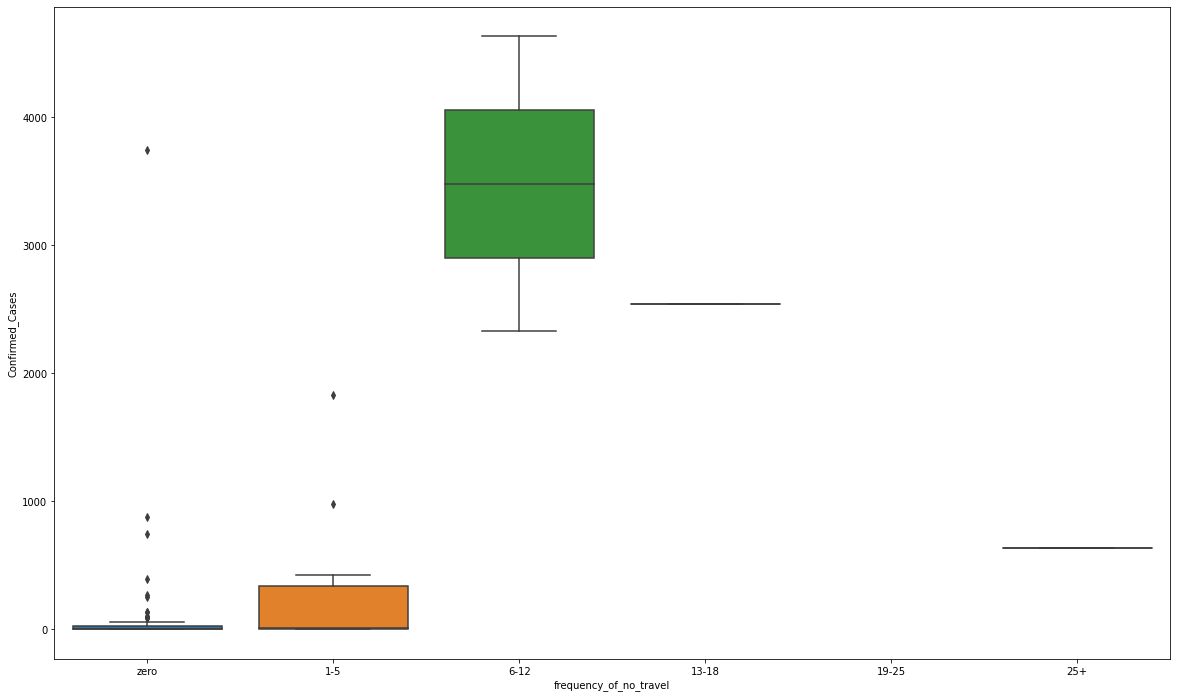

In [95]:
plt.figure(figsize= (20,12))
sns.boxplot(x = travel['frequency_of_no_travel'],y = travel['Confirmed_Cases'])

**The more the no travel, the less the number of confirmed cases, so the less the spread**

In [96]:
df_world_timeline.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [97]:
df_world_timeline['Month'] = pd.to_datetime(df_world_timeline['Date_confirmation']).dt.month_name()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

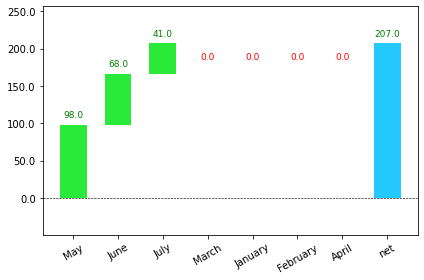

In [98]:
df_month_hosp = df_world_timeline.groupby(['Month'])['Hospitalised (Y/N/NA)'].count()
waterfall_chart.plot(data = df_month_hosp.values,index = df_month_hosp.index,sorted_value=True)

**Highest Growth was in May Till Now**